In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
%matplotlib inline

In [3]:
# Carga de datos de archivos .csv
# https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Toxicity.zip
df = pd.read_csv('train.csv')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


<Axes: >

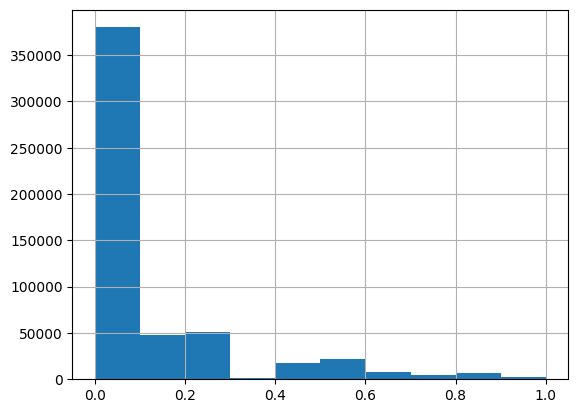

In [4]:
df.target.hist()

In [5]:
# Separación de variable de interés (y)
y = df.target
y.describe()

count    541462.000000
mean          0.102991
std           0.196979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.166667
max           1.000000
Name: target, dtype: float64

In [6]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text
X

0         What are you talking about? What group do Pete...
1          NO!, Let him, we need a Conservative government.
2         Perhaps he took the "power out of the Cardinal...
3         As always, yours is dripping with sarcasm, whi...
4         The dirty little secret is that the price rang...
                                ...                        
541457    You wrote: "Both parties campaigned explicitly...
541458    Nowadays. there sure seem to be a lot of credi...
541459    We are lucky wealth filters down to the poor i...
541460    You are half right. Both nature and humans can...
541461    I don't know how you went from yelling at a fo...
Name: comment_text, Length: 541462, dtype: object

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

# Vectorizamos los comentarios
vectorizer = TfidfVectorizer(max_features=10000)
X_train_cv = vectorizer.fit_transform(X_train)
X_test_cv = vectorizer.transform(X_test)

In [9]:
# Creamos y entrenamos el modelo de XGB
xgb = XGBRegressor()
xgb.fit(X_train_cv, y_train)
y_pred = xgb.predict(X_test_cv)

In [10]:
# Para ver el vocabulary del CV
print(vectorizer.vocabulary_)

{'oral': 6290, 'history': 4305, 'is': 4868, 'what': 9768, 'ever': 3271, 'they': 9029, 'say': 7898, 'it': 4888, 'nazis': 5976, 'in': 4577, 'the': 9003, '1930': 38, 'did': 2621, 'on': 6235, 'native': 5966, 'children': 1610, 'at': 775, 'with': 9864, 'full': 3819, 'knowledge': 5080, 'of': 6189, 'government': 3995, 'yup': 9989, 'if': 4490, 'happened': 4150, 'who': 9797, 'are': 677, 'we': 9720, 'to': 9122, 'didn': 2622, 'marijuana': 5534, 'less': 5243, 'harmful': 4169, 'human': 4422, 'health': 4215, 'than': 8995, 'cigarettes': 1646, 'which': 9783, 'widely': 9808, 'used': 9495, 'and': 556, 'there': 9022, 'no': 6057, 'ban': 896, 'reduces': 7380, 'stress': 8632, 'aggression': 416, 'level': 5254, 'leading': 5183, 'crime': 2227, 'its': 4893, 'medical': 5620, 'value': 9526, 'favorable': 3501, 'effects': 3019, 'proven': 7096, 'author': 826, 'also': 505, 'should': 8181, 'have': 4195, 'consideration': 1992, 'that': 9000, 'use': 9494, 'legalized': 5221, 'market': 5539, 'will': 9820, 'be': 955, 'transp

In [11]:
vocabulary = {'oral': 6290, 'history': 4305, 'is': 4868, 'what': 9768, 'ever': 3271, 'they': 9029, 'say': 7898, 'it': 4888, 'nazis': 5976, 'in': 4577, 'the': 9003, '1930': 38, 'did': 2621, 'on': 6235, 'native': 5966, 'children': 1610, 'at': 775, 'with': 9864, 'full': 3819, 'knowledge': 5080, 'of': 6189, 'government': 3995, 'yup': 9989, 'if': 4490, 'happened': 4150, 'who': 9797, 'are': 677, 'we': 9720, 'to': 9122, 'didn': 2622, 'marijuana': 5534, 'less': 5243, 'harmful': 4169, 'human': 4422, 'health': 4215, 'than': 8995, 'cigarettes': 1646, 'which': 9783, 'widely': 9808, 'used': 9495, 'and': 556, 'there': 9022, 'no': 6057, 'ban': 896, 'reduces': 7380, 'stress': 8632, 'aggression': 416, 'level': 5254, 'leading': 5183, 'crime': 2227, 'its': 4893, 'medical': 5620, 'value': 9526, 'favorable': 3501, 'effects': 3019, 'proven': 7096, 'author': 826, 'also': 505, 'should': 8181, 'have': 4195, 'consideration': 1992, 'that': 9000, 'use': 9494, 'legalized': 5221, 'market': 5539, 'will': 9820, 'be': 955, 'transparent': 9233, 'surely': 8782, 'better': 1044, 'illegal': 4503, 'sales': 7852, 'this': 9044, 'drug': 2916, 'these': 9027, 'cases': 1457, 'young': 9978, 'adult': 358, 'interest': 4781, 'more': 5842, 'drugs': 2917, 'hence': 4253, 'need': 5992, 'as': 717, 'cannot': 1402, 'cause': 1481, 'problems': 6981, 'bigger': 1062, 'widespread': 9810, 'do': 2792, 'look': 5377, 'see': 7999, 'how': 4402, 'many': 5518, 'women': 9881, 'photos': 6643, 'white': 9794, 'were': 9759, 'all': 480, 'other': 6323, 'side': 8205, 'like': 5297, 'others': 6324, 'stood': 8605, 'up': 9471, 'south': 8406, 'africa': 397, 'years': 9963, 'ago': 420, 'you': 9977, 'not': 6087, 'agree': 421, 'shame': 8115, 'next': 6043, 'll': 5344, 'coming': 1807, 'for': 3704, 'isis': 4870, 'could': 2141, 'left': 5210, 'was': 9694, 'great': 4040, 'act': 291, 'get': 3922, 'charles': 1569, 'old': 6224, 'time': 9102, 'alaskans': 462, 'from': 3803, 'good': 3973, 'families': 3461, 'ones': 6238, 'blew': 1117, 'through': 9075, 'vast': 9535, 'amounts': 540, 'oil': 6219, 'wealth': 9724, 'instead': 4738, 'creating': 2206, 'sovereign': 8410, 'fund': 3826, 'now': 6107, 'steal': 8568, 'pfd': 6628, 'poor': 6781, 'so': 8337, 'don': 2828, 'pay': 6518, 'taxes': 8909, 'your': 9980, 'fluff': 3669, 'piece': 6661, 'doesn': 2810, 'any': 591, 'just': 4986, 'gonna': 3972, 'my': 5927, 'logic': 5368, 'teacher': 8919, 'would': 9919, 'give': 3938, 'zero': 9992, 'obvious': 6167, 'generally': 3895, 'speaking': 8424, 'competent': 1871, 'shooter': 8164, 'gun': 4098, 'has': 4182, 'ability': 205, 'rapidly': 7264, 'shoot': 8163, 'multiple': 5902, 'rounds': 7786, 'gives': 3940, 'advantage': 365, 'over': 6355, 'anyone': 595, 'similar': 8230, 'skill': 8270, 'similarly': 8231, 'armed': 691, 'gop': 3979, 'had': 4117, 'opportunity': 6271, 'nominate': 6065, 'gov': 3990, 'kasich': 5002, 'presidential': 6914, 'candidate': 1397, 'he': 4205, 'been': 979, 'nominated': 6066, 'likely': 5300, 'our': 6329, 'president': 6913, 'republican': 7554, 'party': 6479, 'dominated': 2827, 'by': 1352, 'far': 3471, 'right': 7705, 'zealots': 9991, 'chose': 1625, 'donald': 2829, 'trump': 9305, 'sort': 8392, 'thing': 9035, 'happens': 4152, 'when': 9775, 're': 7289, 'willing': 9826, 'sell': 8028, 'out': 6332, 'political': 6761, 'principles': 6956, 'gain': 3850, 'power': 6840, '2010': 79, 'controlled': 2074, 'those': 9050, 'represented': 7548, 'sensible': 8050, 'rational': 7278, 'center': 1514, 'moderate': 5798, 'republicans': 7555, 'gone': 3970, 'defeated': 2432, 'primaries': 6947, 'or': 6289, 'retired': 7641, 'simply': 8235, 'ask': 727, 'tens': 8961, 'millions': 5717, 'mainstream': 5465, 'lost': 5397, 'their': 9010, 'worth': 9915, 'around': 695, 'today': 9125, 'divided': 2778, 'shell': 8137, 'yourselves': 9983, 'then': 9015, 'earth': 2973, 'going': 3965, 'after': 400, 'defeat': 2431, 'join': 4941, 'him': 4291, 'his': 4299, 'accusations': 271, 'election': 3044, 'rigged': 7704, 'help': 4247, 'undermine': 9394, 'faith': 3446, 'democracy': 2487, 'hope': 4368, 'chief': 1605, 'guessing': 4085, 'aware': 852, 'task': 8900, 'failed': 3436, 'apologist': 608, 'reason': 7324, 'thought': 9053, 'order': 6295, 'attempt': 792, 'stake': 8518, 'position': 6810, 'support': 8763, 'know': 5077, 'tests': 8987, 'daily': 2320, 'very': 9558, 'bounds': 1203, 'itself': 4894, 'way': 9717, 'into': 4808, 'attempting': 794, 'defend': 2434, 'indefensible': 4625, 'guess': 4084, 'justin': 4994, 'wanted': 9673, 'whip': 9792, 'clown': 1733, 'show': 8189, 'yep': 9968, 'emotion': 3088, 'lies': 5285, 'leave': 5204, 'democrat': 2488, 'socialist': 8343, 'judges': 4969, 'since': 8238, 'best': 1039, 'dog': 2812, 'before': 981, 'growth': 4073, 'plates': 6709, 'close': 1720, 'contribute': 2065, 'joint': 4944, 'bone': 1162, 'issues': 4886, 'why': 9806, 'take': 8867, 'away': 854, 'develop': 2595, 'healthy': 4218, 'bodies': 1149, 'really': 7319, 'care': 1428, 'about': 212, 'them': 9012, 'monopoly': 5822, 'capital': 1413, 'established': 3233, 'big': 1061, 'business': 1336, 'entire': 3174, 'argument': 686, 'myth': 5931, 'cynical': 2315, 'unless': 9445, 'both': 1192, 'distorted': 2757, 'accurate': 268, 'much': 5895, 'emotional': 3089, 'term': 8964, 'credit': 2216, 'but': 1342, 'only': 6242, 'addition': 319, 'single': 8245, 'even': 3265, 'biggest': 1063, 'against': 406, 'equally': 3202, 'global': 3948, 'competitors': 1875, 'public': 7124, 'listed': 5324, 'companies': 1853, 'shares': 8126, 'sale': 7850, 'buyers': 1349, 'races': 7214, 'destructive': 2578, 'serving': 8078, 'proxy': 7113, 'calculated': 1364, 'insult': 4748, 'abuse': 224, 'people': 6562, 'especially': 3226, 'wealthy': 9726, 'stole': 8599, 'land': 5119, 'police': 6755, 'seek': 8003, 'phone': 6639, 'records': 7364, 'claimed': 1674, 'without': 9869, 'evidence': 3278, 'being': 1000, 'example': 3298, 'witness': 9870, 'claim': 1673, 'newspaper': 6040, 'wing': 9838, 'clinton': 1717, 'sexual': 8101, 'trumps': 9310, 'nope': 6075, 'acts': 305, 'themselves': 9014, 'treated': 9253, 'dnc': 2790, 'press': 6916, 'largely': 5134, 'proved': 7095, 'two': 9350, 'major': 5470, 'differences': 2633, 'excuse': 3319, 'yes': 9969, 'leftist': 5212, 'ignored': 4495, 'hillary': 4289, 'threatened': 9062, 'keep': 5009, 'silent': 8227, 'impeached': 4539, 'lying': 5438, 'deeds': 2422, 'every': 3272, 'victim': 9574, 'come': 1799, 'forward': 3745, 'last': 5140, 'months': 5829, 'convenient': 2080, 'dropped': 2911, 'case': 1456, 'via': 9569, 'own': 6380, 'lawyers': 5172, 'suppose': 8770, 'believe': 1005, 'traitor': 9214, 'snowden': 8334, 'exist': 3332, 'though': 9052, 'hiding': 4272, 'russia': 7822, 'heh': 4237, 'watch': 9706, 'here': 4257, 'trolls': 9290, 'buffalo': 1296, 'statue': 8557, 'one': 6237, 'profile': 7010, 'nearly': 5986, 'made': 5448, 'extinct': 3396, 'exactly': 3292, 'thoughts': 9055, 'ridiculous': 7698, 'media': 5617, 'content': 2038, 'bash': 936, 'sa': 7827, 'ap': 601, 'alike': 478, 'singing': 8244, 'ok': 6220, 'relevance': 7468, 'topic': 9154, 'another': 579, 'cover': 2172, 'justify': 4992, 'comments': 1819, 'under': 9391, 'surveillance': 8797, 'saw': 7897, 'conference': 1941, 'certainly': 1528, 'pass': 6480, 'smell': 8315, 'test': 8980, 'words': 9894, 'appeared': 627, 'got': 3987, 'caught': 1480, 'pants': 6425, 'down': 2859, 'administration': 337, 'destroying': 2575, 'makes': 5476, 'mind': 5721, 'drift': 2894, 'back': 862, 'west': 9761, 'road': 7734, 'north': 6081, '30': 106, 'lived': 5341, 'almost': 497, 'dreams': 2889, 'took': 9149, 'place': 6688, 'house': 4396, 'egg': 3025, 'farm': 3475, 'toward': 9179, 'town': 9183, 'kid': 5036, 'always': 515, 'mail': 5460, 'boxes': 1208, 'home': 4335, 'till': 9098, 'dad': 2318, 'filled': 3578, 'drill': 2895, 'pipe': 6674, 'tank': 8883, 'mile': 5704, 'behind': 997, 'where': 9777, 'sneak': 8330, 'bank': 902, 'ducks': 2930, 'shot': 8178, '20': 66, 've': 9538, 'driven': 2903, 'never': 6033, 'stopped': 8607, 'gravel': 4036, 'paved': 6516, 'box': 1207, 'street': 8628, 'number': 6117, 'route': 7787, 'houses': 4399, 'wonder': 9883, 'still': 8592, 'well': 9755, 'cuz': 2308, 'remember': 7491, 'pig': 6664, 'across': 290, 'country': 2156, 'can': 1389, 'go': 3958, 'bit': 1092, 'da': 2316, 'real': 7308, 'part': 6460, 'getting': 3924, 'mean': 5602, 'off': 6190, 'too': 9148, 'days': 2360, 'heard': 4221, 'minorities': 5742, 'introducing': 4813, 'islamic': 4872, 'prayers': 6858, 'ontario': 6244, 'schools': 7933, 'mr': 5888, 'lesson': 5245, 'canada': 1390, 'again': 405, 'henry': 4254, 'price': 6938, 'playing': 6720, 'somewhere': 8379, 'else': 3068, 'year': 9961, 'staying': 8564, 'team': 8924, 'perhaps': 6579, 'couple': 2160, 'players': 6718, 'short': 8173, 'winning': 9845, 'admitted': 349, 'phony': 6641, 'according': 256, 'us': 9490, 'news': 6039, 'reports': 7542, 'stick': 8587, 'opening': 6250, 'letter': 5251, 'neither': 6019, 'scenarios': 7918, 'engagement': 3142, 'sure': 8781, 'might': 5696, 'put': 7170, 'questions': 7195, 'wouldn': 9920, 'imagine': 4518, 'either': 3035, 'allie': 489, 'same': 7859, 'question': 7191, 'doing': 2816, 'nothing': 6093, 'hasn': 4183, 'produced': 6993, 'anything': 596, 'ignore': 4494, 'attack': 788, 'kathleen': 5004, 'intentions': 4776, 'yet': 9971, 'her': 4255, 'knew': 5069, 'she': 8130, 'energy': 3135, 'green': 4048, 'thanks': 8999, 'must': 5922, 'kill': 5039, 'conservatism': 1986, 'national': 5958, 'scale': 7906, 'merely': 5659, 'said': 7843, 'responsible': 7614, 'impossible': 4563, 'assad': 736, 'done': 2835, 'reported': 7537, '2013': 82, 'syria': 8850, 'large': 5133, 'amount': 539, 'form': 3727, 'agent': 413, 'mixed': 5783, 'shelf': 8136, 'life': 5286, 'because': 970, 'main': 5462, 'stability': 8509, 'prior': 6960, 'bombing': 1158, 'explosion': 3375, 'destroyed': 2574, 'alcohol': 467, 'cloud': 1731, 'fire': 3604, 'furthermore': 3842, 'blowing': 1134, 'together': 9127, 'does': 2809, 'result': 7628, 'nerve': 6022, 'rebels': 7332, 'acquire': 286, 'afford': 392, 'technology': 8935, 'expertise': 3360, 'produce': 6992, 'saying': 7900, 'chemical': 1594, 'weapons': 9728, 'somehow': 8373, 'seem': 8007, 'forces': 3710, 'nobody': 6061, 'went': 9757, 'broke': 1269, 'taste': 8902, 'american': 530, 'worrying': 9911, 'name': 5943, 'try': 9319, 'producing': 6997, 'decent': 2395, 'beer': 980, 'america': 529, 'small': 8309, 'drink': 2897, 'locals': 5358, 'drinking': 2898, 'want': 9672, 'otherwise': 6325, 'repeal': 7521, 'obamacare': 6135, 'outright': 6348, 'replace': 7528, 'free': 3781, 'lot': 5398, 'legislation': 5225, 'undermines': 9395, 'remove': 7503, 'tax': 8905, 'provided': 7100, 'incentives': 4590, 'employer': 3101, 'insurance': 4752, 'comprehensive': 1897, 'reform': 7401, 'fewer': 3556, 'deductions': 2420, 'lower': 5414, 'rates': 7273, 'allows': 495, 'congress': 1966, 'birds': 1087, 'stone': 8602, 'peter': 6620, '2017': 86, '06': 7, '23': 96, 'word': 9891, 'citizen': 1660, 'united': 9434, 'states': 8547, 'muslim': 5919, 'an': 544, 'previous': 6934, 'article': 709, '18': 35, 'somalia': 8369, 'permanent': 6585, 'status': 8559, 'recent': 7341, 'meeting': 5631, 'democratic': 2489, 'socialists': 8344, 'taking': 8872, 'bill': 1072, 'palestine': 6412, 'river': 7731, 'sea': 7966, 'pushing': 7169, 'israeli': 4882, 'goal': 3959, 'think': 9037, 'named': 5944, 'person': 6603, 'perfect': 6573, 'above': 213, 'some': 8370, 'bad': 875, 'someone': 8374, 'offense': 6197, 'point': 6743, 'himself': 4292, 'enough': 3161, 'earned': 2967, 'respect': 7598, 'community': 1848, 'once': 6236, 'fallen': 3451, 'grace': 4005, 'minds': 5724, 'change': 1549, 'sins': 8250, 'criteria': 2235, 'safe': 7839, 'therefore': 9024, 'idea': 4470, 'corrupt': 2129, 'sick': 8203, 'vote': 9637, 'hill': 4288, 'confused': 1959, 'soul': 8396, 'tell': 8945, 'honest': 4353, 'fake': 3448, 'flake': 3635, 'anymore': 594, 'indeed': 4624, 'sad': 7836, 'beaten': 964, 'seems': 8010, 'lowest': 5417, 'common': 1837, 'liberal': 5268, 'progressives': 7022, 'wanting': 9674, 'reality': 7313, 'liar': 5264, 'dems': 2501, 'facts': 3430, 'prove': 7094, 'herself': 4265, 'able': 206, 'convince': 2093, 'emotionally': 3090, 'laughs': 5156, 'evil': 3282, 'laugh': 5152, 'wiki': 9813, 'reliable': 7470, 'source': 8404, 'general': 3894, 'information': 4681, 'citation': 1653, 'collection': 1770, 'useful': 9496, 'reference': 7387, 'material': 5571, 'quoted': 7207, 'directly': 2664, 'such': 8706, 'isn': 4877, 'wrong': 9938, 'student': 8659, 'cited': 1656, 'articles': 710, 'cites': 1657, 'immigrant': 4525, 'committed': 1832, 'violent': 9601, 'absolutely': 219, 'criminal': 2230, 'needs': 5996, 'face': 3414, 'consequences': 1984, 'larger': 5135, 'problem': 6979, 'vision': 9614, 'immigration': 4527, 'fear': 3510, 'nice': 6046, 'lady': 5113, 'whom': 9803, 'lucky': 5425, 'teach': 8918, 'card': 1424, 'holder': 4320, 'fearful': 3512, 'future': 3845, 'breaking': 1235, 'law': 5163, 'miserably': 5755, 'fault': 3496, 'hers': 4264, 'powerful': 6842, 'friend': 3796, 'works': 9903, 'me': 5599, 'step': 8577, 'ah': 430, 'protected': 7077, 'canadians': 1392, 'prefer': 6879, 'door': 2844, 'visit': 9615, 'snow': 8333, 'flies': 3649, 'products': 7002, 'services': 8077, 'find': 3592, 'customer': 2301, 'military': 5707, 'keeps': 5011, 'hot': 4391, 'yourself': 9982, 'company': 1854, 'prediction': 6876, 'forced': 3709, 'diversity': 2775, 'initiatives': 4694, 'turn': 9333, 'forcing': 3711, 'students': 8660, 'school': 7931, 'educate': 3008, 'intention': 4773, 'intent': 4772, 'social': 8341, 'justice': 4987, 'making': 5478, 'everyone': 3275, 'illiterate': 4508, 'shown': 8193, 'connection': 1972, 'between': 1046, '47': 128, 'murders': 5913, 'suspicious': 8814, 'suicides': 8733, 'proof': 7045, 'hahaha': 4120, 'let': 5248, 'putin': 7171, 'commit': 1828, 'doubt': 2854, 'killings': 5044, 'probable': 6975, 'speech': 8439, 'sacred': 7832, 'trust': 9312, 'include': 4597, 'knowingly': 5079, 'lie': 5283, 'utter': 9510, 'falsehoods': 3457, 'slander': 8279, 'libel': 5267, 'somebody': 8371, 'assumes': 767, 'speaker': 8422, 'idiot': 4485, 'factually': 3432, 'several': 8091, 'instances': 4735, 'hard': 4162, 'line': 5311, 'mandate': 5493, 'managers': 5490, 'restore': 7619, 'eliminate': 3059, 'introduced': 4812, 'species': 8429, 'invasive': 4821, '1999': 63, 'executive': 3324, 'issued': 4885, 'pres': 6898, 'clearly': 1700, 'defined': 2448, 'harm': 4167, 'environment': 3186, 'economy': 2997, 'fails': 3438, 'mention': 5652, 'serious': 8067, 'threat': 9060, 'food': 3692, 'security': 7998, 'majority': 5471, 'funds': 3835, 'spent': 8451, 'fighting': 3567, 'state': 8542, 'federal': 3521, 'agencies': 409, 'private': 6967, 'agricultural': 427, 'aren': 680, 'encourage': 3117, 'farmer': 3476, 'may': 5586, 'disagree': 2673, 'label': 5100, 'suffer': 8718, 'due': 2932, 'presence': 6902, 'including': 4600, 'endangered': 3122, 'note': 6090, 'https': 4414, 'com': 1794, 'vatican': 9537, '03': 4, '07': 8, 'department': 2517, 'culture': 2287, 'commentary': 1812, 'working': 9901, 'bag': 877, 'jealous': 4913, 'career': 1430, 'anywhere': 600, 'least': 5203, 'goes': 3964, 'affordable': 394, 'nation': 5957, 'healthcare': 4216, 'system': 8853, 'completely': 1883, 'unable': 9374, 'reasoned': 7327, 'coherent': 1756, 'response': 7610, 'begin': 986, 'high': 4274, 'post': 6820, 'downhill': 2860, 'called': 1372, 'jobs': 4936, 'industry': 4655, 'came': 1376, 'china': 1613, 'compromised': 1899, 'western': 9762, 'corporation': 2117, 'most': 5857, 'sponsored': 8478, 'hacking': 4115, 'targeted': 8895, 'work': 9896, 'field': 3560, 'controversial': 2077, 'statements': 8546, 'fact': 3422, 'drop': 2910, 'activity': 302, 'obama': 6134, 'worked': 9897, 'chinese': 1614, 'although': 513, 'whose': 9805, 'job': 4935, 'monitoring': 5820, 'trends': 9265, 'half': 4124, 'secrets': 7990, 'throw': 9077, 'key': 5025, 'reach': 7290, 'christian': 1630, 'carter': 1454, 'whilst': 9787, 'locked': 5363, 'cell': 1506, 'therapy': 9021, 'each': 2960, 'film': 3580, 'sessions': 8080, 'college': 1773, 'concept': 1910, 'forget': 3721, 'comment': 1811, 'views': 9590, 'tendency': 8959, 'towards': 9180, 'violence': 9600, 'communities': 1847, 'trailer': 9208, 'court': 2167, 'management': 5488, 'group': 4066, 'tries': 9277, 'hardest': 4164, 'screen': 7955, 'games': 3859, 'happen': 4149, 'courts': 2169, 'equal': 3199, 'chance': 1547, 'character': 1559, 'hopefully': 4371, 'learn': 5196, 'won': 9882, 'conflict': 1952, 'rather': 7274, 'miss': 5765, 'genuinely': 3912, 'particular': 6468, 'based': 932, 'irrelevant': 4864, 'metric': 5680, 'agreed': 422, 'james': 4903, 'celebrate': 1498, 'aside': 725, 'ongoing': 6240, 'anchorage': 554, 'rest': 7616, '48': 129, 'corporate': 2116, 'nationwide': 5965, 'chains': 1535, 'eager': 2961, 'mass': 5557, 'low': 5413, 'quality': 7182, 'chain': 1534, 'stores': 8612, 'vs': 9646, 'unique': 9431, 'locally': 5357, 'owned': 6381, 'businesses': 1337, 'becoming': 973, 'mindless': 5723, 'fat': 3490, 'sheep': 8132, 'product': 6998, 'pure': 7156, 'crap': 2193, 'true': 9303, 'sense': 8047, 'candy': 1399, 'eat': 2983, 'disgusting': 2719, 'foods': 3693, 'become': 971, 'usa': 9491, 'past': 6491, 'few': 3555, 'decades': 2390, 'foreign': 3714, 'visitors': 9619, 'notice': 6094, 'regularly': 7433, 'bet': 1040, 'tea': 8917, 'pals': 6417, 'cared': 1429, 'nfl': 6044, 'dear': 2377, 'leader': 5180, 'told': 9132, 'boycott': 1210, 'ha': 4107, 'poison': 6748, 'discuss': 2706, 'football': 3701, 'rivers': 7732, 'trash': 9239, 'talk': 8878, 'running': 7817, 'game': 3858, 'etc': 3242, 'foul': 3749, 'politics': 6765, 'section': 7991, 'welcome': 9751, 'nor': 6076, 'appropriate': 656, 'easily': 2978, 'rents': 7517, 'decade': 2389, 'takes': 8871, 'recession': 7344, 'make': 5473, 'income': 4604, 'rent': 7511, 'live': 5340, 'married': 5546, 'church': 1641, 'allegiance': 486, 'holy': 4334, 'roman': 7762, 'society': 8349, 'citizens': 1662, 'former': 3732, 'imperial': 4542, 'throne': 9074, 'jesus': 4925, 'message': 5665, 'spite': 8469, 'influence': 4674, 'known': 5082, 'rome': 7764, 'please': 6727, 'brush': 1280, 'forum': 3743, 'spout': 8489, 'truths': 9318, 'revisionist': 7667, 'permit': 6588, 'potentially': 6832, 'different': 2634, 'outcomes': 6334, 'paris': 6447, 'london': 5372, 'world': 9904, 'class': 1683, 'wasn': 9701, 'talking': 8880, 'shopping': 8170, 'cities': 1658, 'knowing': 5078, 'suspect': 8807, 'walk': 9660, 'civil': 1667, 'rights': 7710, '1964': 44, 'discriminate': 2702, 'places': 6690, 'serve': 8071, 'restaurant': 7617, 'owner': 6382, 'correct': 2120, 'motorists': 5870, 'behave': 992, 'differently': 2635, 'cops': 2109, 'absence': 216, 'involved': 4846, 'crash': 2195, 'brought': 1277, 'along': 500, 'behavior': 994, 'florida': 3662, 'entirely': 3175, 'swamp': 8821, 'needing': 5994, 'stretch': 8633, 'accommodate': 249, 'foolish': 3696, 'action': 294, 'lee': 5209, 'excellent': 3302, 'member': 5640, 'committee': 1833, 'select': 8019, 'knows': 5083, 'qualities': 7181, 'michael': 5687, 'appear': 624, 'picks': 6656, 'experience': 3354, 'family': 3462, 'legal': 5217, 'beneficial': 1023, 'pole': 6753, 'air': 441, 'water': 9709, 'overwhelmingly': 6376, 'day': 2357, 'supposed': 8771, 'hell': 4243, 'permission': 6587, 'slip': 8298, 'adultery': 359, 'joseph': 4952, 'collecting': 1769, 'paycheck': 6520, 'tomorrow': 9141, 'woods': 9890, 'fired': 3607, 'terrible': 8968, 'poorly': 6784, 'penalties': 6552, 'drops': 2913, 'missed': 5766, 'coaching': 1744, 'elway': 3070, 'given': 3939, 'review': 7662, 'osweiler': 6321, 'new': 6035, 'expect': 3344, 'passes': 6485, 'tough': 9171, 'catch': 1468, 'defenders': 2438, 'roster': 7780, 'rebuild': 7333, 'mode': 5795, 'oppose': 6272, 'mother': 5859, 'pension': 6559, '160': 33, '000': 1, 'watching': 9708, 'kids': 5038, 'bs': 1283, 'depends': 2524, 'define': 2447, 'perspective': 6611, 'someday': 8372, 'debt': 2385, '10': 11, 'total': 9165, 'org': 6303, 'http': 4413, 'www': 9947, '11': 18, 'holds': 4324, 'complaining': 1878, 'whole': 9800, 'statement': 8545, 'offer': 6200, 'opinion': 6264, 'reject': 7446, 'teaching': 8922, 'wisdom': 9854, 'scholars': 7928, 'centuries': 1522, 'basis': 941, 'maybe': 5587, 'huge': 4418, 'already': 503, 'difference': 2632, 'basically': 939, 'screwed': 7958, 'appointed': 643, 'cabinet': 1358, 'brother': 1275, 'charlie': 1570, 'dui': 2936, 'am': 516, 'pretty': 6926, 'dick': 2614, 'active': 296, 'ceo': 1524, 'lines': 5313, 'disappointment': 2682, 'head': 4206, 'signing': 8224, 'season': 7975, 'moves': 5881, 'injuries': 4697, 'played': 6716, 'having': 4197, 'disappointing': 2681, 'aggressive': 417, 'trying': 9320, 'rockies': 7748, 'strong': 8646, 'core': 2111, 'moving': 5884, 'direction': 2662, 'looks': 5380, 'sour': 8403, 'grapes': 4029, 'woman': 9879, 'elected': 3042, 'self': 8024, 'entitlement': 3179, 'fair': 3441, 'decided': 2399, 'affirmative': 391, 'abortion': 210, 'murder': 5907, 'manipulate': 5499, 'attraction': 808, 'wear': 9729, 'makeup': 5477, 'csis': 2276, 'nsa': 6112, 'pick': 6653, 'winner': 9843, 'wants': 9675, 'cheap': 1577, 'precious': 6864, 'lips': 5320, 'hear': 4220, 'travel': 9241, 'sweet': 8828, 'sector': 7993, 'annual': 575, 'limit': 5305, 'standard': 8524, 'blue': 1137, 'cross': 2254, 'fancy': 3466, 'plans': 6702, 'easy': 2982, 'blow': 1133, 'coverage': 2173, 'cleaning': 1694, 'root': 7774, 'nailed': 5939, 'richard': 7682, 'propaganda': 7047, 'worthy': 9918, 'rotten': 7782, 'banana': 897, 'republic': 7553, 'owe': 6377, 'turned': 9334, 'worse': 9912, 'bright': 1254, 'falling': 3452, 'cesspool': 1532, '3rd': 119, 'horse': 4382, 'leaders': 5181, 'countries': 2155, 'heart': 4225, 'purpose': 7159, 'negative': 5999, 'escaped': 3224, 'created': 2204, 'enforcing': 3139, 'follow': 3684, 'suspend': 8810, 'laws': 5168, 'voting': 9642, 'booth': 1175, 'checking': 1586, 'candidates': 1398, 'nut': 6124, 'bar': 914, 'intellect': 4762, 'start': 8532, 'looking': 5379, 'seriously': 8068, 'realize': 7315, 'repeat': 7524, 'democratically': 2490, 'whether': 9782, 'hair': 4122, 'tweets': 9342, 'reads': 7305, 'stuff': 8665, 'anyway': 598, 'image': 4514, 'four': 3757, 'finally': 3585, 'listen': 5325, 'smartest': 8313, 'reminds': 7497, 'britain': 1261, 'control': 2073, 'giving': 3941, 'comparison': 1859, 'incomplete': 4609, 'pro': 6973, 'quo': 7203, 'arrangement': 697, 'freely': 3786, 'enter': 3166, 'brits': 1263, 'germany': 3919, 'race': 7213, 'apply': 640, 'german': 3917, 'citizenship': 1663, 'wish': 9857, 'brexit': 1244, 'referendum': 7391, 'advanced': 362, 'baggage': 878, 'handling': 4141, 'feature': 3515, 'opened': 6249, 'abandoned': 199, 'repeated': 7525, 'failures': 3440, 'eventually': 3270, 'quietly': 7200, 'removed': 7504, 'crossing': 2257, 'protection': 7079, 'looked': 5378, 'proposals': 7057, 'supposedly': 8772, 'robust': 7745, 'engineering': 3146, 'couldn': 2142, 'cope': 2106, 'wide': 9807, 'range': 7251, 'operating': 6256, 'conditions': 1930, 'success': 8702, 'humans': 4426, 'acting': 293, 'rationally': 7281, 'expected': 3347, 'fail': 3435, 'meaning': 5603, 'operators': 6263, 'customers': 2302, 'drivers': 2905, 'failure': 3439, 'condemn': 1924, 'kkk': 5061, 'neo': 6021, 'supremacist': 8776, 'groups': 4067, 'bigotry': 1067, 'appointment': 647, 'three': 9066, 'supremacists': 8777, 'advisers': 374, 'refusal': 7410, 'strongest': 8648, 'beliefs': 1004, 'actions': 295, 'supremacy': 8778, 'grown': 4071, 'presidency': 6912, 'lord': 5387, 'mercy': 5657, 'depth': 2538, 'moral': 5838, 'colors': 1786, 'mismanagement': 5761, 'highest': 4276, 'dollars': 2821, 'burden': 1318, 'hawaii': 4199, 'solution': 8364, 'fall': 3449, 'budget': 1293, 'em': 3071, 'cutting': 2307, 'hook': 4366, 'union': 9428, 'chasing': 1575, 'local': 5356, 'islands': 4876, 'move': 5877, 'mainland': 5463, 'sending': 8042, 'homeless': 4337, 'taken': 8868, 'rail': 7231, 'fan': 3464, 'unit': 9432, 'seized': 8017, 'apart': 602, 'create': 2203, 'incredible': 4621, 'drag': 2873, 'airplane': 446, 'remaining': 7484, 'engine': 3144, 'overcome': 6357, 'dead': 2365, 'ms': 5890, 'defense': 2441, 'suggest': 8726, 'cut': 2304, 'inability': 4578, 'handle': 4138, 'outcome': 6333, 'sports': 8483, 'thick': 9030, 'skin': 8273, 'jr': 4962, 'contact': 2027, 'russian': 7823, 'lawyer': 5171, 'possible': 6818, 'campaign': 1380, 'ukrainian': 9367, 'representative': 7546, 'times': 9105, 'goose': 3978, 'necessary': 5989, 'thank': 8996, 'proving': 7108, 'points': 6747, 'gang': 3860, 'mentality': 5650, 'course': 2165, 'effort': 3022, 'lol': 5371, 'rarely': 7269, 'answer': 580, 'challenge': 1539, 'crimea': 2228, 'eastern': 2981, 'ukraine': 9366, 'ii': 4498, 'defence': 2433, 'program': 7017, 'mentally': 5651, 'disturbed': 2768, 'individuals': 4648, 'man': 5484, 'statistics': 8555, 'foster': 3747, 'anytime': 597, 'receive': 7337, 'complaint': 1879, 'investigate': 4827, 'agency': 410, 'serves': 8075, 'interests': 4785, 'grandma': 4022, 'custody': 2299, 'frivolous': 3802, 'reasons': 7329, 'funding': 3831, 'existence': 3334, 'justified': 4990, 'until': 9464, 'gets': 3923, 'starts': 8537, 'asking': 729, 'legislators': 5228, 'supporting': 8767, 'comrade': 1902, 'loyal': 5418, 'master': 5564, 'money': 5813, 'paying': 6523, 'feeding': 3529, 'habit': 4108, 'mortgage': 5852, 'selling': 8031, 'little': 5337, 'rocks': 7749, 'embedded': 3079, 'island': 4875, 'lots': 5399, 'run': 7816, 'mexico': 5684, 'sand': 7866, 'pictures': 6659, 'spouting': 8490, 'owns': 6386, 'highways': 4281, 'lands': 5124, 'patrol': 6511, 'investigations': 4831, 'absent': 217, 'situation': 8259, 'resources': 7597, 'muni': 5903, 'actually': 307, 'provide': 7099, 'independent': 4627, 'investigation': 4830, 'occurring': 6179, 'socialized': 8345, 'medicine': 5625, 'tends': 8960, 'desperately': 2566, 'trans': 9218, 'alaska': 460, 'pipeline': 6675, 'late': 5144, '60': 148, 'building': 1300, 'ship': 8151, 'lng': 5346, 'wake': 9658, 'shiny': 8150, 'pony': 6776, 'politicians': 6764, 'pipelines': 6676, 'communist': 1845, 'globe': 3953, 'leah': 5188, 'read': 7300, 'lib': 5266, 'collusion': 1779, 'wait': 9655, 'leaked': 5190, 'info': 4679, 'congratulations': 1964, 'long': 5374, 'personal': 6605, 'agenda': 411, 'current': 2295, 'mayor': 5588, 'probably': 6976, 'besides': 1038, 'incumbent': 4623, 'agendas': 412, 'issue': 4884, 'rampant': 7246, 'cost': 2133, 'taxpayer': 8912, 'caldwell': 1366, 'djou': 2788, 'mistake': 5774, 'none': 6071, 'ruling': 7811, 'non': 6070, 'justices': 4988, 'participate': 6464, 'sex': 8098, 'marriage': 5544, 'ceremony': 1526, 'chambers': 1544, 'rule': 7808, 'participated': 6465, 'conflicts': 1953, 'passed': 6482, 'kennedy': 5016, '40': 120, 'comparing': 1858, 'hundreds': 4432, 'thousands': 9057, 'marriages': 5545, 'boat': 1145, 'homosexuals': 4351, '14th': 28, 'amendment': 527, 'equality': 3200, 'compare': 1856, 'apples': 633, 'oranges': 6292, 'male': 5479, 'female': 3544, 'discrimination': 2704, 'gender': 3892, 'unconstitutional': 9389, 'constitution': 2008, 'recognize': 7350, 'orientation': 6311, 'takers': 8870, 'users': 9499, 'waste': 9702, 'paul': 6514, 'letting': 5253, 'emotions': 3091, 'feelings': 3533, 'hey': 4268, 'propose': 7058, 'costs': 2137, 'uninsured': 9426, 'americans': 531, 'icon': 4468, 'popular': 6790, 'electoral': 3046, 'mob': 5788, 'writers': 9933, 'likes': 5301, 'shut': 8198, 'firmly': 3613, 'however': 4404, 'constitutional': 2009, '75': 168, 'win': 9831, 'deeply': 2428, 'flawed': 3640, 'primary': 6949, 'competition': 1873, 'difficult': 2637, 'admit': 347, 'accept': 237, 'rejected': 7447, 'loss': 5395, 'lately': 5145, 'elect': 3041, 'chickens': 1604, 'hate': 4185, 'freedoms': 3784, 'youtube': 9986, 'joke': 4945, 'first': 3615, 'met': 5670, 'breakfast': 1234, 'hanging': 4147, 'howard': 4403, 'hydrogen': 4453, 'plastic': 6707, 'education': 3011, 'opposed': 6273, 'guy': 4104, 'voice': 9627, 'opposition': 6277, 'taps': 8892, 'crude': 2265, '1970': 47, 'loudly': 5402, 'fairbanks': 3442, 'gas': 3871, 'refineries': 7396, 'deck': 2404, 'dealt': 2375, 'scientific': 7937, 'efficiency': 3020, 'soup': 8402, '150': 30, 'gasoline': 3873, 'methane': 5675, 'production': 6999, 'gal': 3854, 'units': 9435, 'truck': 9300, 'tape': 8889, 'office': 6204, 'et': 3241, 'al': 454, 'rushing': 7821, 'progress': 7020, 'eugene': 3253, 'identifying': 4478, 'solutions': 8365, 'feel': 3531, 'discussions': 2710, 'vice': 9572, 'versa': 9554, 'accepting': 241, 'alternative': 511, 'view': 9584, 'presented': 6905, 'polite': 6760, 'respectable': 7599, 'manner': 5506, 'cheers': 1591, 'killed': 5040, 'terrorist': 8977, 'liberals': 5270, 'blame': 1102, 'keeping': 5010, 'embarrassed': 3075, 'seen': 8011, 'video': 9580, '45': 126, 'pm': 6738, 'front': 3804, 'doesnt': 2811, 'acknowledge': 282, 'ritual': 7730, 'god': 3962, 'rich': 7681, 'democrats': 2491, 'embarrassment': 3077, 'supporters': 8766, 'pathetic': 6500, 'banks': 908, 'clue': 1737, 'affairs': 384, 'concerned': 1914, 'voted': 9638, 'legalize': 5220, 'claiming': 1675, 'effect': 3015, 'valley': 9524, 'suffering': 8720, 'tragedy': 9205, 'sport': 8481, 'fish': 3618, 'regulations': 7438, 'bait': 882, 'fishing': 3622, 'except': 3303, 'pink': 6673, 'salmon': 7854, 'salt': 7855, 'herring': 4263, 'limits': 5309, 'seasons': 7977, 'regulatory': 7440, 'methods': 5679, 'means': 5606, 'tail': 8864, 'legally': 5223, 'myself': 5929, 'mostly': 5858, 'agreement': 424, 'collective': 1771, 'ownership': 6384, 'individual': 4646, 'eliminated': 3060, 'mechanism': 5614, 'hold': 4319, 'govt': 4000, 'spending': 8449, 'check': 1584, 'folks': 3683, 'elderly': 3039, 'truly': 9304, 'impacted': 4534, 'magazine': 5452, 'photo': 6642, 'stories': 8613, 'videos': 9581, 'visual': 9621, 'publication': 7125, 'lets': 5250, 'facebook': 3415, 'membership': 5642, 'pages': 6401, 'viewed': 9585, 'joined': 4942, 'viewing': 9587, 'bernie': 1035, 'contest': 2041, 'delusional': 2476, 'promote': 7038, 'aca': 232, 'jeopardy': 4918, 'backbone': 863, 'hadn': 4118, 'eight': 3032, 'outside': 6350, 'losing': 5394, 'disaster': 2683, 'tendencies': 8958, 'coastal': 1748, 'brazil': 1229, 'stunning': 8666, 'winnipeg': 9846, 'wikipedia': 9815, 'landscape': 5125, 'features': 3516, 'rolling': 7760, 'km': 5064, 'en': 3107, 'geography': 3913, 'map': 5520, 'area': 678, 'deception': 2396, 'war': 9677, 'report': 7536, 'missiles': 5769, 'su': 8671, '22': 95, 'jet': 4926, 'fighter': 3565, 'proves': 7098, 'contained': 2031, 'chemicals': 1595, 'surface': 8783, 'khan': 5031, 'rebel': 7330, 'hands': 4144, '2014': 83, 'city': 1664, 'province': 7105, 'largest': 5136, 'anti': 586, 'designated': 2557, 'organization': 6305, 'qaeda': 7174, 'million': 5714, 'print': 6957, 'advertising': 369, 'revenue': 7658, 'sometimes': 8377, 'forgotten': 3726, 'sentence': 8054, 'indicates': 4637, 'explain': 3362, 'pointing': 6745, 'definition': 2452, 'patriot': 6507, 'supports': 8769, 'ally': 496, 'top': 9153, 'conspiracy': 2001, 'theories': 9019, 'romans': 7763, 'counsel': 2146, 'prosperous': 7074, 'patriots': 6510, 'challenged': 1540, 'decide': 2398, 'followers': 3687, 'platform': 6710, 'abandon': 198, 'christians': 1632, 'middle': 5693, 'east': 2979, 'disagreeing': 2675, 'logical': 5369, 'construction': 2013, 'disagreement': 2676, 'crowd': 2260, 'encounter': 3114, 'francis': 3770, 'lined': 5312, 'earlier': 2964, 'stated': 8543, 'love': 5406, 'forgiveness': 3724, 'definitions': 2453, 'mental': 5649, 'brain': 1219, 'belief': 1003, 'results': 7631, 'possibility': 6817, 'imagined': 4519, 'wonderful': 9885, 'disastrous': 2685, 'neutral': 6031, 'examples': 3299, 'hand': 4133, 'basket': 942, 'die': 2624, 'function': 3822, 'body': 1150, 'fine': 3596, 'girl': 3935, 'deserves': 2554, 'examined': 3297, 'religions': 7476, 'co': 1740, 'opted': 6283, 'belongs': 1014, 'fast': 3487, 'continued': 2048, 'during': 2949, 'anthem': 584, 'alone': 499, 'everywhere': 3277, 'light': 5293, 'compact': 1852, 'smart': 8311, 'base': 930, 'steven': 8584, 'intellectually': 4764, 'lazy': 5177, 'righteous': 7706, 'centered': 1515, 'regard': 7416, 'neighbors': 6014, 'allowing': 494, 'fundamental': 3827, 'argued': 684, 'plainly': 6694, 'effective': 3016, 'certain': 1527, 'limited': 5307, 'ends': 3131, 'understandable': 9398, 'deserve': 2552, 'praise': 6853, 'inevitable': 4660, 'flaws': 3641, 'dangers': 2339, 'ranks': 7255, 'station': 8550, 'closed': 1721, 'tanks': 8886, 'leaking': 5191, 'size': 8262, 'hole': 4325, 'upcoming': 9472, 'hotel': 4392, 'property': 7051, 'unfortunate': 9415, 'springfield': 8496, 'shannyn': 8119, 'spin': 8459, 'names': 5946, 'raid': 7230, '99': 193, 'conservative': 1987, 'ideologues': 4482, 'teachers': 8920, 'unions': 9430, 'board': 1142, 'fans': 3467, 'pile': 6666, 'needed': 5993, 'ak': 451, 'further': 3841, 'virtually': 9606, 'funded': 3830, 'narrative': 5953, 'twisted': 9348, 'subsidies': 8684, 'call': 1371, 'crisis': 2234, 'hyperbole': 4456, 'magnitude': 5458, 'governor': 3998, 'walker': 9662, 'legislature': 5229, 'increased': 4617, 'column': 1790, 'graph': 4030, 'moore': 5835, 'grows': 4072, 'trees': 9261, 'bears': 961, 'share': 8122, 'responsibility': 7613, 'fiscal': 3616, 'natives': 5967, 'settlers': 8089, 'honor': 4359, 'using': 9501, 'toilet': 9128, 'privilege': 6969, 'plain': 6693, 'civility': 1670, 'oh': 6216, 'thin': 9034, 'skinned': 8274, 'authoritarian': 827, 'admire': 344, 'activists': 300, 'satisfy': 7885, 'placed': 6689, 'reserved': 7578, 'raise': 7237, 'app': 616, 'typically': 9354, 'reasonable': 7325, 'description': 2550, 'grandfather': 4020, '5th': 147, 'generation': 3901, 'canadian': 1391, 'settle': 8085, 'born': 1182, 'sadly': 7838, 'indoctrinated': 4649, 'impact': 4533, 'upon': 9480, 'return': 7646, 'un': 9373, 'argue': 683, 'deny': 2515, 'natural': 5969, 'benefits': 1028, 'object': 6140, 'racial': 7216, 'racist': 7220, 'distinction': 2755, 'nations': 5964, 'treaties': 9254, 'victims': 9577, 'link': 5315, 'fundraiser': 3832, 'hoping': 4373, 'deeper': 2426, 'pockets': 6741, '50': 132, 'senator': 8039, 'chris': 1628, 'mere': 5658, 'possession': 6815, 'weapon': 9727, 'hit': 4306, 'constitutes': 2007, 'imminent': 4528, 'senate': 8038, 'potus': 6833, 'protecting': 7078, 'nuclear': 6113, 'korea': 5088, 'authority': 829, 'shall': 8112, 'commander': 1809, 'army': 693, 'navy': 5974, 'militia': 5708, 'actual': 306, 'service': 8076, 'touched': 9169, 'troubled': 9296, 'confident': 1945, 'isolated': 4879, 'event': 3267, 'found': 3750, 'bear': 959, 'continue': 2047, 'quit': 7201, 'admitting': 351, 'greek': 4047, 'orthodox': 6318, 'things': 9036, 'familiar': 3460, 'liturgy': 5339, 'churches': 1642, 'pray': 6856, 'kind': 5047, 'involve': 4845, 'sign': 8215, 'bless': 1113, 'ourselves': 6331, 'excessive': 3308, 'random': 7249, 'priest': 6944, 'walks': 9664, 'english': 3150, 'altar': 507, 'spirit': 8464, 'occasion': 6169, 'smoke': 8321, 'occurs': 6180, 'lame': 5118, 'deals': 2374, 'ticket': 9089, 'waiting': 9657, 'recall': 7336, 'awaiting': 848, 'crooked': 2249, 'stealing': 8569, 'consultant': 2016, 'hired': 4296, 'hat': 4184, 'congrats': 1963, 'seattle': 7980, 'cup': 2289, 'luck': 5423, 'montreal': 5830, 'kate': 5003, 'brown': 1278, 'drive': 2901, 'fix': 3628, 'wolf': 9877, 'problematic': 6980, 'justifying': 4993, 'says': 7901, 'literally': 5333, 'important': 4555, 'truth': 9316, 'cards': 1427, 'discussion': 2709, 'manners': 5507, 'dictate': 2615, 'acceptable': 238, 'phrase': 6645, 'terms': 8967, 'understanding': 9399, 'useless': 9497, 'assault': 739, 'while': 9786, 'doctors': 2796, 'suddenly': 8715, 'enemy': 3134, 'role': 7756, 'play': 6714, 'doctor': 2795, 'training': 9212, 'nurse': 6121, 'calling': 1373, 'likewise': 5302, 'wherever': 9781, '67': 157, 'civilized': 1672, '65': 155, 'voters': 9640, 'ranking': 7254, 'official': 6208, 'week': 9742, 'particularly': 6469, 'enjoying': 3155, 'related': 7452, 'advantages': 366, 'granted': 4027, 'paid': 6402, 'grandmother': 4023, '31': 109, 'gave': 3881, 'ended': 3123, 'witch': 9863, 'entitled': 3178, '35': 113, 'july': 4975, 'indian': 4632, 'charter': 1573, 'tells': 8947, 'worry': 9910, 'sucker': 8709, 'hearing': 4222, 'gary': 3870, 'johnson': 4940, 'beat': 963, 'legitimate': 5233, 'choice': 1617, 'stomach': 8601, 'stance': 8522, 'freedom': 3783, 'send': 8041, 'sister': 8252, 'feet': 3536, 'minor': 5741, 'specifics': 8432, 'reporting': 7541, 'earnings': 2970, 'reserve': 7577, 'grow': 4068, 'end': 3121, 'steve': 8583, 'picking': 6655, 'jersey': 4922, 'virginia': 9604, 'choosing': 1624, 'ali': 473, 'match': 5567, 'badly': 876, '2019': 88, 'kevin': 5024, 'quebec': 7187, 'figure': 3569, 'consensus': 1981, 'per': 6565, '70': 161, '43': 124, 'planning': 6701, 'admittedly': 350, 'buying': 1350, 'whatever': 9769, 'treatment': 9256, 'supreme': 8779, 'border': 1178, 'shake': 8110, 'unelected': 9406, 'touch': 9168, 'globalization': 3951, 'forgot': 3725, 'mccain': 5591, 'exit': 3338, 'powers': 6843, 'loves': 5411, 'billion': 1074, 'dollar': 2820, 'finish': 3602, 'airport': 448, 'third': 9041, 'segment': 8013, 'significantly': 8223, 'studied': 8661, 'harder': 4163, 'guys': 4105, 'weren': 9760, 'walking': 9663, 'sitting': 8258, 'answering': 582, 'btw': 1284, 'hour': 4394, 'uncivil': 9384, 'annoying': 574, 'sides': 8208, 'judge': 4966, 'something': 8375, 'minority': 5743, 'lied': 5284, 'sanders': 7867, 'buy': 1347, 'deluded': 2474, 'tripe': 9284, 'ussr': 9502, 'bankrupt': 905, 'corporations': 2118, 'ny': 6126, 'stock': 8597, 'thus': 9087, 'dividends': 2780, 'eligible': 3058, 'cdn': 1495, 'registered': 7427, 'account': 258, 'bird': 1086, 'retirement': 7643, 'tim': 9100, 'smoked': 8322, 'grass': 4032, 'mouth': 5875, 'landslide': 5126, 'night': 6050, 'lefties': 5211, 'stupid': 8668, 'puts': 7172, 'learned': 5197, 'colorado': 1785, 'pre': 6860, 'european': 3256, 'tribe': 9270, 'permanently': 6586, '800': 175, 'trade': 9195, 'summer': 8742, 'mountains': 5874, 'indians': 4634, 'traditionally': 9201, 'ethnic': 3249, 'ski': 8269, 'tall': 8882, 'pine': 6672, 'safety': 7842, 'purposes': 7161, 'uneducated': 9405, 'legality': 5218, 'dating': 2350, 'roughly': 7784, '25': 99, 'onto': 6245, 'reservation': 7575, 'toronto': 9158, 'structural': 8651, 'rid': 7688, 'empty': 3106, 'phrases': 6646, 'friends': 3798, 'contributors': 2072, 'departments': 2518, 'nazi': 5975, 'soon': 8384, 'secondary': 7983, 'stem': 8575, 'fields': 3561, 'confuse': 1958, 'requiring': 7568, 'priests': 6946, 'pastors': 6495, 'professional': 7005, 'licenses': 5281, 'ensure': 3164, 'minimum': 5734, 'ethical': 3246, 'conduct': 1935, 'clergy': 1701, 'accountability': 259, 'jane': 4905, 'suggested': 8727, 'suggestion': 8729, 'flat': 3638, 'simple': 8232, 'suffice': 8722, 'sighted': 8214, 'covered': 2174, 'tariffs': 8899, 'imposed': 4561, 'reducing': 7381, 'flow': 3663, 'immigrants': 4526, 'wall': 9665, 'nick': 6049, 'keith': 5012, 'donations': 2834, 'interesting': 4783, 'killing': 5043, 'bridge': 1250, 'necessarily': 5988, 'impose': 4560, 'development': 2600, 'living': 5343, '350': 114, 'websites': 9737, 'complete': 1881, 'visiting': 9617, 'website': 9736, 'kidding': 5037, 'nra': 6111, 'insane': 4713, 'extremists': 3407, 'patently': 6498, 'haven': 4196, 'add': 311, 'list': 5323, 'municipalities': 5905, 'trouble': 9295, 'feeling': 3532, 'initially': 4691, 'shared': 8123, 'parts': 6478, 'wise': 9855, 'rock': 7746, 'auto': 832, 'steep': 8572, 'gm': 3956, 'mess': 5664, 'deal': 2369, 'odds': 6188, 'professor': 7008, 'philosophy': 6637, 'boy': 1209, 'affected': 386, 'exists': 3337, 'protective': 7082, 'within': 9868, 'academic': 234, 'bubble': 1285, 'bottom': 1198, 'hrc': 4407, 'fingers': 3601, 'aspect': 732, 'lives': 5342, 'controlling': 2075, 'protect': 7076, 'stop': 8606, 'arms': 692, 'refuses': 7413, 'factors': 3428, 'connected': 1971, 'pays': 6528, 'alaskan': 461, 'demonstrated': 2496, 'repeatedly': 7526, 'posted': 6821, 'wet': 9763, 'dancing': 2335, 'heads': 4212, 'deep': 2425, 'pc': 6530, 'lunch': 5433, 'plan': 6695, 'loser': 5391, 'hardly': 4165, 'surprising': 8791, 'motion': 5861, 'usual': 9503, 'currently': 2296, 'dedicated': 2415, 'performance': 6576, 'bonuses': 1165, 'employees': 3100, 'merit': 5660, 'increase': 4616, 'gasline': 3872, 'corp': 2115, '110': 19, 'bucket': 1288, '400': 121, 'scholarship': 7929, 'parnell': 6457, 'vacant': 9513, 'positions': 6811, '250': 100, '27': 102, 'optional': 6287, 'medicaid': 5619, 'diem': 2627, 'transportation': 9235, 'requirements': 7566, 'loretta': 5388, 'fashion': 3485, 'secret': 7987, 'christie': 1633, 'traffic': 9203, 'study': 8663, 'intentional': 4774, 'punish': 7144, 'fort': 3737, 'kelly': 5013, 'black': 1099, 'males': 5480, 'release': 7463, 'noticed': 6095, 'adn': 352, 'trail': 9207, 'extended': 3389, 'downtown': 2864, 'district': 2765, '21': 93, 'obviously': 6168, 'story': 8616, 'headlines': 4210, 'alot': 502, 'exaggeration': 3293, 'condescending': 1928, 'lecture': 5207, 'applies': 639, 'mph': 5886, 'higher': 4275, 'abusers': 227, 'lane': 5127, 'camping': 1385, 'mobile': 5789, 'slower': 8307, 'usually': 9504, 'phones': 6640, 'multi': 5900, 'restrict': 7622, 'items': 4892, 'costing': 2135, 'cars': 1449, 'luxury': 5436, 'record': 7361, 'minute': 5746, 'shouldn': 8184, 'allowed': 493, 'choose': 1622, 'child': 1607, 'decision': 2402, 'disability': 2670, 'grip': 4059, 'convincing': 2095, 'officer': 6205, 'jury': 4985, 'writing': 9935, 'stage': 8516, 'plays': 6723, 'talent': 8874, 'succeed': 8700, 'marketing': 5540, 'technical': 8930, 'require': 7563, 'matt': 5574, 'starting': 8536, 'priceless': 6940, 'humor': 4429, 'defensive': 2442, 'adjustments': 334, 'smarter': 8312, 'ours': 6330, 'asia': 722, 'arrested': 699, 'accused': 273, 'international': 4793, 'stolen': 8600, 'goods': 3976, 'posts': 6826, 'kick': 5032, 'among': 536, 'fight': 3564, 'ptsd': 7123, 'guns': 4099, 'bombs': 1159, 'death': 2378, 'sob': 8338, 'original': 6314, 'arguing': 685, 'wages': 9652, 'google': 3977, 'search': 7971, 'turns': 9337, 'dozens': 2868, 'various': 9533, 'contracts': 2058, 'wage': 9651, 'bargaining': 921, 'fresh': 3794, 'hello': 4244, 'patrick': 6506, 'speak': 8421, 'retire': 7640, 'silence': 8226, 'cool': 2101, 'throwing': 9078, 'responses': 7611, 'missing': 5770, 'sorry': 8391, 'prof': 7003, 'car': 1422, 'batteries': 948, 'final': 3584, 'causes': 1483, 'slow': 8306, 'southern': 8408, 'ca': 1354, 'often': 6215, 'felt': 3542, 'kim': 5046, 'endorsed': 3128, 'net': 6025, 'jong': 4950, 'sanity': 7872, 'toss': 9162, 'nuts': 6125, 'reagan': 7307, 'built': 1303, 'star': 8529, 'wars': 9693, 'incoming': 4606, 'died': 2625, 'nursing': 6123, 'medicare': 5622, 'jeff': 4915, 'second': 7982, 'oregon': 6301, 'bloomberg': 1132, 'register': 7426, 'guard': 4081, 'recommendations': 7356, 'refugee': 7407, 'residency': 7582, '90': 184, 'happening': 4151, 'identify': 4477, 'alongside': 501, 'sees': 8012, 'greatest': 4042, 'included': 4598, 'fyi': 3848, 'shirt': 8155, 'susan': 8806, 'bus': 1332, 'hungry': 4435, 'charity': 1568, 'swallow': 8820, 'sold': 8357, 'prices': 6941, 'increases': 4618, 'decrease': 2412, 'gross': 4062, 'enormous': 3160, 'fraction': 3764, 'profit': 7012, 'survive': 8801, 'spot': 8484, 'marxist': 5552, 'definitely': 2451, 'interested': 4782, 'greece': 4044, 'goodness': 3975, 'fleeing': 3644, 'flee': 3643, 'avoid': 844, 'escape': 3223, 'terrorism': 8976, 'persecution': 6601, 'balanced': 887, 'emails': 3073, 'meanwhile': 5609, 'controversy': 2078, 'unsubstantiated': 9462, 'rumor': 7813, 'george': 3914, 'bush': 1334, 'affair': 383, 'barbara': 916, 'bed': 974, 'owed': 6378, 'rumors': 7814, 'los': 5389, 'angeles': 561, 'apologized': 611, 'resigned': 7588, 'lead': 5179, 'cliff': 1710, 'cheaper': 1578, 'climb': 1712, 'giant': 3928, 'ice': 4466, 'climate': 1711, 'thats': 9001, 'hoax': 4315, 'elite': 3063, 'wanna': 9670, 'elitist': 3065, 'netflix': 6027, 'store': 8611, 'shows': 8194, 'fruits': 3808, 'vegetables': 9541, 'restaurants': 7618, 'wondering': 9886, 'comes': 1801, 'daddy': 2319, 'bible': 1053, 'con': 1903, 'mike': 5701, 'apple': 632, 'tree': 9260, 'cleared': 1698, 'beginning': 987, 'studies': 8662, 'cells': 1507, 'disease': 2712, 'numerous': 6119, 'nature': 5971, 'john': 4938, 'weeks': 9746, 'plus': 6737, 'fully': 3820, 'fossil': 3746, 'fuels': 3816, 'workers': 9899, 'respond': 7606, 'shit': 8157, 'individually': 4647, 'assets': 752, 'leo': 5241, 'plenty': 6732, 'homosexuality': 4350, 'hurry': 4443, 'msm': 5891, 'wind': 9832, 'generating': 3900, 'facilities': 3419, 'buys': 1351, 'open': 6248, 'troll': 9288, 'tossing': 9164, 'gay': 3882, 'men': 5648, 'buildings': 1301, 'options': 6288, 'lack': 5107, 'leadership': 5182, 'risk': 7725, 'founding': 3756, 'easier': 2976, 'safer': 7841, 'vancouver': 9530, 'speed': 8441, 'faster': 3488, 'average': 842, 'likelihood': 5299, 'crashes': 2197, 'silly': 8228, 'trucks': 9301, 'rare': 7268, '55': 142, 'string': 8639, 'passenger': 6483, 'vehicles': 9543, 'cal': 1362, 'fit': 3624, 'tweet': 9339, 'stay': 8562, 'submission': 8677, 'confirmation': 1949, 'below': 1016, 'breitbart': 1243, 'changed': 1550, 'investigative': 4832, 'operations': 6259, 'later': 5146, 'dismiss': 2728, 'spectrum': 8434, 'nytimes': 6129, '2016': 85, 'europe': 3255, 'georgia': 3915, 'html': 4412, '_r': 195, 'burn': 1326, 'pizza': 6687, 'tired': 9114, 'trillion': 9280, '100': 12, 'unfunded': 9418, 'liabilities': 5261, 'fbi': 3508, 'arm': 690, 'billy': 1079, 'doj': 2817, 'corruption': 2131, 'modern': 5800, 'watergate': 9710, 'break': 1232, 'garage': 3863, 'blind': 1118, 'eye': 3409, 'journalism': 4954, 'watched': 9707, 'cbc': 1488, 'extra': 3398, 'pleased': 6728, 'tearing': 8927, 'panel': 6422, 'offices': 6207, 'monday': 5811, 'rolls': 7761, 'ncr': 5980, 'burke': 1325, 'red': 7375, 'meat': 5613, 'bully': 1310, 'bust': 1339, 'nose': 6085, 'expects': 3349, 'era': 3214, 'hits': 4308, 'kinda': 5048, 'refreshing': 7405, 'bunch': 1316, 'ruined': 7806, 'fights': 3568, 'pelosi': 6550, 'waters': 9711, 'joe': 4937, 'ilk': 4501, 'cnn': 1739, 'msnbc': 5892, 'cbs': 1491, 'nbc': 5978, 'washington': 9698, 'straight': 8617, 'spoiled': 8472, 'everything': 3276, 'ain': 440, 'progressive': 7021, 'thinks': 9040, 'process': 6987, 'write': 9931, 'payer': 6521, 'quite': 7202, 'frustrated': 3809, 'docs': 2794, 'advice': 370, 'patients': 6505, 'accomplished': 252, 'wins': 9847, 'ten': 8954, 'vehicle': 9542, 'toys': 9188, 'renting': 7516, 'stable': 8510, 'financially': 3590, 'investments': 4836, 'solid': 8362, 'savings': 7894, 'earn': 2966, 'tons': 9146, 'vacations': 9515, 'understood': 9401, 'trap': 9236, 'beyond': 1048, 'fun': 3821, 'guards': 4083, 'hours': 4395, 'cents': 1521, 'duty': 2953, 'wishes': 9859, 'contribution': 2069, 'whatsoever': 9771, 'depend': 2520, 'heavily': 4232, 'successful': 8703, 'stripped': 8643, 'ranked': 7253, 'pack': 6394, 'measures': 5612, 'regardless': 7419, 'abilities': 204, 'convinced': 2094, 'boards': 1144, 'magic': 5454, 'pill': 6667, 'ills': 4511, 'classroom': 1687, 'administrators': 341, 'measure': 5610, 'punishing': 7146, 'devos': 2606, 'destroy': 2573, 'michigan': 5689, 'draw': 2882, 'parents': 6446, 'failing': 3437, 'room': 7771, 'improvement': 4572, 'available': 839, 'wealthiest': 9725, 'rats': 7282, 'jump': 4976, 'sinking': 8248, 'attention': 800, 'confidence': 1944, 'depressing': 2535, 'loyalty': 5419, 'evils': 3283, '1992': 57, 'represent': 7544, 'votes': 9641, 'asked': 728, 'nowhere': 6109, 'brilliant': 1256, 'thomas': 9046, 'frank': 3772, 'book': 1167, 'doyle': 2866, 'implied': 4549, 'hierarchy': 4273, 'anchor': 553, 'format': 3729, 'voices': 9628, 'pakistan': 6409, 'india': 4631, 'welfare': 9754, 'enjoys': 3156, 'recipients': 7347, 'african': 398, 'awhile': 857, 'europeans': 3257, 'lifestyle': 5288, 'lawn': 5166, 'weak': 9721, 'inept': 4658, 'prime': 6950, 'minister': 5737, 'helm': 4245, 'sincerely': 8240, 'trudeau': 9302, 'funny': 3837, 'nonsense': 6073, 'listens': 5328, 'throws': 9080, 'carpet': 1442, 'deplorables': 2526, 'chaos': 1556, 'universe': 9439, 'dark': 2342, 'divine': 2782, 'weight': 9748, 'added': 312, 'ex': 3290, 'pos': 6805, 'handed': 4134, 'dont': 2841, 'genius': 3907, 'loophole': 5383, 'holding': 4322, 'provides': 7103, 'farce': 3472, 'morneau': 5845, 'worst': 9914, 'decisions': 2403, 'resign': 7586, 'envy': 3191, 'literature': 5334, 'pot': 6828, '68': 158, 'wow': 9924, 'amazon': 520, 'sells': 8032, 'eggs': 3026, 'site': 8255, 'purchased': 7153, 'traditions': 9202, 'detailed': 2581, 'explanation': 3366, 'grade': 4007, 'impressive': 4567, 'shipping': 8153, 'broken': 1270, 'dozen': 2867, 'ordered': 6296, 'container': 2032, 'storage': 8610, 'bin': 1080, 'represents': 7550, 'fought': 3748, 'grand': 4018, 'liked': 5298, 'sat': 7879, 'gather': 3878, 'reading': 7304, 'conscience': 1977, 'considering': 1995, 'bringing': 1258, 'existent': 3335, 'zones': 9996, '80': 174, 'leaving': 5206, 'force': 3708, 'regressive': 7430, 'benefit': 1025, 'transfer': 9221, 'payments': 6525, 'latter': 5151, 'mark': 5537, '19': 37, 'cent': 1513, '17': 34, 'reflects': 7400, 'contributions': 2070, '2015': 84, '16': 32, 'decreased': 2413, 'transfers': 9223, 'recorded': 7362, 'aboriginal': 208, 'peoples': 6563, 'housing': 4400, 'programs': 7019, 'institutions': 4743, 'strategic': 8622, 'investment': 4835, 'details': 2582, 'subsidy': 8688, 'payback': 6519, 'accounting': 264, 'sounds': 8401, 'existed': 3333, 'recommend': 7354, 'strain': 8618, 'cannabis': 1400, 'published': 7130, 'peer': 6547, 'reviewed': 7663, 'understand': 9397, 'pandora': 6421, 'ending': 3124, 'server': 8073, 'ready': 7306, 'minutes': 5747, 'dem': 2478, 'slowly': 8308, 'um': 9371, 'moment': 5804, 'parking': 6453, 'carbon': 1423, 'towns': 9184, 'closing': 1726, 'coal': 1745, 'notley': 6099, 'scientists': 7939, 'expose': 3379, 'warming': 9682, 'albertans': 465, 'pollution': 6773, 'alberta': 464, 'doubled': 2852, 'pricing': 6942, 'expense': 3351, 'design': 2556, 'unintended': 9427, 'pedestrians': 6543, 'longer': 5375, 'lights': 5296, 'cold': 1759, 'corners': 2114, 'salaries': 7848, 'enforcement': 3138, 'mayors': 5589, 'practicing': 6852, 'payers': 6522, 'balance': 886, 'sane': 7871, 'neglect': 6002, 'dangerous': 2338, 'matter': 5575, 'polls': 6769, 'unlikely': 9447, 'overly': 6362, 'blamed': 1103, 'protesters': 7087, 'quote': 7206, 'runs': 7818, 'ed': 2998, 'despair': 2564, '1984': 52, 'dogma': 2813, 'evaluate': 3259, 'conservatives': 1988, 'showing': 8192, 'severe': 8093, 'contradict': 2059, 'values': 9528, 'consistent': 1998, 'libertarians': 5273, 'parties': 6470, 'spine': 8460, 'type': 9351, 'focus': 3677, 'protestors': 7089, 'bands': 899, 'youth': 9984, 'observe': 6158, 'inauguration': 4584, 'events': 3268, 'pushed': 7167, 'kicked': 5033, 'sympathy': 8846, 'hundred': 4431, 'attended': 798, 'peacefully': 6536, 'protesting': 7088, 'kudos': 5095, 'homosexual': 4349, 'sinful': 8241, 'michelle': 5688, 'highly': 4279, 'praised': 6854, 'mega': 5634, 'harvey': 4181, 'busy': 1341, 'weinstein': 9749, 'index': 4630, 'ear': 2963, 'tillerson': 9099, 'caused': 1482, 'crimes': 2229, 'employee': 3099, 'access': 243, 'log': 5366, 'ways': 9719, 'immune': 4530, 'incidentally': 4594, 'outrageous': 6347, 'seemingly': 8009, 'stephen': 8578, 'remington': 7498, 'pull': 7134, 'contract': 2054, 'enjoy': 3153, 'ride': 7691, 'manage': 5486, 'fill': 3577, 'uncle': 9385, 'phil': 6634, 'camp': 1379, 'driving': 2907, 'address': 322, 'item': 4891, 'belong': 1013, 'rise': 7721, 'asd': 720, 'negotiations': 6010, 'seeking': 8005, 'offset': 6212, 'offering': 6202, '500': 133, '00': 0, 'vibrant': 9571, 'laying': 5175, 'pertinent': 6614, 'facing': 3421, 'deficit': 2445, 'taxed': 8908, 'cap': 1406, 'decline': 2409, 'fleet': 3645, 'richer': 7683, 'jumping': 4978, 'conclusions': 1922, 'surprised': 8789, 'remark': 7486, 'questionable': 7192, 'unfounded': 9417, 'speculation': 8436, 'consistently': 1999, 'mine': 5726, 'exception': 3304, 'unexpected': 9410, 'sudden': 8714, 'apparently': 620, 'celebrating': 1500, 'miles': 5705, 'questioning': 7194, 'concerning': 1915, 'cardinal': 1425, 'hates': 4190, 'haters': 4189, 'obsessed': 6160, 'dumping': 2944, 'buds': 1295, 'vitriol': 9623, 'habs': 4111, 'fate': 3493, 'justification': 4989, 'pound': 6834, 'occasions': 6172, 'brian': 1245, 'received': 7338, 'acted': 292, 'approval': 659, 'ratings': 7276, 'assumed': 766, 'christmas': 1634, 'ignorant': 4493, 'gospels': 3985, 'explicitly': 3368, 'eucharist': 3252, 'supper': 8758, 'implication': 4547, 'gathering': 3880, 'blood': 1130, 'dare': 2341, 'bishop': 1090, 'pope': 6787, 'consider': 1989, 'arrogant': 706, 'requires': 7567, 'background': 865, 'firearm': 3605, 'members': 5641, 'incompetent': 4608, 'establishment': 3235, 'accordingly': 257, 'reign': 7444, 'radicalized': 7225, 'ridge': 7696, '2005': 73, 'counter': 2150, 'productive': 7000, 'determine': 2586, 'required': 7564, 'documents': 2803, 'constant': 2002, 'adjustment': 333, 'suggests': 8731, 'snake': 8327, 'attempted': 793, 'sentences': 8056, 'feds': 3524, 'matching': 5569, 'sent': 8053, 'displaced': 2735, 'wildlife': 9818, 'compassion': 1862, 'visits': 9620, 'welcoming': 9753, 'sb': 7902, 'debate': 2381, 'opponents': 6269, 'warned': 9684, 'credits': 2217, 'shock': 8158, 'cartoon': 1455, 'sharp': 8129, 'wit': 9862, 'opinions': 6265, 'written': 9937, 'castro': 1462, 'butts': 1346, '120': 22, 'consumer': 2022, 'shop': 8169, 'set': 8081, 'infrastructure': 4684, 'enlighten': 3157, 'referring': 7393, 'intellectual': 4763, 'extreme': 3402, 'gig': 3933, 'cb': 1487, 'moms': 5808, 'prosper': 7072, 'hilary': 4287, 'helps': 4252, 'inform': 4680, 'closely': 1722, 'amongst': 537, 'dan': 2333, 'rachel': 7215, '4th': 131, 'estate': 3236, 'foundation': 3751, 'uranium': 9486, 'russians': 7824, 'borders': 1179, 'regulators': 7439, 'amazing': 519, 'everyday': 3274, 'shovel': 8188, 'washed': 9696, 'policies': 6756, 'marching': 5527, 'orders': 6297, 'bow': 1205, 'align': 476, 'fairness': 3444, 'square': 8503, 'round': 7785, 'hurting': 4445, 'advocate': 379, 'drives': 2906, 'mexicans': 5683, 'greatly': 4043, 'commute': 1849, 'typical': 9353, 'bought': 1199, 'signed': 8220, 'disclosure': 2692, 'appears': 629, 'la': 5098, 'sooner': 8385, 'khadr': 5030, 'speer': 8443, 'pointless': 6746, 'hatred': 4192, 'ignorance': 4492, 'displayed': 2737, 'mud': 5896, 'compound': 1894, 'canon': 1403, 'rocket': 7747, '64': 154, 'subject': 8673, 'collapsed': 1763, 'special': 8426, 'charged': 1563, 'dust': 2950, 'circumstances': 1651, 'normally': 6079, 'temporarily': 8952, 'survived': 8802, 'thrown': 9079, 'blinded': 1119, 'twice': 9345, 'standing': 8526, 'surviving': 8803, 'seeing': 8002, 'proper': 7048, 'shoulders': 8183, 'officers': 6206, 'operate': 6253, 'institution': 4741, 'prepare': 6895, 'appropriately': 657, 'laid': 5114, 'municipal': 5904, 'lean': 5193, 'council': 2144, 'imply': 4551, 'slanted': 8281, 'favor': 3500, 'wikileaks': 9814, 'podesta': 6742, 'egregious': 3028, 'magical': 5455, 'realm': 7320, 'complex': 1885, 'ill': 4502, 'realized': 7316, 'lesser': 5244, 'extent': 3394, 'sin': 8237, 'bat': 944, 'possibly': 6819, 'loose': 5385, 'cast': 1460, 'narcissistic': 5952, 'models': 5797, 'girls': 3937, 'science': 7935, 'scheer': 7924, 'kept': 5020, 'exposed': 3380, 'denier': 2505, 'policy': 6758, 'incentive': 4589, 'tied': 9093, 'mongering': 5814, 'universities': 9440, 'tory': 9161, 'promoting': 7041, 'poster': 6822, 'invented': 4822, 'describe': 2546, 'leftists': 5213, 'father': 3494, 'happily': 4154, 'glad': 3942, 'recovery': 7369, 'mad': 5447, 'queen': 7188, 'november': 6106, '8th': 183, 'demonstrating': 2498, 'refusing': 7414, 'engaging': 3143, 'trophy': 9294, 'theater': 9004, 'yikes': 9973, 'ross': 7779, 'awful': 856, 'percent': 6569, 'helicopter': 4242, 'aga': 404, 'complain': 1876, 'sun': 8745, 'famous': 3463, 'cancelled': 1394, 'organizers': 6309, 'insufficient': 4747, 'fuel': 3814, 'predicted': 6874, 'economic': 2991, 'consequence': 1983, 'refuse': 7411, 'ideology': 4483, 'proceed': 6984, 'practical': 6847, 'cooperation': 2104, 'buddies': 1291, 'il': 4500, 'representing': 7549, 'detriment': 2591, 'revolution': 7669, 'insecure': 4715, 'buffoon': 1298, 'petty': 6624, 'fraud': 3776, 'inadequate': 4581, 'unstable': 9461, 'feeble': 3526, 'favored': 3502, 'costly': 2136, 'raised': 7238, 'eric': 3217, 'thoughtful': 9054, 'regards': 7420, 'thinking': 9039, 'taiwan': 8866, 'horrible': 4377, 'ought': 6327, 'rick': 7686, 'scott': 7947, 'host': 4386, 'despite': 2570, 'contrary': 2063, 'insist': 4725, 'fallacy': 3450, 'preach': 6861, 'harry': 4175, 'uses': 9500, 'everybody': 3273, 'happy': 4156, 'chip': 1615, 'becomes': 972, 'soil': 8355, '130': 25, 'fly': 3673, 'marine': 5535, 'corps': 2119, 'pilot': 6669, 'captain': 1419, 'served': 8072, '60s': 150, 'yeah': 9960, 'jill': 4932, 'ole': 6228, 'present': 6903, 'mueller': 5897, 'kushner': 5097, 'nevertheless': 6034, 'roots': 7776, 'dc': 2362, 'previously': 6935, 'refer': 7386, '2008': 76, 'comprehension': 1896, 'religion': 7475, 'tyranny': 9357, 'sloppy': 8303, 'ideas': 4473, 'demanding': 2481, 'religious': 7477, 'believers': 1008, 'mindset': 5725, 'secular': 7995, 'efforts': 3023, 'encouraging': 3120, 'attacks': 791, 'ploy': 6735, 'dawn': 2356, 'enlightenment': 3159, 'muslims': 5920, 'deranged': 2540, 'jerk': 4919, 'attacked': 789, 'sanctuary': 7865, 'perfectly': 6574, 'criticism': 2239, 'inequality': 4659, 'struggles': 8656, 'footing': 3702, 'aid': 434, 'described': 2547, 'phenomenon': 6633, 'keys': 5027, 'explaining': 3364, 'extremist': 3406, 'fed': 3520, 'arguments': 687, 'regarding': 7418, 'correctness': 2126, 'attitudes': 802, 'expression': 3387, 'deemed': 2424, 'movement': 5879, 'vicious': 9573, 'newly': 6038, 'criticize': 2241, 'smokers': 8323, 'shift': 8143, 'attitude': 801, 'approach': 652, 'acknowledging': 284, 'push': 7166, 'anxiety': 590, 'expensive': 3353, 'capita': 1412, 'obligation': 6149, 'servants': 8070, 'disappear': 2678, 'operation': 6257, 'unemployed': 9407, 'digital': 2643, 'modest': 5801, 'holidays': 4328, 'trip': 9283, 'stuck': 8658, 'hydro': 4452, 'saving': 7893, 'elites': 3064, 'fortunately': 3740, 'novel': 6105, 'friendly': 3797, 'hammer': 4130, 'adults': 360, 'revelations': 7656, 'fascinating': 3481, 'catholic': 1473, 'revelation': 7655, 'son': 8380, 'became': 969, 'christ': 1629, 'title': 9117, 'remarkable': 7487, 'jews': 4930, 'testament': 8981, 'relation': 7455, 'destined': 2572, 'spouse': 8487, 'heaven': 4231, 'characters': 1561, 'denied': 2504, 'troubling': 9298, 'starters': 8535, 'greater': 4041, 'assume': 765, 'historical': 4303, 'returns': 7649, 'unrealistic': 9456, 'early': 2965, 'realistically': 7311, 'critical': 2237, 'saved': 7891, 'guilt': 4093, 'double': 2851, 'digit': 2642, 'leads': 5184, 'stand': 8523, 'laughing': 5155, 'libs': 5277, 'packing': 6398, 'thier': 9032, 'chretien': 1627, 'damage': 2326, 'prisons': 6965, 'penalty': 6553, 'roads': 7735, 'classes': 1684, 'employed': 3098, 'rate': 7271, 'reporters': 7540, 'recording': 7363, 'devices': 2603, 'banned': 909, 'paper': 6427, 'rude': 7803, 'cameras': 1378, 'stayed': 8563, 'waving': 9716, 'corner': 2113, 'calls': 1374, 'knocking': 5076, 'doors': 2845, 'delivering': 2471, 'mary': 5553, 'jim': 4933, 'attending': 799, 'space': 8414, 'consists': 2000, 'districts': 2766, 'picked': 6654, 'location': 5360, 'believes': 1009, 'attorney': 803, 'fees': 3535, 'following': 3688, 'statutes': 8561, 'immediately': 4523, 'demand': 2479, 'appoint': 642, 'staff': 8513, 'investing': 4834, 'cash': 1458, 'changing': 1552, 'flip': 3652, 'david': 2354, 'tom': 9139, 'eh': 3030, 'gene': 3893, 'satisfied': 7884, 'fell': 3537, 'email': 3072, 'rep': 7518, 'meet': 5630, 'hilarious': 4286, 'telling': 8946, 'treat': 9252, 'mp': 5885, 'violation': 9598, 'violated': 9595, 'near': 5983, 'lake': 5116, 'clark': 1682, 'park': 6451, 'hunt': 4436, 'wolves': 9878, 'denali': 2502, 'brainwashed': 1222, 'printed': 6958, 'tv': 9338, 'gen': 3891, 'internet': 4795, 'tried': 9276, 'complexity': 1886, 'dates': 2349, 'entered': 3167, 'county': 2158, 'volume': 9630, 'miserable': 5754, 'concerns': 1916, 'anybody': 592, 'listening': 5327, 'imo': 4532, 'learning': 5198, 'societal': 8347, 'doctrine': 2797, 'iq': 4852, 'judged': 4967, 'teachings': 8923, 'councils': 2145, 'applying': 641, 'challenging': 1542, 'theology': 9018, 'language': 5130, 'rcc': 7286, 'cc': 1492, 'raises': 7239, 'disturbing': 2769, 'century': 1523, 'thru': 9081, 'territories': 8973, 'upgrade': 9475, 'spicer': 8455, 'offered': 6201, 'library': 5276, 'recently': 7342, 'contractors': 2057, 'began': 983, 'population': 6793, 'degree': 2457, 'prevents': 6933, 'stupidity': 8669, 'tend': 8957, 'worthless': 9916, 'portion': 6801, 'employers': 3102, 'university': 9441, 'opioid': 6266, 'availability': 838, 'implemented': 4545, 'asap': 718, 'va': 9512, 'advocates': 381, 'vets': 9566, 'prescription': 6901, 'unhealthy': 9420, 'stands': 8527, 'denying': 2516, 'alternatives': 512, 'ideals': 4472, 'devil': 2604, 'dirty': 2668, 'rubbish': 7802, 'inner': 4703, 'sandwich': 7869, 'ate': 776, 'window': 9834, 'recourse': 7366, 'math': 5573, 'lovers': 5410, 'clear': 1696, 'refugees': 7408, 'color': 1784, 'jails': 4902, 'shelters': 8139, 'sight': 8213, 'commits': 1831, 'visas': 9612, 'charge': 1562, 'deport': 2528, 'criminals': 2232, 'willfully': 9823, 'spit': 8468, 'committing': 1835, 'refused': 7412, 'ige': 4491, 'parks': 6454, 'battle': 950, 'sleep': 8289, 'sidewalks': 8210, 'taxpayers': 8913, 'mystery': 5930, 'spiritual': 8466, 'music': 5918, 'universal': 9437, 'acceptance': 239, 'happier': 4153, 'servant': 8069, 'promise': 7034, 'hmm': 4310, 'prosperity': 7073, 'follower': 3686, 'communication': 1841, 'organizing': 6310, 'meetings': 5632, 'irrational': 4863, 'vp': 9645, 'periods': 6582, 'curious': 2293, 'updated': 9474, 'htm': 4411, 'manages': 5491, 'attract': 805, 'tuition': 9325, 'governments': 3997, 'socialism': 8342, 'manufacturer': 5515, 'flew': 3647, 'flag': 3632, 'sanctioned': 7863, 'rural': 7819, 'areas': 679, 'coast': 1747, 'bay': 952, 'growing': 4070, 'sorely': 8389, 'lacking': 5108, 'peaceful': 6535, 'shore': 8172, 'vacation': 9514, 'rentals': 7513, 'booming': 1171, 'aids': 437, 'restored': 7620, 'brooks': 1274, 'significant': 8222, 'pleasure': 6729, 'kremlin': 5092, 'partner': 6475, 'uo': 9470, 'grad': 4006, 'dramatic': 2879, 'fantastic': 3469, 'passion': 6487, 'ultimate': 9368, 'goals': 3960, 'sweep': 8826, 'coup': 2159, 'brutality': 1282, 'preserve': 6910, 'enact': 3112, 'arbitrary': 672, 'solely': 8361, 'bring': 1257, 'clowns': 1734, 'drafted': 2872, 'nanny': 5949, 'boot': 1174, 'cannon': 1401, 'fox': 3759, 'romney': 7765, 'whoa': 9798, 'lose': 5390, 'faces': 3417, 'cite': 1655, '2012': 81, 'build': 1299, 'nome': 6064, 'oldest': 6226, 'libertarian': 5272, 'paragraph': 6434, 'sounded': 8399, 'rally': 7243, 'seconds': 7985, 'rage': 7229, 'rose': 7778, 'frenzy': 3790, 'shouting': 8186, 'exercise': 3329, 'obliged': 6151, 'joining': 4943, 'switched': 8836, 'bigot': 1065, 'smear': 8314, 'garbage': 3864, 'journal': 4953, 'crucial': 2264, 'dairy': 2321, 'bid': 1058, 'counting': 2153, 'angels': 562, 'proverbial': 7097, 'pin': 6671, 'simultaneously': 8236, 'explained': 3363, 'falsely': 3458, 'lifting': 5292, 'andrew': 558, 'apologize': 610, 'mill': 5710, 'commission': 1824, 'rat': 7270, 'nest': 6024, 'corrupted': 2130, 'unlawful': 9444, 'honolulu': 4358, 'internal': 4792, 'recycling': 7374, 'lock': 5362, 'starter': 8534, 'gained': 3851, 'chin': 1612, 'vetting': 9568, 'flood': 3657, 'gates': 3876, 'wishing': 9861, 'mid': 5692, '1970s': 48, 'involvement': 4847, 'maintained': 5467, 'ford': 3712, 'attempts': 795, 'override': 6367, 'closer': 1723, 'ss': 8507, 'cuts': 2306, 'bills': 1078, 'indication': 4639, 'winger': 9839, 'kitty': 5060, 'paranoid': 6438, 'toast': 9123, 'path': 6499, 'victory': 9579, 'spread': 8493, 'bury': 1331, 'fairly': 3443, 'continuous': 2051, 'trades': 9197, 'concern': 1913, 'port': 6799, 'pa': 6390, 'im': 4513, 'mountain': 5873, 'save': 7890, 'counted': 2149, 'scary': 7915, 'equation': 3205, 'publicly': 7128, 'donor': 2839, 'irony': 4862, 'recognizing': 7353, 'warm': 9680, 'unusual': 9467, 'normal': 6078, 'carries': 1446, 'appreciate': 649, '2020': 89, 'billionaire': 1075, 'claims': 1676, 'antifa': 589, 'fascist': 3483, 'begging': 984, 'uk': 9365, 'eu': 3251, 'bloated': 1122, 'bureaucracy': 1320, 'react': 7294, 'expanded': 3341, 'smug': 8326, 'editorial': 3003, 'thumbs': 9085, 'experiment': 3358, 'reconcile': 7358, 'cultural': 2285, 'clearance': 1697, 'reacted': 7295, 'dealing': 2372, 'segregation': 8015, 'influx': 4678, 'migrants': 5699, 'hurt': 4444, 'desperate': 2565, 'knife': 5070, 'zuma': 9999, 'negatively': 6000, 'affect': 385, 'flagged': 3633, 'mentioned': 5653, 'assuming': 768, 'journalist': 4955, 'sources': 8405, 'stacked': 8511, 'cares': 1435, 'receiving': 7340, 'investigating': 4829, 'activist': 299, 'quick': 7196, 'blog': 1127, 'computer': 1900, 'hacked': 4113, 'coincidence': 1758, 'meaningless': 5605, 'rating': 7275, 'dramatically': 2880, 'ohio': 6218, 'iowa': 4850, 'wisconsin': 9853, 'pennsylvania': 6557, 'massive': 5562, 'unlimited': 9448, 'globalist': 3949, 'decides': 2400, 'screaming': 7954, 'appearing': 628, 'bombardier': 1156, 'scarborough': 7912, 'rapid': 7263, 'transit': 9226, 'unknown': 9443, 'whoever': 9799, 'scc': 7916, 'unanimous': 9377, 'burger': 1323, 'powell': 6839, 'secured': 7997, 'unlike': 9446, 'mails': 5461, 'deleted': 2466, 'presume': 6921, 'pers': 6599, 'anonymous': 578, 'wynne': 9948, 'predictable': 6873, 'consulting': 2019, 'practiced': 6850, 'weird': 9750, 'wild': 9816, 'fringe': 3801, 'threshold': 9067, 'quicker': 7197, 'politically': 6762, 'bribe': 1246, 'lobbyist': 5354, 'disagreed': 2674, 'floor': 3661, 'lio': 5318, 'sb21': 7903, 'plant': 6703, 'kenai': 5015, 'treason': 9248, 'legislator': 5227, 'alternate': 510, 'counts': 2157, '1000': 13, 'perks': 6584, 'sink': 8247, 'permits': 6589, 'boulder': 1200, 'denver': 2514, 'exclusively': 3318, 'proposed': 7059, 'veiled': 9545, 'throughout': 9076, 'freaking': 3779, 'thread': 9058, 'exemption': 3327, 'profits': 7014, 'firing': 3611, 'machine': 5444, 'heels': 4236, 'selfish': 8027, 'enemies': 3133, 'stronger': 8647, 'objection': 6141, 'suits': 8738, 'oligarchs': 6229, 'guaranteed': 4079, 'electorate': 3047, 'rd': 7288, 'goldman': 3968, 'harper': 4173, 'seat': 7978, 'inside': 4718, 'wrote': 9942, 'driver': 2904, 'intended': 4768, 'relevant': 7469, 'skills': 8272, 'analyze': 547, 'proposal': 7056, 'compelled': 1864, 'pose': 6806, 'expert': 3359, 'superficial': 8753, 'hype': 4454, 'detail': 2580, 'patience': 6503, 'cling': 1714, 'notion': 6097, 'grasp': 4031, 'conversation': 2084, 'fixing': 3631, 'smaller': 8310, 'appointing': 646, 'principle': 6954, 'residence': 7581, 'approving': 662, 'expenses': 3352, 'chase': 1574, 'sarcasm': 7876, 'strange': 8619, 'strip': 8641, 'club': 1735, 'shootings': 8167, 'portland': 6802, 'females': 3545, 'accounts': 265, 'demographic': 2492, 'paradise': 6433, 'sky': 8276, 'elsewhere': 3069, 'flight': 3650, 'destination': 2571, 'afternoon': 401, 'transport': 9234, 'flights': 3651, 'seats': 7979, 'morning': 5846, 'passengers': 6484, 'focused': 3678, 'ba': 859, 'motivated': 5862, 'taught': 8904, 'inquiry': 4711, 'damages': 2328, 'sophisticated': 8387, 'automatic': 834, 'license': 5279, 'award': 849, 'refund': 7409, 'glasses': 3946, 'casino': 1459, 'offshore': 6213, 'ottawa': 6326, 'scenario': 7917, 'provincial': 7107, 'revenues': 7659, 'affecting': 387, 'speculators': 8438, 'breathe': 1239, 'sigh': 8212, 'relief': 7473, 'carry': 1447, 'merry': 5663, 'roll': 7758, 'allow': 492, 'dot': 2849, 'tap': 8888, 'irresponsible': 4865, 'hpd': 4405, 'additional': 320, 'tools': 9151, 'fireworks': 3610, 'judicial': 4972, 'chair': 1536, 'correction': 2123, 'skeptical': 8267, 'hack': 4112, 'gospel': 3984, 'direct': 2660, 'heresy': 4258, 'quotes': 7208, 'dolan': 2818, 'nyc': 6127, 'diocese': 2653, 'separate': 8060, 'athletes': 780, 'knee': 5065, 'protests': 7090, 'cue': 2283, 'op': 6247, 'matches': 5568, '02': 3, '14': 26, 'wright': 9929, 'duffy': 2933, 'flynn': 3675, 'insanity': 4714, 'breaks': 1236, 'executives': 3325, 'mao': 5519, 'dismantle': 2727, 'statues': 8558, 'enlightened': 3158, 'document': 2799, 'proposition': 7062, 'yield': 9972, 'memory': 5647, 'gallon': 3855, 'presumption': 6922, 'tradition': 9199, 'rc': 7285, 'racism': 7219, 'promotes': 7040, '300': 107, 'ironic': 4860, 'owners': 6383, 'rely': 7480, 'rg': 7676, 'gladly': 3943, 'shades': 8106, 'superior': 8755, 'opportunities': 6270, 'childhood': 1608, 'seals': 7969, 'financial': 3589, 'sends': 8043, 'avenue': 841, 'scripture': 7961, 'reminding': 7496, 'prophet': 7052, 'perform': 6575, 'personally': 6608, 'accountable': 260, 'remind': 7493, 'foreigners': 3715, 'integrity': 4760, 'dignity': 2644, 'creation': 2207, 'bold': 1153, 'inspired': 4730, 'denounce': 2510, 'injustice': 4699, 'flock': 3656, 'relate': 7451, 'procedures': 6983, 'carrying': 1448, 'hitting': 4309, 'apologizing': 612, 'bullied': 1308, 'project': 7027, 'favorite': 3503, 'surprise': 8788, 'fiscally': 3617, 'managed': 5487, 'clueless': 1738, 'commentator': 1813, 'reflect': 7397, 'competitive': 1874, 'supply': 8762, 'equals': 3203, 'actively': 297, 'manipulating': 5501, 'ensuring': 3165, 'remains': 7485, 'artificially': 713, 'induced': 4652, 'meant': 5607, 'temporary': 8953, 'month': 5827, '2018': 87, 'indicate': 4635, 'connect': 1970, 'relatives': 7461, 'symbols': 8844, 'duties': 2952, 'fascism': 3482, 'mussolini': 5921, 'fascists': 3484, 'specifically': 8431, 'activities': 301, 'bias': 1050, 'foil': 3680, 'voter': 9639, 'devoted': 2607, 'liberty': 5275, 'endorsing': 3130, 'illegals': 4505, 'distant': 2753, 'locations': 5361, '66': 156, 'ghost': 3927, 'residents': 7585, 'cry': 2273, 'riots': 7717, 'combination': 1796, 'convention': 2082, '1968': 46, 'frustration': 3811, 'streets': 8629, 'chicago': 1602, 'repubs': 7556, 'vietnam': 9583, 'rnc': 7733, 'miami': 5686, 'dying': 2955, 'pursuing': 7164, 'peace': 6534, 'art': 708, 'mandated': 5494, 'ugly': 9363, 'bridges': 1251, 'steel': 8571, 'willamette': 9821, 'mandatory': 5496, 'mandates': 5495, 'budgets': 1294, 'sets': 8083, 'nixon': 6055, 'gamble': 3856, 'hmmm': 4311, 'junk': 4982, 'milk': 5709, 'pour': 6836, 'fruit': 3807, 'bacon': 874, 'mills': 5718, 'overpaid': 6364, 'athlete': 779, 'purchases': 7154, 'client': 1708, 'forever': 3720, 'manning': 5508, 'struggled': 8655, 'struggling': 8657, 'strength': 8630, 'brock': 1268, 'pulled': 7135, 'dropping': 2912, 'ball': 890, 'houston': 4401, 'cleveland': 1705, 'coach': 1742, 'qb': 7176, 'changes': 1551, 'option': 6286, 'trevor': 9266, 'broncos': 1273, 'paxton': 6517, 'lynch': 5439, 'realistic': 7310, 'realization': 7314, 'occurred': 6178, 'responding': 7609, 'politician': 6763, 'chosen': 1626, 'rip': 7718, 'dispute': 2741, 'numbers': 6118, 'noted': 6091, 'gba': 3884, 'breast': 1237, 'san': 7861, 'francisco': 3771, 'finance': 3586, 'appointments': 648, 'saves': 7892, 'administrative': 339, 'alien': 474, 'deportation': 2529, 'somewhat': 8378, 'secretly': 7989, 'invaded': 4816, 'communications': 1842, 'distracted': 2759, 'flash': 3637, 'poverty': 6838, 'radical': 7224, 'conclusion': 1921, 'hater': 4188, 'code': 1751, 'ancient': 555, 'guides': 4092, 'disagrees': 2677, 'erroneous': 3219, 'projections': 7031, 'unsustainable': 9463, 'kings': 5056, 'roberts': 7741, 'raping': 7265, 'northwest': 6083, 'counterparts': 2151, 'assumption': 769, 'gains': 3853, 'ordinary': 6299, 'cycle': 2310, 'faulty': 3498, 'totally': 9167, 'treaty': 9259, 'obligations': 6150, 'providing': 7104, '12': 21, 'bite': 1093, 'amend': 525, 'worried': 9908, 'potential': 6831, 'meyer': 5685, 'blatant': 1109, 'matters': 5576, 'billions': 1077, 'representation': 7545, 'puppets': 7151, 'rhetoric': 7677, 'comey': 1802, 'trial': 9267, 'id': 4469, 'dermot': 2542, 'preserving': 6911, 'boundaries': 1202, 'privacy': 6966, 'informed': 4683, 'younger': 9979, 'avoided': 846, 'elephant': 3056, 'ndp': 5981, 'delegates': 2463, 'singh': 8243, 'predominantly': 6878, 'display': 2736, 'block': 1123, 'elements': 3055, 'asian': 723, 'calm': 1375, 'silver': 8229, 'lining': 5314, 'rental': 7512, 'lease': 5200, 'breath': 1238, 'computers': 1901, 'online': 6241, 'caucus': 1479, 'replacement': 7530, 'immediate': 4522, 'completed': 1882, 'collapse': 1762, 'projects': 7032, 'subsidized': 8686, 'ahead': 431, 'regime': 7421, 'sharing': 8128, 'arrests': 700, 'endorsement': 3129, 'censorship': 1511, 'channel': 1553, 'torture': 9159, 'buses': 1333, 'returned': 7647, 'enforce': 3136, 'moved': 5878, 'quickly': 7198, 'smiling': 8319, 'ammunition': 534, 'chess': 1600, 'lisa': 5322, 'increasingly': 4620, 'alt': 506, 'roe': 7752, 'wade': 9650, 'guarantee': 4078, 'separation': 8062, 'superiority': 8756, 'throats': 9073, 'teenage': 8938, 'daughter': 2351, 'unwanted': 9468, 'pregnancy': 6886, 'ballot': 891, 'punished': 7145, 'presumably': 6920, 'asleep': 731, 'meantime': 5608, 'ammo': 533, 'sit': 8254, 'jail': 4900, 'urge': 9488, 'answers': 583, 'blown': 1135, 'shortage': 8174, 'sufficient': 8723, 'concert': 1917, 'solve': 8366, 'smith': 8320, 'retiring': 7644, 'puck': 7132, 'nights': 6052, 'luckily': 5424, 'jets': 4927, 'pitiful': 6684, 'judging': 4970, 'turning': 9335, 'cubs': 2282, 'exciting': 3312, 'cartel': 1452, 'comply': 1891, 'millionaire': 5715, 'investor': 4837, 'huh': 4421, 'shill': 8146, 'wordpress': 9893, 'fortune': 3741, 'victoria': 9578, 'gta': 4075, 'hamilton': 4129, 'purchase': 7152, 'misinformed': 5759, 'renters': 7515, 'appreciation': 651, 'wonders': 9887, 'monuments': 5832, 'confederate': 1939, 'losers': 5392, 'allies': 491, 'permitted': 6590, '19th': 64, 'considered': 1994, 'slavery': 8286, 'grounds': 4065, 'slave': 8285, 'motivation': 5863, 'friendship': 3799, 'occupied': 6174, 'honorable': 4360, 'opposite': 6276, 'conway': 2096, 'brainer': 1220, 'personality': 6607, 'suited': 8737, 'offensive': 6199, 'quarterback': 7185, 'imperative': 4541, 'siemian': 8211, 'equipped': 3207, 'cure': 2291, 'prepared': 6896, 'passing': 6486, 'offers': 6203, 'factor': 3426, 'na': 5934, 'strategy': 8624, 'allen': 487, 'seemed': 8008, 'pastoral': 6494, 'meds': 5629, 'okay': 6221, 'suggestions': 8730, 'launch': 5158, 'classified': 1686, 'intelligent': 4766, 'planners': 6700, 'provisions': 7110, 'danger': 2337, 'conceived': 1906, 'dr': 2870, 'bomb': 1155, 'levels': 5255, 'fixed': 3629, '28': 103, 'salary': 7849, 'peers': 6548, 'extremely': 3403, 'thief': 9031, 'tokuda': 9131, 'jan': 4904, 'leverage': 5256, 'improve': 4570, 'dismal': 2726, 'partial': 6461, 'birth': 1088, 'pointed': 6744, 'blah': 1101, 'reasonably': 7326, 'ground': 4064, 'garland': 3868, 'noble': 6060, 'mission': 5771, 'proposes': 7060, 'favors': 3504, 'entitlements': 3180, 'held': 4240, 'outrage': 6345, 'insure': 4753, 'preference': 6881, '1991': 56, 'miller': 5713, 'entities': 3177, 'shareholders': 8125, 'consumers': 2023, 'reduced': 7379, 'participants': 6463, 'homes': 4342, 'sole': 8360, 'mix': 5782, '97': 191, 'aimed': 439, 'pensions': 6560, 'intend': 4767, 'express': 3384, 'papal': 6426, 'dose': 2847, 'pills': 6668, 'medication': 5623, 'wasted': 9703, 'dna': 2789, 'defining': 2450, 'ignoring': 4497, 'inconvenient': 4612, 'involving': 4849, 'cory': 2132, 'gardner': 3867, 'coward': 2178, 'predict': 6872, 'september': 8064, 'graham': 4015, 'governors': 3999, 'existing': 3336, 'reduce': 7378, 'donate': 2830, 'partisan': 6471, 'writes': 9934, 'agents': 414, 'accomplish': 251, 'weather': 9733, '1950s': 41, 'colour': 1787, 'outfit': 6338, 'wheels': 9774, 'percentages': 6571, 'accurately': 269, '24': 97, 'harvest': 4179, 'aggressively': 418, 'incomes': 4605, 'independence': 4626, 'desire': 2560, 'choices': 1618, 'engaged': 3141, 'negotiation': 6009, 'dealings': 2373, 'deceit': 2392, 'negotiating': 6008, 'data': 2345, 'deniers': 2506, 'bogus': 1152, 'spotlight': 8485, 'model': 5796, 'zealand': 9990, 'switzerland': 8838, 'partially': 6462, 'device': 2602, 'yesterday': 9970, 'divisions': 2784, 'abraham': 214, 'lincoln': 5310, 'british': 1262, 'boston': 1190, 'homelessness': 4338, 'hawai': 4198, 'rules': 7810, 'answered': 581, 'financing': 3591, 'bye': 1353, '125': 23, 'imagination': 4517, 'pierre': 6663, 'troops': 9293, 'chooses': 1623, 'obey': 6139, 'exchange': 3309, 'fuzzy': 3847, 'dividend': 2779, 'spend': 8448, 'bare': 918, 'dime': 2647, 'overtime': 6371, 'editor': 3002, 'incorrect': 4614, 'stops': 8609, 'conferences': 1942, 'racists': 7221, 'labeling': 5102, 'assertions': 746, 'protest': 7084, 'hearts': 4227, 'talks': 8881, 'condemned': 1926, 'mommy': 5807, 'whitehouse': 9795, 'cookie': 2099, 'analysis': 546, 'jt': 4964, 'cake': 1361, 'haul': 4194, 'rifles': 7702, 'sticks': 8590, 'bolt': 1154, 'powered': 6841, 'scope': 7940, 'saturday': 7886, 'movie': 5882, 'grocery': 4061, '100k': 14, 'rex': 7675, 'whine': 9788, 'titled': 9118, 'fee': 3525, 'headline': 4209, 'extend': 3388, 'combat': 1795, 'iraq': 4855, 'helpful': 4249, 'newspapers': 6041, 'parent': 6442, 'talked': 8879, 'uh': 9364, 'referred': 7392, '82': 177, 'volunteer': 9634, 'capacity': 1410, 'orange': 6291, 'injured': 4696, 'bullet': 1306, 'pain': 6403, 'wounds': 9923, 'lethal': 5249, 'wearing': 9730, 'knocked': 5075, 'disabled': 2671, 'struck': 8650, 'whereas': 9778, 'legs': 5235, 'punch': 7142, 'minimal': 5732, 'situations': 8260, 'foot': 3699, 'determined': 2587, 'capable': 1409, 'leg': 5215, 'trained': 9211, 'relations': 7456, 'hawaiian': 4200, 'competence': 1870, 'gotta': 3988, 'ku': 5094, 'blatantly': 1110, 'unfair': 9411, 'applicants': 635, 'aliens': 475, 'entering': 3168, 'load': 5347, 'migrant': 5698, 'prostitution': 7075, 'classic': 1685, 'faux': 3499, 'secure': 7996, 'impression': 4566, 'showed': 8190, 'whales': 9767, 'cruise': 2268, 'ships': 8154, 'pumping': 7139, 'narcissist': 5951, 'damaging': 2329, 'persona': 6604, 'organizations': 6306, 'maintain': 5466, 'designed': 2558, 'properties': 7050, 'false': 3455, 'ads': 357, 'toilets': 9129, 'maintaining': 5468, 'outdoor': 6336, 'circle': 1647, 'beauty': 968, 'started': 8533, 'covering': 2175, 'journalists': 4957, 'abused': 225, 'absolute': 218, 'released': 7464, 'prison': 6963, 'guilty': 4094, 'rape': 7260, 'baby': 861, 'resulted': 7629, 'praying': 6859, 'anger': 563, 'substantially': 8693, 'responded': 7607, 'frankly': 3774, 'bizarre': 1098, 'poll': 6767, 'petition': 6621, 'kicking': 5034, 'spinning': 8462, 'ample': 541, 'zone': 9995, 'shots': 8180, 'checked': 1585, 'inevitably': 4661, 'ya': 9953, 'six': 8261, 'moron': 5847, 'customs': 2303, 'king': 5054, 'economics': 2993, 'sorta': 8393, 'hwy': 4450, 'helping': 4250, 'arrived': 703, 'chuckle': 1638, 'wife': 9812, 'inclined': 4596, 'robin': 7742, 'hood': 4365, 'audience': 815, 'earners': 2968, 'discipline': 2689, 'curriculum': 2297, 'wives': 9873, 'attend': 796, 'hitler': 4307, 'films': 3581, 'crop': 2251, 'officially': 6209, 'condone': 1933, 'age': 407, 'experiences': 3356, 'hike': 4283, 'flying': 3674, 'australia': 823, 'lax': 5173, 'delay': 2460, 'invasion': 4820, 'generate': 3897, 'sits': 8257, 'hating': 4191, 'supporter': 8765, 'oha': 6217, 'racially': 7217, 'exclusive': 3317, 'surrounding': 8796, 'seas': 7974, 'dumb': 2939, 'professors': 7009, 'institutional': 4742, 'governmental': 3996, 'whites': 9796, 'oppressed': 6278, 'advocated': 380, 'nukes': 6116, 'deterrent': 2590, 'unfit': 9414, 'senators': 8040, 'deported': 2530, 'combined': 1798, 'organized': 6308, 'outraged': 6346, 'clothing': 1730, 'greedy': 4046, 'deputy': 2539, 'apt': 666, 'theglobeandmail': 9008, 'doubts': 2856, 'testimony': 8985, 'minded': 5722, 'mulroney': 5899, '1980s': 50, 'concluded': 1920, 'attached': 787, 'adding': 318, 'assignment': 754, 'reporter': 7539, 'entry': 3185, 'context': 2042, 'household': 4397, 'gdp': 3887, 'scores': 7943, 'bankruptcy': 907, 'sheriff': 8141, 'phoenix': 6638, 'unfortunately': 9416, 'mortgages': 5853, 'poloz': 6774, 'begins': 988, 'trillions': 9281, 'kindly': 5051, 'william': 9824, 'outstanding': 6353, 'murdered': 5908, 'respective': 7604, 'hawaiians': 4201, 'governing': 3994, 'territorial': 8972, 'framework': 3767, 'riddance': 7689, 'memorial': 5645, 'homicides': 4345, 'reaction': 7297, 'overall': 6356, 'grandstanding': 4025, 'standards': 8525, 'bigots': 1068, 'denigrate': 2508, 'worthwhile': 9917, 'whining': 9790, 'removal': 7502, 'automatically': 835, 'falls': 3454, 'edu': 3007, 'text': 8989, 'sites': 8256, 'wednesday': 9739, 'brand': 1226, 'bmw': 1140, '77': 171, 'les': 5242, 'fiction': 3559, 'french': 3789, 'van': 9529, 'brothers': 1276, 'dutch': 2951, 'mom': 5803, 'indonesia': 4651, 'influential': 4677, '20th': 92, 'orlando': 6317, 'massacre': 5559, 'perp': 6592, 'sean': 7970, 'hannity': 4148, 'blaming': 1105, 'seth': 8082, 'dp': 2869, 'eclipse': 2989, 'moon': 5834, 'planned': 6699, 'parenthood': 6444, 'provider': 7101, 'abortions': 211, 'spreading': 8494, 'damn': 2330, 'promptly': 7043, 'shocked': 8159, 'research': 7570, 'minions': 5736, 'idiocy': 4484, 'beating': 965, 'punk': 7149, 'taxi': 8910, 'figures': 3571, 'issuing': 4887, 'minus': 5745, 'admin': 335, 'target': 8894, 'abusive': 230, 'anonymity': 577, 'admission': 346, 'spell': 8444, 'equate': 3204, 'corrections': 2124, 'gosh': 3983, 'husband': 4447, 'neighborhood': 6012, 'hypothetical': 4462, 'tuesday': 9324, 'evening': 3266, 'lone': 5373, 'sam': 7858, 'economists': 2996, 'supportive': 8768, 'midst': 5695, 'shocking': 8160, 'turf': 9331, 'pop': 6785, 'ocean': 6181, 'reviews': 7665, 'mahalo': 5459, 'accuracy': 267, 'privately': 6968, 'difficulty': 2639, 'diseases': 2713, 'cancer': 1395, 'soft': 8352, 'cult': 2284, 'exceptional': 3305, 'biology': 1084, 'density': 2512, 'academy': 236, 'arts': 716, 'sciences': 7936, 'fellow': 3538, 'style': 8670, 'replies': 7533, 'biased': 1051, 'resignation': 7587, 'electric': 3049, 'leaf': 5185, '39': 118, 'tolerant': 9134, 'originally': 6315, 'bases': 935, 'contents': 2040, 'five': 3627, 'contributed': 2066, 'upside': 9484, 'diagnosed': 2610, 'kiss': 5058, 'lip': 5319, 'painful': 6404, 'helped': 4248, 'happiness': 4155, 'miracle': 5748, 'virus': 9609, 'usage': 9492, 'searching': 7972, 'asians': 724, 'super': 8752, 'babies': 860, 'chart': 1572, 'endless': 3125, 'sunk': 8747, 'revealed': 7652, 'journey': 4958, 'heap': 4219, 'survey': 8798, 'fool': 3694, 'stripes': 8642, 'appalled': 617, 'assisted': 759, 'viable': 9570, '90s': 186, 'relentless': 7467, 'legislate': 5224, 'swear': 8823, 'oath': 6133, 'patient': 6504, 'asks': 730, 'vulnerable': 9648, 'wente': 9758, 'tool': 9150, 'lump': 5430, 'thieves': 9033, 'structures': 8653, 'hypocrites': 4459, 'israel': 4881, 'atrocities': 786, 'yemen': 9967, 'period': 6581, 'wave': 9713, 'valuable': 9525, 'grave': 4035, 'lending': 5238, 'winners': 9844, 'printing': 6959, 'borrowing': 1187, 'recovered': 7368, 'gays': 3883, 'treating': 9255, 'april': 665, 'hong': 4357, 'kong': 5085, 'restricted': 7623, 'swiss': 8834, 'quota': 7204, 'condos': 1934, '49': 130, 'track': 9191, 'attribute': 810, 'awesome': 855, 'offender': 6194, 'registry': 7429, 'sentencing': 8057, 'prosecuting': 7065, 'describing': 2549, 'nomination': 6067, 'nominee': 6068, 'promotion': 7042, 'dictator': 2617, 'wipe': 9850, 'rubber': 7801, 'cleaner': 1693, 'demanded': 2480, 'york': 9976, 'sued': 8717, 'lakes': 5117, 'sir': 8251, 'tenure': 8963, 'planet': 6698, 'tip': 9110, 'comfortable': 1804, 'sc': 7905, 'vet': 9562, 'visa': 9611, 'odd': 6186, 'outlets': 6342, 'monster': 5824, 'worship': 9913, 'appeal': 621, 'kinds': 5053, 'medieval': 5626, 'golden': 3967, 'royalty': 7795, 'formed': 3731, 'gold': 3966, 'vessels': 9560, 'faced': 3416, 'appeals': 623, 'commitment': 1829, 'kitchen': 5059, 'catholics': 1475, 'count': 2148, 'beings': 1001, 'redemption': 7376, 'adam': 309, 'eve': 3264, 'satan': 7880, 'kingdom': 5055, 'sinners': 8249, 'ye': 9958, 'whereby': 9779, 'opt': 6282, 'remain': 7482, 'salvation': 7857, 'kills': 5045, 'predator': 6867, 'predators': 6868, 'continent': 2043, 'dictators': 2618, 'afghanistan': 395, 'taliban': 8877, 'vacuum': 9518, 'hybrid': 4451, 'capitalist': 1415, 'essential': 3230, 'grossly': 4063, 'regular': 7432, 'playoff': 6721, 'series': 8066, 'losses': 5396, 'quest': 7190, 'choke': 1619, 'critics': 2244, 'texting': 8991, 'subsequent': 8682, 'lobbying': 5353, 'illegally': 4504, 'affiliated': 389, 'prohibited': 7024, 'disappointed': 2680, 'seniors': 8045, 'increasing': 4619, '1993': 58, 'discriminatory': 2705, 'correctly': 2125, 'fined': 3597, 'thee': 9006, 'promises': 7036, 'fled': 3642, 'discovered': 2697, 'japanese': 4908, 'investors': 4838, 'assessment': 749, 'delivered': 2470, 'boss': 1188, 'labels': 5104, 'melania': 5636, 'ivanka': 4896, 'trusted': 9313, 'managing': 5492, 'conoco': 1974, 'signs': 8225, 'structure': 8652, 'conversion': 2086, 'refers': 7394, 'surgery': 8786, 'practice': 6849, 'blocking': 1125, 'discourse': 2695, 'percentage': 6570, 'feasible': 3514, 'fraser': 3775, 'institute': 4739, 'slightly': 8296, 'centre': 1518, 'commercial': 1821, 'unnecessary': 9449, 'elementary': 3054, 'distribution': 2764, 'steps': 8581, 'avoidance': 845, 'taxation': 8907, 'passive': 6489, 'retained': 7637, 'retain': 7636, '73': 166, 'resort': 7595, 'borrow': 1185, 'payroll': 6527, 'petroleum': 6622, 'engineer': 3145, 'addicted': 314, 'marginal': 5530, 'ratio': 7277, 'centrist': 1520, 'attacking': 790, 'mulcair': 5898, 'invoke': 4844, 'associations': 764, 'tolerated': 9136, 'protects': 7083, 'heritage': 4259, 'sphere': 8454, 'scrap': 7951, 'integration': 4759, 'patch': 6497, 'california': 1370, 'approved': 661, 'linked': 5316, 'defendant': 2435, 'raped': 7261, 'caps': 1418, 'nightmare': 6051, 'impeachment': 4540, 'fantasy': 3470, 'relationship': 7457, 'congressional': 1967, 'leaks': 5192, 'respectful': 7601, 'motives': 5866, 'ass': 735, 'pride': 6943, 'charges': 1564, 'positive': 6812, 'sore': 8388, 'stalin': 8519, 'worker': 9898, 'laundry': 5162, 'forth': 3738, 'attracted': 806, 'traction': 9194, 'rebuilding': 7334, 'majors': 5472, 'doubtful': 2855, 'lifetime': 5289, 'flaw': 3639, 'freeze': 3788, 'representatives': 7547, 'suggesting': 8728, 'undocumented': 9403, 'discussing': 2708, 'drain': 2876, 'hmmmm': 4312, 'campaigns': 1383, 'deliberate': 2467, 'web': 9735, 'incidents': 4595, '04': 5, '05': 6, 'accidents': 248, 'files': 3575, 'jpg': 4960, 'exxon': 3408, 'valdez': 9521, 'spill': 8457, 'rising': 7724, 'prince': 6951, 'sound': 8398, 'polluting': 6772, 'beach': 956, 'volunteers': 9635, 'clean': 1691, 'tanker': 8884, 'frame': 3766, 'unionized': 9429, 'expecting': 3348, 'overnight': 6363, 'sustainable': 8817, 'ties': 9095, 'aligned': 477, 'strive': 8644, 'pan': 6418, 'copy': 2110, 'prosecute': 7063, 'traveling': 9244, 'shelter': 8138, 'thirty': 9043, 'realise': 7309, 'airlines': 445, 'suit': 8735, 'levy': 5257, 'monetary': 5812, 'airline': 444, 'lousy': 5405, 'assertion': 745, 'oversight': 6369, 'teams': 8925, 'systems': 8855, 'grab': 4002, 'sloter': 8304, 'squad': 8502, 'douglas': 2858, 'drum': 2918, 'obstruct': 6163, 'upset': 9483, 'criticizing': 2243, 'golf': 3969, 'trips': 9286, 'hypocrisy': 4457, 'litigation': 5335, 'dogs': 2815, 'scrutiny': 7963, 'angry': 567, 'removing': 7505, 'defending': 2439, 'oahu': 6130, 'flames': 3636, 'impeach': 4538, 'malfeasance': 5481, 'thousand': 9056, 'mafia': 5450, 'rico': 7687, 'anyways': 599, 'honesty': 4355, 'alright': 504, 'song': 8381, 'naked': 5941, 'fits': 3625, 'condemnation': 1925, 'rightly': 7709, 'bruce': 1279, 'hi': 4269, 'rcmp': 7287, 'strongly': 8649, 'iceberg': 4467, 'reserves': 7579, 'basic': 938, 'seeds': 8001, 'sow': 8413, 'neighbor': 6011, 'horribly': 4378, 'cuba': 2280, 'excuses': 3320, 'brutal': 1281, 'compared': 1857, 'improved': 4571, 'graduation': 4014, 'depending': 2523, 'columbia': 1788, 'pie': 6660, 'cruz': 2272, 'attractive': 809, 'opponent': 6268, 'slap': 8282, 'airports': 449, 'beautiful': 967, 'favour': 3505, 'audits': 819, 'governance': 3992, 'audit': 817, 'misunderstood': 5778, 'tested': 8982, 'misunderstanding': 5777, 'books': 1168, 'unqualified': 9455, 'compliance': 1887, 'relates': 7453, 'officials': 6210, 'esp': 3225, 'accountants': 262, 'entity': 3181, 'dealers': 2371, 'dealer': 2370, 'chances': 1548, 'prevented': 6930, 'perry': 6598, 'gift': 3930, 'hockey': 4317, 'premier': 6890, 'hiring': 4298, 'ideal': 4471, 'condition': 1929, 'dance': 2334, 'dilemma': 2645, 'yours': 9981, 'omar': 6233, 'sue': 8716, 'parental': 6443, 'proceeds': 6986, 'widow': 9811, 'reminded': 7494, 'lewis': 5258, 'humble': 4427, 'continues': 2049, 'file': 3573, 'violations': 9599, 'pac': 6391, 'pace': 6392, 'elections': 3045, 'remained': 7483, 'martin': 5549, 'chad': 1533, 'clubs': 1736, 'practically': 6848, 'glory': 3955, 'loses': 5393, 'conventional': 2083, 'advance': 361, 'nafta': 5936, 'indicative': 4640, 'dave': 2353, 'hated': 4186, 'commentators': 1814, 'communicate': 1840, 'censored': 1510, 'economist': 2995, 'globalists': 3950, 'thankfully': 8998, 'wheat': 9772, 'closest': 1724, 'mcdonald': 5594, 'uber': 9361, 'gps': 4001, 'meal': 5600, 'newt': 6042, 'rulings': 7812, 'cheering': 1590, 'essentially': 3231, 'divide': 2777, 'sickening': 8204, 'ministers': 5738, 'speeches': 8440, 'revolt': 7668, 'preferences': 6882, 'robert': 7740, 'incorporated': 4613, 'charging': 1565, 'bags': 879, 'donating': 2832, 'environmental': 3187, 'threatens': 9064, 'split': 8470, 'safely': 7840, 'worn': 9907, 'prescribed': 6900, 'italy': 4890, 'idiotic': 4486, 'includes': 4599, 'suicide': 8732, 'method': 5677, 'proportion': 7054, 'firearms': 3606, 'precisely': 6866, 'strict': 8634, 'homicide': 4344, 'shaking': 8111, 'boots': 1176, 'hussein': 4449, 'belly': 1012, 'barely': 919, 'stiff': 8591, 'punahou': 7141, 'academics': 235, 'highlights': 4278, 'sunday': 8746, 'delayed': 2461, 'broadcast': 1266, 'carried': 1443, 'cable': 1359, 'channels': 1554, 'package': 6395, 'espn': 3227, 'secretary': 7988, 'interior': 4791, 'noaa': 6058, 'cant': 1405, 'noting': 6096, 'oddly': 6187, 'traditional': 9200, 'achieved': 277, '53': 140, 'warning': 9685, 'empire': 3095, 'publish': 7129, '900': 185, 'aging': 419, 'planes': 6697, 'hart': 4177, 'electrical': 3050, 'plants': 6706, 'maintenance': 5469, 'reduction': 7382, 'kapolei': 4999, 'campbell': 1384, 'industrial': 4653, 'eyes': 3411, 'makers': 5475, 'stopping': 8608, 'saint': 7844, 'vanity': 9531, 'unhappy': 9419, 'utterly': 9511, 'japan': 4907, 'ei': 3031, 'vouchers': 9644, 'train': 9210, 'considerations': 1993, 'murray': 5915, 'exploitation': 3371, 'scandal': 7910, 'ad': 308, 'donation': 2833, 'begs': 989, 'millennials': 5712, 'orwell': 6320, 'fools': 3698, 'rig': 7703, 'scam': 7908, 'artist': 714, 'pat': 6496, 'flipping': 3653, 'classy': 1689, 'obtained': 6166, 'requests': 7562, 'shooting': 8166, 'incident': 4593, 'perpetrator': 6594, 'motor': 5868, 'dug': 2934, 'fueled': 3815, 'bloody': 1131, 'comic': 1805, 'vile': 9591, 'spew': 8452, 'verbal': 9549, 'dire': 2659, 'absurd': 222, 'abundance': 223, 'easiest': 2977, 'veterans': 9564, 'delivery': 2472, 'payment': 6524, 'openly': 6251, 'colonies': 1782, 'february': 3518, 'october': 6184, 'supplies': 8761, 'assistance': 757, 'transferred': 9222, 'france': 3768, 'shipped': 8152, 'de': 2363, 'battles': 951, 'supplied': 8759, 'naval': 5972, 'hysterical': 4464, 'compete': 1869, 'chicken': 1603, 'carriers': 1445, 'bother': 1193, 'churchill': 1643, 'wwii': 9946, 'killers': 5042, 'ambrose': 522, 'finding': 3593, 'blocks': 1126, 'greed': 4045, 'ego': 3027, 'incompetence': 4607, 'railroad': 7232, 'developments': 2601, 'soooo': 8386, 'extremism': 3405, 'writer': 9932, 'devastating': 2594, 'epidemic': 3195, 'historic': 4302, 'congregation': 1965, 'ran': 7247, 'parish': 6448, 'grew': 4052, 'bishops': 1091, 'bound': 1201, 'missions': 5772, 'communism': 1844, 'idiots': 4487, 'demands': 2482, 'purchasing': 7155, 'violating': 9597, 'rice': 7680, 'animal': 568, 'cherry': 1599, 'evident': 3280, 'pieces': 6662, 'selective': 8023, 'shape': 8120, 'conform': 1954, 'biases': 1052, 'labeled': 5101, 'reader': 7301, 'prejudice': 6888, 'orthodoxy': 6319, 'esteem': 3237, 'dysfunctional': 2959, 'indoctrination': 4650, 'grant': 4026, 'villages': 9593, 'mini': 5731, 'village': 9592, 'sisters': 8253, 'mothers': 5860, 'lengthy': 5240, 'hall': 4125, 'uphold': 9478, 'boys': 1212, 'diverse': 2772, 'symptoms': 8848, 'offspring': 6214, 'blank': 1106, 'ballots': 892, 'terribly': 8969, 'impressed': 4565, 'vested': 9561, 'tipping': 9111, 'dressing': 2892, 'constituents': 2005, 'careful': 1432, 'chelsea': 1593, 'williams': 9825, 'washingtonpost': 9699, 'wp': 9925, 'clintons': 1718, 'landing': 5121, 'utm_term': 9509, 'rainbow': 7235, 'warriors': 9692, 'panic': 6424, 'improvements': 4573, 'garden': 3865, 'crazy': 2201, 'steam': 8570, 'hopes': 4372, 'branch': 1224, 'disgraceful': 2715, '2001': 69, 'twist': 9347, 'macdonald': 5443, 'director': 2665, 'export': 3376, 'crown': 2263, 'loan': 5350, 'guarantees': 4080, 'exclude': 3313, 'enablers': 3110, 'genocide': 3908, 'precise': 6865, 'citizenry': 1661, 'nov': 6103, 'amen': 524, 'barrel': 924, 'afraid': 396, 'wishful': 9860, 'masses': 5561, 'replaced': 7529, 'clause': 1690, 'hubris': 4416, 'pseudo': 7117, 'feminist': 3547, 'encountered': 3115, 'ec': 2987, 'educating': 3010, 'vetted': 9567, 'courage': 2163, 'naturally': 5970, 'flexibility': 3648, 'gradually': 4010, 'routine': 7789, 'shrink': 8196, 'tear': 8926, 'causing': 1484, 'injury': 4698, 'pressure': 6919, 'bones': 1163, 'risking': 7726, 'tourist': 9175, 'atheists': 778, 'kurds': 5096, 'innocent': 4705, 'specific': 8430, 'affiliation': 390, 'brings': 1259, '15': 29, 'swing': 8833, '13': 24, 'legislative': 5226, 'enacted': 3113, 'jurisdictions': 4984, 'handful': 4135, 'polling': 6768, 'dominant': 2825, 'jack': 4897, 'shoes': 8162, 'putting': 7173, 'hip': 4294, 'explode': 3369, 'clinics': 1716, 'rand': 7248, 'riot': 7715, 'objective': 6143, 'spoke': 8473, 'eweb': 3289, 'gateway': 3877, 'feces': 3519, 'comfort': 1803, 'lynn': 5440, 'hugh': 4420, 'massengill': 5560, 'guide': 4089, 'persons': 6610, 'pursuit': 7165, 'rewards': 7673, 'translate': 9228, 'wholesale': 9801, 'lgbtq': 5260, 'hogwash': 4318, 'supported': 8764, 'credible': 2215, 'table': 8857, 'fracking': 3763, 'routinely': 7790, 'physical': 6647, 'transgender': 9225, 'successfully': 8704, 'harming': 4170, 'joking': 4947, 'feed': 3527, 'barbaric': 917, 'practices': 6851, 'promising': 7037, 'chips': 1616, 'painted': 6406, 'implement': 4543, 'whichever': 9784, 'trend': 9264, 'nationalists': 5961, 'slippery': 8299, 'slope': 8302, 'commuters': 1850, 'primarily': 6948, 'retail': 7634, 'industries': 4654, 'stations': 8551, 'weekend': 9743, 'hub': 4415, 'slam': 8278, 'nyt': 6128, 'overdue': 6359, 'keen': 5008, 'evaluation': 3260, 'narrow': 5954, 'gg': 3925, 'firefighters': 3608, 'immunity': 4531, '2nd': 105, 'emergency': 3084, 'honestly': 4354, 'skip': 8275, 'tie': 9092, 'bc': 954, '42': 123, '44': 125, 'greens': 4050, 'drivel': 2902, 'coaches': 1743, 'cyclists': 2314, 'statistic': 8552, 'twenty': 9344, 'bicycle': 1055, 'helmet': 4246, 'bike': 1069, 'accident': 245, 'cont': 2026, 'crum': 2269, 'equipment': 3206, 'scheduled': 7923, 'tires': 9115, 'sarcastic': 7877, '62': 152, 'thugs': 9083, 'namely': 5945, 'barack': 915, 'contradictory': 2061, 'hollywood': 4332, 'snowflake': 8335, 'markets': 5542, 'kinder': 5049, 'morgan': 5844, 'division': 2783, 'populist': 6796, 'statute': 8560, 'jurisdiction': 4983, 'misdemeanor': 5753, 'abusing': 229, 'dream': 2886, 'pundits': 7143, 'northern': 6082, 'metro': 5681, 'se': 7965, 'counties': 2152, 'richest': 7684, 'educated': 3009, 'tech': 8929, 'upper': 9481, 'baltimore': 895, 'hunters': 4439, 'illness': 4509, 'teens': 8941, 'addictive': 316, 'forms': 3735, 'pulling': 7136, 'coin': 1757, 'gray': 4039, 'jay': 4911, 'priesthood': 6945, 'admired': 345, 'twelve': 9343, 'sexually': 8103, 'ps': 7116, 'dialogue': 2613, 'performing': 6578, 'nelson': 6020, 'allegedly': 485, 'dragging': 2875, 'examine': 3296, 'allegations': 483, 'ummm': 9372, 'formal': 3728, 'projecting': 7029, 'interfere': 4786, 'survivors': 8805, 'constantly': 2003, 'anderson': 557, 'regulating': 7436, 'eats': 2986, 'banking': 904, 'annually': 576, 'exact': 3291, 'date': 2347, 'st': 8508, 'egypt': 3029, 'distract': 2758, 'deliberately': 2468, 'excluded': 3314, 'iran': 4853, 'gotten': 3989, 'fold': 3681, 'tent': 8962, 'manafort': 5485, 'amusing': 542, 'vaccine': 9516, 'suppressed': 8774, 'restrictions': 7626, 'depressed': 2534, 'hide': 4271, 'sample': 7860, 'electronic': 3052, 'deciding': 2401, 'wheel': 9773, 'picture': 6658, 'childish': 1609, 'ghg': 3926, 'globally': 3952, 'manitoba': 5504, 'koch': 5084, 'murderous': 5912, 'murkowski': 5914, 'bigly': 1064, 'bob': 1147, 'bull': 1305, 'twitter': 9349, 'celebrity': 1503, 'types': 9352, 'robbed': 7738, 'generations': 3902, 'theory': 9020, 'alabama': 456, 'fundraising': 3834, 'strike': 8636, 'minimize': 5733, 'scenes': 7920, 'mature': 5580, 'guidance': 4088, 'brave': 1227, 'legacy': 5216, 'rescue': 7569, '01': 2, 'capitol': 1417, 'divisive': 2785, 'mps': 5887, 'sheer': 8133, 'misinformation': 5758, 'aloha': 498, 'kool': 5086, 'digging': 2641, 'drilling': 2896, 'dig': 2640, 'pence': 6554, 'soldiers': 8359, 'bennett': 1030, 'absorbed': 221, 'crawl': 2200, 'ups': 9482, 'dump': 2942, 'radio': 7227, 'moments': 5805, 'seven': 8090, 'derogatory': 2543, 'killer': 5041, 'hero': 4260, 'payout': 6526, 'sarah': 7875, 'palin': 6415, 'unilaterally': 9424, 'invention': 4823, 'rails': 7233, 'leafs': 5186, 'prospects': 7071, 'slack': 8277, 'caucasian': 1478, 'mo': 5786, 'eisenhower': 3034, 'deflect': 2455, 'compassionate': 1863, 'employment': 3104, 'sexuality': 8102, 'qualifications': 7177, 'targeting': 8896, 'naive': 5940, 'fitting': 3626, 'dish': 2720, 'mate': 5570, 'olds': 6227, 'mouths': 5876, 'rino': 7714, 'wondered': 9884, 'handled': 4139, 'spoken': 8474, 'wider': 9809, 'ashamed': 721, 'buddy': 1292, 'reuters': 7650, 'volumes': 9631, 'estimates': 3240, '2007': 75, 'senior': 8044, 'monthly': 5828, 'indicator': 4641, 'estimate': 3238, 'ultimately': 9369, 'movements': 5880, 'links': 5317, 'lawsuit': 5169, 'settlement': 8087, 'girlfriend': 3936, 'listened': 5326, 'drawing': 2883, 'pharma': 6629, 'kent': 5018, 'fame': 3459, 'concrete': 1923, 'ladder': 5110, 'fires': 3609, 'personnel': 6609, 'climbing': 1713, 'techniques': 8932, 'traps': 9238, 'profession': 7004, 'manager': 5489, 'loaded': 5348, 'inaccurate': 4579, 'documented': 2802, 'teen': 8937, 'shining': 8149, 'latest': 5147, 'heating': 4230, 'proud': 7092, 'restriction': 7625, 'deem': 2423, 'presidents': 6915, 'goodbye': 3974, 'apd': 606, 'semi': 8033, 'rifle': 7701, 'credibility': 2214, 'jenkins': 4917, 'blessed': 1114, 'thankful': 8997, 'taxing': 8911, 'max': 5583, 'sword': 8839, 'empathy': 3092, 'marginalized': 5531, 'homophobia': 4347, 'misogyny': 5764, 'achieve': 276, 'survival': 8800, 'priority': 6962, 'hire': 4295, 'television': 8944, 'cemetery': 1508, 'jewish': 4929, 'suitable': 8736, 'blindly': 1120, 'repeating': 7527, 'sullivan': 8739, 'begich': 985, 'mineral': 5727, 'environmentalists': 3188, 'decency': 2394, 'coulter': 2143, 'delta': 2473, 'ranting': 7257, 'cat': 1465, 'scratch': 7952, 'civics': 1666, 'lessons': 5246, 'version': 9555, 'grants': 4028, 'broad': 1265, 'discretion': 2701, 'proceedings': 6985, 'instantly': 4737, 'islamist': 4873, 'chill': 1611, '72': 165, 'couples': 2162, 'accounted': 263, 'dominate': 2826, 'beholden': 998, 'outlet': 6341, 'forbidden': 3707, 'entertainment': 3172, 'mason': 5556, 'sheesh': 8134, 'feral': 3551, 'cats': 1476, 'creatures': 2212, 'shred': 8195, 'trapped': 9237, 'risks': 7727, 'apology': 613, 'properly': 7049, 'passage': 6481, 'sen': 8037, 'springs': 8497, 'expansion': 3343, 'fishermen': 3620, 'prevent': 6929, 'effectively': 3017, 'enforced': 3137, 'boats': 1146, 'stocks': 8598, 'envision': 3190, 'behaviour': 996, 'basketball': 943, 'tribunal': 9272, 'protections': 7081, 'tribes': 9271, 'tribal': 9269, 'ancestry': 552, 'convenience': 2079, 'finances': 3588, 'feeds': 3530, 'campus': 1387, 'christianity': 1631, 'persecuted': 6600, 'declared': 2407, 'tolerance': 9133, 'accepted': 240, 'eagle': 2962, 'timeline': 9103, '74': 167, 'wa': 9649, 'prosecuted': 7064, 'suspected': 8808, 'convicted': 2090, 'xi': 9952, 'vladimir': 9624, 'rush': 7820, 'historically': 4304, 'veteran': 9563, 'brady': 1216, 'resolved': 7594, 'plea': 6724, 'sake': 7847, 'bargain': 920, 'meaningful': 5604, 'owes': 6379, 'tight': 9096, 'slightest': 8295, 'schemes': 7926, 'selection': 8022, 'drunk': 2920, 'contradiction': 2060, 'oceans': 6182, 'flooded': 3658, 'denial': 2503, 'technological': 8933, 'arrival': 701, 'settled': 8086, 'invested': 4826, 'arrogance': 705, 'burning': 1328, 'wood': 9889, 'contributing': 2068, 'grief': 4056, 'extremes': 3404, 'inflammatory': 4669, 'respected': 7600, 'imposing': 4562, 'older': 6225, 'collar': 1764, 'january': 4906, 'hospital': 4384, 'returning': 7648, 'rewarded': 7671, 'stoned': 8603, 'stays': 8565, 'ops': 6281, 'theatre': 9005, 'substitute': 8695, 'negligence': 6004, 'jailed': 4901, 'dhs': 2608, 'spare': 8420, 'travelling': 9245, 'hurricane': 4441, 'anyhow': 593, 'betting': 1045, 'bucks': 1289, 'cooking': 2100, 'appearance': 625, 'motivations': 5864, 'seldom': 8018, 'surveys': 8799, '95': 190, 'overwhelming': 6375, 'ward': 9678, 'utility': 9507, 'providers': 7102, 'engineers': 3147, 'airplanes': 447, 'nk': 6056, 'ww2': 9945, 'korean': 5089, 'ruled': 7809, 'einstein': 3033, 'dismissed': 2730, 'aspects': 733, 'kealoha': 5007, 'condo': 1931, 'height': 4238, 'barrier': 926, 'developer': 2597, 'requirement': 7565, 'addressed': 323, 'tone': 9143, 'intolerant': 4810, 'drunken': 2921, 'tories': 9156, 'ages': 415, 'heading': 4208, 'wasting': 9705, 'intervention': 4802, 'libya': 5278, 'motley': 5867, 'liquor': 5321, 'guise': 4095, 'experienced': 3355, 'threaten': 9061, 'session': 8079, 'lawmakers': 5165, 'speculate': 8435, 'complicated': 1888, 'incoherent': 4603, 'harris': 4174, 'nationalism': 5959, 'error': 3220, 'protestant': 7085, 'checks': 1587, 'clothes': 1729, 'prevalent': 6928, 'subjects': 8676, 'meets': 5633, 'verifiable': 9551, 'observations': 6157, 'measured': 5611, 'citations': 1654, 'independently': 4628, '1980': 49, 'riders': 7693, 'wee': 9740, 'homeland': 4336, 'creative': 2208, 'assure': 771, 'insensitive': 4716, 'hypocritical': 4460, 'pun': 7140, 'warren': 9690, 'educational': 3012, 'warrants': 9689, 'immense': 4524, 'expenditures': 3350, 'trick': 9273, 'convert': 2087, 'holders': 4321, 'lmao': 5345, 'contributor': 2071, 'judgement': 4968, 'awareness': 853, 'dumber': 2940, 'underlying': 9393, 'mattis': 5579, 'missile': 5768, 'koreans': 5090, 'cia': 1644, 'bearing': 960, 'rapists': 7267, 'praising': 6855, 'merkel': 5662, 'solar': 8356, 'continuing': 2050, 'decreasing': 2414, 'developed': 2596, 'trains': 9213, 'relative': 7459, 'engines': 3148, 'electricity': 3051, 'produces': 6996, 'co2': 1741, 'emissions': 3087, 'interview': 4803, 'firm': 3612, 'hedge': 4235, 'barry': 928, 'von': 9636, 'directors': 2666, 'commercials': 1822, 'friday': 3795, 'prosecutors': 7068, 'fifth': 3562, 'attorneys': 804, 'specialist': 8427, 'audio': 816, 'advocacy': 378, 'par': 6430, 'relax': 7462, 'encouraged': 3118, 'sections': 7992, 'viewpoints': 9589, 'commenter': 1816, 'junior': 4981, 'stench': 8576, 'slaughter': 8283, 'solidarity': 8363, 'countless': 2154, 'coupled': 2161, 'toxic': 9185, 'islam': 4871, 'mosque': 5856, 'torn': 9157, 'perpetrators': 6595, 'unprecedented': 9453, 'sufficiently': 8724, 'winds': 9836, 'occasional': 6170, 'civilians': 1669, 'regarded': 7417, 'influenced': 4675, 'inflict': 4672, 'limiting': 5308, 'desirable': 2559, 'bump': 1313, 'foundations': 3752, 'exploited': 3372, 'banning': 911, 'feels': 3534, 'manipulated': 5500, 'sway': 8822, 'yo': 9974, 'chuck': 1637, 'operational': 6258, 'august': 821, 'packages': 6396, 'parishioners': 6450, 'kneel': 5066, 'terrified': 8971, 'bend': 1020, 'koran': 5087, 'readers': 7302, 'drip': 2900, 'palmer': 6416, 'snopes': 8332, 'criticized': 2242, 'wildly': 9819, 'speculative': 8437, 'tips': 9112, 'fb': 3507, 'kicks': 5035, 'wrap': 9926, 'sing': 8242, 'sleeping': 8290, 'eating': 2985, 'dumpster': 2945, 'capitalism': 1414, 'ultra': 9370, 'sacraments': 7831, 'extraordinary': 3401, '71': 164, 'cardinals': 1426, 'germans': 3918, 'olympics': 6232, 'assigned': 753, 'targets': 8897, 'ministry': 5739, 'pdf': 6533, 'execution': 3323, 'forums': 3744, 'posters': 6823, 'errors': 3221, 'applied': 638, 'hotels': 4393, 'ease': 2975, 'avoiding': 847, 'cra': 2187, 'proposing': 7061, 'lists': 5330, 'licensed': 5280, 'approve': 660, 'sub': 8672, 'routes': 7788, 'codes': 1752, 'greg': 4051, 'bicyclists': 1057, 'ruin': 7805, 'faults': 3497, 'jefferson': 4916, 'divorced': 2787, 'condemning': 1927, 'divorce': 2786, 'believing': 1010, 'masters': 5565, 'blm': 1121, 'sentiment': 8058, 'gate': 3875, 'capabilities': 1407, 'spying': 8500, 'slight': 8294, 'install': 4732, 'resistance': 7590, 'panels': 6423, 'angle': 564, 'leaves': 5205, 'additionally': 321, 'basics': 940, 'spoon': 8480, 'gw': 4106, 'exposure': 3383, 'plausible': 6713, 'contraception': 2053, 'testing': 8986, 'lgbt': 5259, 'vaccines': 9517, 'facility': 3420, 'arrive': 702, 'attendance': 797, 'turnout': 9336, 'treatments': 9257, 'lucrative': 5426, 'knock': 5074, 'pressing': 6918, 'debacle': 2380, 'dated': 2348, 'feb': 3517, 'integrate': 4757, 'hominem': 4346, 'association': 763, 'impacts': 4535, 'optimistic': 6285, 'lobbyists': 5355, 'controls': 2076, 'listing': 5329, 'lobby': 5352, 'php': 6644, 'summary': 8741, 'auditor': 818, 'fiasco': 3557, 'tab': 8856, 'olympic': 6231, 'medal': 5615, 'disrespectful': 2745, 'unity': 9436, 'oneself': 6239, 'ludicrous': 5427, 'mockery': 5793, 'bothers': 1195, 'scream': 7953, 'yell': 9964, 'skewed': 8268, 'slaughtered': 8284, 'abide': 202, 'disrespect': 2744, 'untrue': 9466, 'contend': 2037, 'morally': 5840, 'courtesy': 2168, 'playground': 6719, 'vocabulary': 9625, 'multiculturalism': 5901, 'persist': 6602, 'corrected': 2121, 'mantra': 5511, 'dislike': 2725, 'liberalism': 5269, 'applaud': 631, 'barriers': 927, 'confederation': 1940, 'formula': 3736, 'juvenile': 4995, 'wrist': 9930, 'believed': 1006, 'blogs': 1128, 'cleansing': 1695, 'arab': 669, 'palestinians': 6414, 'humanitarian': 4424, 'israelis': 4883, 'priorities': 6961, 'nonetheless': 6072, 'affects': 388, 'versus': 9557, 'bragging': 1218, 'stir': 8596, 'grades': 4008, 'confirmed': 1950, 'harsh': 4176, 'offenders': 6195, 'buffet': 1297, 'parenting': 6445, 'farmers': 3477, 'costco': 2134, 'beef': 978, 'cows': 2182, 'farms': 3479, 'cattle': 1477, 'adapt': 310, 'expressing': 3386, 'vague': 9519, 'correlation': 2127, 'accomplishment': 253, 'significance': 8221, 'portray': 6803, 'dispatch': 2734, 'observation': 6156, 'gambling': 3857, 'rabbit': 7211, 'ears': 2972, 'alceste': 466, 'accommodation': 250, 'tainted': 8865, 'pathological': 6501, 'embrace': 3080, 'pit': 6681, 'suffered': 8719, 'wapo': 9676, 'statistical': 8553, '50k': 136, 'grain': 4016, 'vegas': 9540, 'aircraft': 443, 'murderer': 5909, 'crickets': 2224, 'partners': 6476, 'agreements': 425, 'parrot': 6459, 'ideological': 4480, 'lefty': 5214, 'patriotism': 6509, 'salute': 7856, 'brag': 1217, 'patriotic': 6508, 'demonize': 2494, 'fathers': 3495, 'challenges': 1541, 'movies': 5883, 'scene': 7919, 'incredibly': 4622, 'oppression': 6279, 'statehood': 8544, 'royalties': 7794, 'sustain': 8815, 'resource': 7596, 'jimmy': 4934, 'backed': 864, 'margaret': 5528, 'initiated': 4692, 'duck': 2929, 'moot': 5837, 'cu': 2279, 'involves': 4848, 'intervene': 4801, 'prudent': 7114, 'invest': 4825, 'balancing': 889, 'harvard': 4178, 'evidenced': 3279, 'commenters': 1817, 'declining': 2411, 'obsolete': 6162, 'pearl': 6539, 'finished': 3603, 'gee': 3889, 'min': 5720, 'benefiting': 1027, 'las': 5139, 'tourism': 9174, 'democracies': 2486, 'riding': 7700, 'mutual': 5925, 'occupation': 6173, 'reflection': 7399, 'editors': 3005, 'fulfill': 3817, 'preventing': 6931, 'milo': 5719, 'generated': 3898, 'disruption': 2748, 'transmission': 9231, '46': 127, 'penny': 6558, 'deaths': 2379, 'associated': 761, 'shove': 8187, 'throat': 9072, 'led': 5208, 'communists': 1846, 'despise': 2569, 'element': 3053, 'poses': 6808, 'holland': 4330, 'flags': 3634, 'playoffs': 6722, 'geez': 3890, 'promised': 7035, 'gst': 4074, 'provinces': 7106, 'notably': 6089, 'hst': 4410, 'eliminating': 3061, 'generates': 3899, 'pursue': 7163, 'engage': 3140, 'threatening': 9063, 'implies': 4550, 'equivalent': 3212, 'anecdotal': 560, 'prayer': 6857, 'basement': 934, 'march': 5525, 'resume': 7632, 'funeral': 3836, 'closure': 1727, 'deceased': 2391, 'loved': 5407, 'adds': 326, 'winter': 9848, 'fortunate': 3739, 'streams': 8627, 'considers': 1996, 'guidelines': 4091, 'spanish': 8419, 'frequently': 3793, '2004': 72, 'aclu': 285, 'amendments': 528, 'pedophiles': 6545, 'catastrophic': 1467, 'hospitals': 4385, 'bottle': 1196, 'relationships': 7458, 'plane': 6696, 'apartment': 604, 'arrest': 698, 'figured': 3570, 'affordability': 393, 'medium': 5628, 'asset': 751, 'presently': 6907, 'yawn': 9956, 'mankind': 5505, 'instance': 4734, 'totalitarian': 9166, 'dictatorship': 2619, 'sacrament': 7830, 'disingenuous': 2724, 'invading': 4818, 'occupying': 6176, 'precedent': 6863, 'reminder': 7495, 'legitimacy': 5232, 'diplomatic': 2658, 'sanctions': 7864, 'recognized': 7351, 'professionals': 7006, 'ambassador': 521, 'purely': 7157, 'symbolic': 8843, 'tad': 8862, 'gullible': 4097, 'contempt': 2036, 'puppet': 7150, 'bannon': 912, 'switch': 8835, 'atwood': 813, 'talented': 8875, 'humour': 4430, 'enable': 3108, 'unbiased': 9381, 'beside': 1037, 'tide': 9091, 'posting': 6824, 'sunny': 8749, 'jean': 4914, 'suck': 8707, 'dry': 2923, 'destruction': 2577, 'bonds': 1161, 'risen': 7722, 'retirees': 7642, 'morals': 5841, 'scientist': 7938, 'columbus': 1789, 'screw': 7957, 'ltd': 5422, 'scum': 7964, 'substantial': 8692, 'terrorists': 8978, 'deflection': 2456, 'relating': 7454, 'binding': 1081, 'cop': 2105, 'tiny': 9108, 'factual': 3431, 'deserving': 2555, 'disgusted': 2718, 'businessman': 1338, 'amazed': 518, 'frustrating': 3810, 'blanket': 1107, 'baseless': 933, 'speakers': 8423, 'insisted': 4726, 'consent': 1982, 'crony': 2247, 'handouts': 4143, 'theft': 9007, 'ding': 2650, 'accessible': 244, 'isolation': 4880, 'founders': 3755, 'judiciary': 4973, 'resolve': 7593, 'disputes': 2742, 'founded': 3753, 'govern': 3991, 'arise': 688, 'scotus': 7948, 'ordination': 6300, 'warranted': 9688, 'submit': 8678, 'smells': 8316, 'headed': 4207, 'whistle': 9793, 'accusing': 274, 'locker': 5364, 'rooms': 7772, 'heck': 4234, 'kettle': 5023, 'expanding': 3342, 'mining': 5735, 'parasites': 6439, 'central': 1517, 'grievances': 4057, 'hammond': 4131, 'lest': 5247, 'selected': 8020, 'raw': 7283, '3000': 108, 'announced': 572, 'interference': 4788, 'whenever': 9776, 'md': 5598, 'consistency': 1997, 'follows': 3689, 'examination': 3295, 'stats': 8556, 'sk': 8266, 'zoning': 9997, 'regulation': 7437, 'authorities': 828, 'utilities': 9506, 'cheer': 1589, '180': 36, '32': 110, 'estimated': 3239, 'dams': 2332, 'grid': 4054, 'fr': 3762, 'alleged': 484, 'followed': 3685, 'loop': 5382, 'holes': 4326, 'raising': 7240, 'ignores': 4496, 'fines': 3598, 'struggle': 8654, 'inclusive': 4602, 'remorse': 7499, 'solving': 8368, 'productivity': 7001, '1960s': 43, 'labour': 5106, 'automation': 836, 'inconvenience': 4611, 'inc': 4585, 'recount': 7365, 'relatively': 7460, 'harmless': 4171, 'reckless': 7348, 'paranoia': 6437, 'monies': 5816, 'weed': 9741, 'schedule': 7922, 'meth': 5674, 'heroin': 4262, 'addiction': 315, 'monkey': 5821, 'morality': 5839, 'screwing': 7959, 'hunger': 4434, 'prefers': 6885, 'recreation': 7370, 'importance': 4554, 'worries': 9909, 'embarrassing': 3076, 'pee': 6546, 'visible': 9613, 'syndrome': 8849, 'comparable': 1855, 'courses': 2166, 'cronies': 2246, 'futures': 3846, 'score': 7941, 'laughter': 5157, 'league': 5187, 'poorer': 6782, 'stars': 8531, 'revised': 7666, 'zinke': 9993, 'region': 7423, 'interim': 4790, 'unsafe': 9460, 'plate': 6708, 'troopers': 9292, 'craft': 2190, 'equalization': 3201, 'flows': 3667, 'deficits': 2446, 'betrayed': 1042, 'federation': 3523, 'cooperate': 2103, 'evidently': 3281, 'alive': 479, 'gridlock': 4055, 'obscene': 6154, 'registration': 7428, 'bikes': 1071, 'paths': 6502, 'acknowledged': 283, 'serial': 8065, 'assaults': 742, 'settlements': 8088, 'shooters': 8165, 'opposing': 6275, 'spelled': 8445, '6th': 160, 'redistribution': 7377, 'peninsula': 6556, 'demonstrates': 2497, 'assaulted': 740, 'barred': 923, 'physically': 6648, 'invited': 4842, 'rob': 7737, 'complaints': 1880, 'letters': 5252, 'surrounded': 8795, 'witnesses': 9872, 'forgetting': 3722, 'columnist': 1791, 'bigoted': 1066, 'tourists': 9176, 'sweden': 8825, 'wingers': 9840, 'mcconnell': 5593, 'ar': 668, 'greenhouse': 4049, 'declare': 2406, 'defer': 2443, 'policing': 6757, 'prohibition': 7026, 'murderers': 5910, 'bethel': 1041, 'committees': 1834, 'principal': 6952, 'appease': 630, 'interviews': 4805, 'producers': 6995, 'washing': 9697, 'defended': 2436, 'acquired': 287, 'warfare': 9679, 'versions': 9556, 'imho': 4520, 'newer': 6037, 'heavy': 4233, 'lift': 5290, 'regional': 7424, 'overseas': 6368, '85': 180, 'steady': 8567, 'beloved': 1015, 'mines': 5730, 'extraction': 3400, 'succeeded': 8701, 'implementing': 4546, 'ben': 1018, 'carson': 1450, 'lars': 5138, 'couch': 2139, 'generous': 3904, 'syrian': 8851, 'enjoyed': 3154, 'tweeting': 9341, 'scalia': 7907, 'stink': 8594, 'objectivity': 6146, 'holiday': 4327, 'yard': 9954, 'chiefs': 1606, 'civilian': 1668, 'faction': 3423, 'prevail': 6927, 'societies': 8348, 'spencer': 8447, 'peak': 6537, 'universally': 9438, 'microsoft': 5691, 'ryan': 7826, 'municipality': 5906, 'exempt': 3326, 'reveals': 7654, 'iv': 4895, 'categories': 1471, 'nba': 5977, 'plead': 6725, 'page': 6400, 'testify': 8984, 'apparent': 619, 'gratitude': 4034, 'calendar': 1367, 'waikiki': 9654, 'approached': 653, 'stepped': 8579, 'shoulder': 8182, 'backwards': 872, 'bronco': 1272, 'americas': 532, 'baseball': 931, 'platitudes': 6712, 'domestic': 2823, 'nuke': 6115, 'unacceptable': 9375, 'careless': 1434, 'negligent': 6005, 'pigs': 6665, 'prospect': 7069, 'backlash': 868, 'tpp': 9189, 'timing': 9106, 'belt': 1017, '200': 67, 'advocating': 382, 'puerto': 7133, 'repairs': 7520, 'storm': 8614, 'stunt': 8667, 'perception': 6572, 'gods': 3963, 'salem': 7851, 'momentum': 5806, 'innovation': 4707, 'drumpf': 2919, 'bumper': 1314, 'sticker': 8588, 'slogans': 8301, 'substance': 8690, 'leitch': 5236, 'bernier': 1036, 'alexander': 472, 'pcs': 6531, 'pardon': 6441, 'preferable': 6880, 'reactionary': 7298, 'slogan': 8300, 'clerk': 1704, 'allah': 481, 'heat': 4228, 'casualties': 1464, 'smoking': 8324, 'describes': 2548, 'located': 5359, 'abiding': 203, 'snap': 8328, 'populated': 6792, 'centres': 1519, 'adverse': 367, 'hills': 4290, 'wrongdoing': 9939, 'infant': 4665, 'mortality': 5851, 'declined': 2410, '2003': 71, 'spam': 8417, 'nationalist': 5960, 'aged': 408, 'fred': 3780, 'nicely': 6047, 'hunting': 4440, 'animals': 569, 'nova': 6104, 'scotia': 7945, 'commenting': 1818, 'arpaio': 696, 'convictions': 2092, 'bud': 1290, 'terror': 8975, 'islamophobia': 4874, 'heinous': 4239, 'inspiring': 4731, 'isnt': 4878, 'ordained': 6294, 'rite': 7729, 'twin': 9346, 'catholicism': 1474, 'latin': 5148, 'trek': 9262, 'aka': 452, 'thursday': 9086, 'pew': 6626, '56': 143, 'deepest': 2427, 'participating': 6466, 'prospective': 7070, 'strategies': 8623, 'oriented': 6312, 'assumptions': 770, '38': 117, 'ancestors': 551, 'atlantic': 783, 'pacific': 6393, 'accusation': 270, 'activism': 298, 'insightful': 4722, 'doom': 2842, 'thesis': 9028, 'communion': 1843, 'sweat': 8824, 'sacrifice': 7833, 'souls': 8397, 'repair': 7519, 'resist': 7589, 'sporting': 8482, 'sincere': 8239, 'shifts': 8145, 'bonus': 1164, 'assaulting': 741, 'colleagues': 1766, 'surplus': 8787, 'worldwide': 9906, 'experiencing': 3357, 'severance': 8092, 'satellite': 7881, 'vital': 9622, 'wasteful': 9704, 'simpler': 8233, 'intelligence': 4765, 'weigh': 9747, '600': 149, 'tmt': 9120, 'determination': 2585, 'meh': 5635, 'turbines': 9330, 'urban': 9487, 'demographics': 2493, 'cole': 1760, 'simplistic': 8234, 'carefully': 1433, 'veil': 9544, 'nominees': 6069, 'deposit': 2532, 'clinic': 1715, 'reply': 7534, 'dude': 2931, 'breed': 1241, 'retreat': 7645, 'sucks': 8712, 'farther': 3480, 'doomed': 2843, 'insight': 4721, 'chong': 1620, 'cpc': 2183, 'inherent': 4686, 'indigenous': 4644, 'stranger': 8620, 'rogers': 7754, 'daughters': 2352, 'sons': 8383, 'lap': 5132, 'royal': 7793, 'wine': 9837, 'arizona': 689, 'crappy': 2194, 'associates': 762, 'objectives': 6145, 'obtain': 6165, 'ie': 4489, 'gc': 3885, 'dishonest': 2721, 'priced': 6939, 'camps': 1386, 'recover': 7367, 'publishing': 7131, 'technologies': 8934, 'yelling': 9965, 'consultation': 2018, 'misleading': 5760, 'chest': 1601, 'lab': 5099, 'operated': 6254, 'pad': 6399, 'maker': 5474, '87': 181, 'tuned': 9328, 'premium': 6892, 'output': 6344, 'maximum': 5585, 'rated': 7272, 'approx': 663, 'weakness': 9723, 'innocence': 4704, 'detention': 2583, 'establish': 3232, 'moniker': 5817, 'carrier': 1444, 'inflation': 4671, 'tiresome': 9116, 'speeding': 8442, 'sept': 8063, 'haiti': 4123, 'summit': 8743, 'reproductive': 7551, 'yearly': 9962, 'trails': 9209, 'tricks': 9275, 'yr': 9987, 'dnr': 2791, 'pf': 6627, 'lacks': 5109, 'judgment': 4971, 'sugar': 8725, 'pesticides': 6617, 'dossier': 2848, 'compromise': 1898, 'seminary': 8034, 'bars': 929, 'commented': 1815, 'celibate': 1505, 'confusing': 1960, 'identity': 4479, 'celibacy': 1504, 'archbishop': 673, 'update': 9473, 'hb': 4203, 'june': 4979, '58': 145, 'projected': 7028, 'cheapest': 1579, 'constitute': 2006, 'deductible': 2417, 'adopt': 353, 'bathrooms': 946, 'briefing': 1253, 'networks': 6030, 'inflated': 4670, 'confront': 1955, 'sucking': 8711, 'leap': 5195, 'ridicule': 7697, 'thompson': 9047, 'awarded': 850, 'spots': 8486, 'pic': 6652, 'conception': 1911, 'virtual': 9605, 'slim': 8297, 'distance': 2752, 'mexican': 5682, 'trolling': 9289, 'margin': 5529, 'reaching': 7293, 'addressing': 325, 'nhl': 6045, 'offend': 6192, 'shutting': 8199, 'cancel': 1393, 'questioned': 7193, 'pocket': 6740, 'campaigning': 1382, 'pair': 6408, 'subjective': 8675, 'misguided': 5757, 'laughable': 5153, 'cook': 2097, 'inlet': 4701, 'fishery': 3621, 'fisheries': 3619, 'catching': 1469, 'seller': 8029, 'reaches': 7292, 'wallet': 9666, 'immoral': 4529, 'keystone': 5028, 'comprehend': 1895, 'tonight': 9145, 'limitations': 5306, 'exercising': 3330, 'franchise': 3769, 'influencing': 4676, '36': 115, 'player': 6717, 'developing': 2599, 'pump': 7138, 'lend': 5237, 'folly': 3690, 'assassination': 738, 'perceived': 6568, 'revenge': 7657, 'dissent': 2750, 'offs': 6211, 'fraudulent': 3777, 'hardware': 4166, 'radar': 7222, 'inventory': 4824, 'mcdonalds': 5595, 'leary': 5199, 'sponsor': 8477, 'dole': 2819, 'reputation': 7559, 'miners': 5729, 'agw': 429, 'balls': 893, 'pitch': 6682, 'clock': 1719, 'carnage': 1440, 'viewers': 9586, 'tune': 9327, 'perceive': 6567, 'xenophobia': 9950, 'meter': 5672, 'curb': 2290, 'edge': 2999, 'economies': 2994, 'spirituality': 8467, 'rethink': 7639, '29': 104, 'ray': 7284, 'processes': 6989, 'ron': 7766, 'releasing': 7466, 'disregard': 2743, 'recruiting': 7373, 'centers': 1516, 'beaches': 957, 'collateral': 1765, 'destroys': 2576, 'minerals': 5728, 'tale': 8873, 'biological': 1083, 'nasty': 5956, 'vastly': 9536, 'cooked': 2098, 'dinner': 2651, 'embracing': 3082, 'meals': 5601, 'weekly': 9745, 'languages': 5131, 'ab': 197, 'telephone': 8943, 'dam': 2325, 'disasters': 2684, '1st': 65, 'bowl': 1206, 'informative': 4682, 'respects': 7605, 'disgrace': 2714, 'visitor': 9618, 'insults': 4751, 'handicapped': 4136, 'ma': 5441, 'arriving': 704, 'ann': 570, 'tulsi': 9326, 'gabbard': 3849, 'lt': 5421, '1967': 45, 'regions': 7425, 'loans': 5351, 'employing': 3103, '750': 169, 'wavemaker': 9714, 'treasury': 9251, 'glenn': 3947, 'captured': 1421, 'occur': 6177, 'shine': 8148, 'jones': 4949, 'seeks': 8006, 'delusions': 2477, 'discovery': 2698, 'finds': 3595, 'consuming': 2024, 'backup': 870, 'radiation': 7223, 'gorsuch': 3982, 'exceptions': 3306, 'hunter': 4438, 'wayne': 9718, 'homophobic': 4348, 'behalf': 991, 'firms': 3614, 'variety': 9532, 'treats': 9258, 'drastically': 2881, 'lumber': 5429, 'blather': 1111, 'oligarchy': 6230, 'pressed': 6917, 'roadway': 7736, 'lighting': 5294, 'bans': 913, '5000': 134, 'saudi': 7887, 'arabia': 670, 'flown': 3666, 'pilots': 6670, 'remarks': 7488, 'tolerate': 9135, 'tony': 9147, 'founder': 3754, 'excess': 3307, 'dean': 2376, 'africans': 399, 'discourage': 2694, 'grabbed': 4003, 'uncomfortable': 9387, 'hr': 4406, 'tracks': 9193, 'network': 6029, 'band': 898, 'desk': 2563, 'signature': 8219, 'replacing': 7531, 'lunatic': 5431, 'ridiculously': 7699, 'grey': 4053, 'indicated': 4636, 'testified': 8983, 'trials': 9268, '26': 101, 'forensic': 3717, 'competing': 1872, 'hikes': 4284, 'kerry': 5021, 'humanity': 4425, 'origin': 6313, 'offended': 6193, 'methinks': 5676, 'transparency': 9232, 'sayin': 7899, 'aurora': 822, 'sorts': 8394, 'prohibit': 7023, 'intolerance': 4809, 'constituency': 2004, 'draws': 2885, 'recipient': 7346, 'threads': 9059, 'dennis': 2509, 'margins': 5532, 'purposely': 7160, 'folk': 3682, 'complained': 1877, 'misses': 5767, 'realizing': 7318, 'prejudices': 6889, 'humility': 4428, 'mcguinty': 5596, 'bell': 1011, 'owning': 6385, 'inclusion': 4601, 'pandering': 6420, 'hopeful': 4370, 'felons': 3540, 'defends': 2440, 'probation': 6977, 'felon': 3539, 'felony': 3541, 'bbc': 953, 'mutually': 5926, 'assured': 772, 'expand': 3340, 'amateur': 517, 'pete': 6619, 'mat': 5566, 'gravy': 4038, 'dunleavy': 2946, 'tour': 9173, 'limbaugh': 5304, 'wilson': 9830, 'hosts': 4390, 'liars': 5265, 'disinformation': 2723, 'ers': 3222, 'permitting': 6591, 'partnership': 6477, 'ripping': 7720, 'phase': 6631, '101': 15, 'staffing': 8515, 'assert': 744, 'reached': 7291, 'suffers': 8721, 'gaining': 3852, 'spring': 8495, 'nebraska': 5987, 'brad': 1215, 'therein': 9025, 'diligence': 2646, 'restraint': 7621, 'habits': 4110, 'handing': 4137, 'threats': 9065, 'responders': 7608, 'boost': 1173, 'dress': 2890, 'cultures': 2288, 'dept': 2537, 'ag': 403, 'smh': 8317, 'assange': 737, 'suspicion': 8813, 'warrant': 9687, 'execute': 3321, 'reveal': 7651, 'clallam': 1677, 'genuine': 3911, 'ronald': 7768, 'berlin': 1034, 'dang': 2336, 'valid': 9522, 'elaborate': 3037, 'grandchildren': 4019, '21st': 94, 'ordinance': 6298, 'surrender': 8793, 'preservation': 6909, 'emperor': 3093, 'demonstrate': 2495, 'ironically': 4861, 'holocaust': 4333, 'th': 8994, 'isil': 4869, 'whiny': 9791, 'ken': 5014, 'stream': 8626, 'gmo': 3957, 'mentioning': 5654, 'messages': 5666, 'apostles': 614, 'scriptures': 7962, 'interpretations': 4798, 'altered': 509, 'enabling': 3111, 'civilization': 1671, 'thrive': 9070, 'atmospheric': 785, 'js': 4963, 'sided': 8206, 'donors': 2840, 'dies': 2628, 'sudan': 8713, 'tortured': 9160, 'triggered': 9279, 'retailers': 7635, 'transaction': 9219, 'er': 3213, 'inviting': 4843, 'highway': 4280, 'caliber': 1369, 'dynamic': 2956, 'extensive': 3393, 'enabled': 3109, 'misconduct': 5752, 'charitable': 1566, 'filed': 3574, 'factory': 3429, 'rant': 7256, 'assessments': 750, 'tankers': 8885, 'suppliers': 8760, 'importing': 4558, 'theguardian': 9009, 'tossed': 9163, 'initial': 4690, 'resulting': 7630, 'materials': 5572, 'demise': 2485, 'soviet': 8412, 'laden': 5111, 'insert': 4717, 'worlds': 9905, 'irs': 4866, 'certified': 1531, 'burned': 1327, 'nasa': 5955, 'confederacy': 1938, 'preparation': 6894, 'command': 1808, 'pt': 7122, 'shoe': 8161, 'advisory': 377, 'enhanced': 3152, 'consumption': 2025, 'tenant': 8955, 'ted': 8936, 'emerge': 3083, 'aisle': 450, 'trough': 9299, 'visited': 9616, 'backs': 869, 'altogether': 514, 'toe': 9126, 'filthy': 3583, 'punishment': 7147, 'wink': 9842, 'nod': 6062, 'sharia': 8127, 'loving': 5412, 'addresses': 324, 'gentle': 3909, 'psychology': 7120, 'thorough': 9048, 'exposing': 3382, 'marty': 5550, 'robbery': 7739, 'heartless': 4226, 'paint': 6405, '1990': 54, 'adjusted': 332, 'notwithstanding': 6101, 'leaning': 5194, 'cdf': 1494, 'secondly': 7984, 'matthew': 5577, 'salesman': 7853, 'passport': 6490, 'earning': 2969, 'homeowners': 4340, 'indirectly': 4645, 'exam': 3294, 'references': 7389, 'omg': 6234, 'asylum': 774, 'applications': 637, 'seekers': 8004, 'announcement': 573, 'hoo': 4364, 'comical': 1806, 'sized': 8263, 'threw': 9068, 'gifts': 3932, 'hidden': 4270, 'lovely': 5408, 'billionaires': 1076, 'baker': 885, 'receives': 7339, 'hobby': 4316, 'crowds': 2262, 'socially': 8346, 'bankers': 903, 'quiet': 7199, 'deaf': 2368, 'expressed': 3385, 'administrations': 338, 'lifelong': 5287, 'tremendous': 9263, 'drama': 2878, 'machines': 5445, 'skilled': 8271, 'builds': 1302, '200k': 78, 'hnl': 4313, 'warrior': 9691, 'verified': 9552, 'findings': 3594, 'nefarious': 5998, 'charlottesville': 1571, 'custom': 2300, 'requested': 7561, 'syrians': 8852, 'straw': 8625, 'temperature': 8949, 'emission': 3086, 'possibilities': 6816, 'sands': 7868, 'ethics': 3248, 'biden': 1060, 'karl': 5000, 'marx': 5551, 'approaching': 655, 'bingo': 1082, 'db': 2361, 'fiber': 3558, 'rope': 7777, 'executed': 3322, 'guts': 4103, 'giants': 3929, 'functions': 3825, 'accord': 255, 'rants': 7258, 'oval': 6354, 'rallies': 7242, 'liberties': 5274, 'candidacy': 1396, 'shameless': 8117, 'trading': 9198, '2000': 68, '2002': 70, 'veto': 9565, 'magazines': 5453, 'forbes': 3705, 'akin': 453, 'journalistic': 4956, 'gci': 3886, 'civic': 1665, 'confined': 1947, 'squat': 8504, 'spaces': 8415, 'glass': 3945, 'walls': 9668, 'sidewalk': 8209, 'strikes': 8637, 'suckers': 8710, 'forty': 3742, 'acre': 288, 'bedroom': 975, 'neighbourhood': 6016, 'misery': 5756, 'yoga': 9975, 'disproportionate': 2740, 'kesey': 5022, 'user': 9498, 'acid': 281, 'rabid': 7212, 'bullying': 1311, 'appalling': 618, 'jacket': 4898, 'mitch': 5780, 'unwilling': 9469, 'restrictive': 7627, 'interpretation': 4797, 'horses': 4383, 'dedication': 2416, 'playbook': 6715, 'rightfully': 7708, 'jerks': 4920, 'shameful': 8116, 'speaks': 8425, 'quarters': 7186, 'slice': 8291, 'disposal': 2739, 'zoo': 9998, 'cigarette': 1645, 'butt': 1343, 'deporting': 2531, 'monsef': 5823, 'honour': 4363, 'shadow': 8107, 'predicting': 6875, 'tesla': 8979, 'deliver': 2469, 'shady': 8109, 'colin': 1761, 'truthful': 9317, 'coffee': 1753, 'nevada': 6032, 'texas': 8988, 'indiana': 4633, 'mississippi': 5773, 'carolina': 1441, 'lay': 5174, 'duke': 2937, 'papers': 6428, 'alarm': 457, 'teeth': 8942, 'publications': 7126, 'lover': 5409, 'moscow': 5854, 'caring': 1438, 'wrongly': 9940, 'ladies': 5112, 'netherlands': 6028, 'objects': 6147, 'camera': 1377, 'southeast': 8407, 'harbor': 4161, 'waves': 9715, 'baked': 884, 'campaigned': 1381, 'aces': 275, 'intact': 4756, 'repealed': 7522, 'hacks': 4116, '2009': 77, 'blunt': 1138, 'outsiders': 6352, 'pool': 6778, 'harms': 4172, 'invaders': 4817, 'ev': 3258, 'traits': 9217, 'conversations': 2085, 'popularity': 6791, 'filter': 3582, 'unfairly': 9412, 'kindergarten': 5050, 'creator': 2210, 'construct': 2011, 'genetic': 3906, 'servers': 8074, 'recommended': 7357, 'indictment': 4643, 'crook': 2248, 'sometime': 8376, 'connections': 1973, 'continual': 2044, 'ponzi': 6777, 'scheme': 7925, 'motive': 5865, 'habitat': 4109, 'fears': 3513, 'implying': 4552, 'tower': 9181, 'stepping': 8580, 'debts': 2386, 'implementation': 4544, 'perjury': 6583, 'navigate': 5973, 'confusion': 1961, 'columnists': 1792, '37': 116, '69': 159, 'memories': 5646, 'evolved': 3286, 'messenger': 5668, 'mrs': 5889, 'responsibilities': 7612, '09': 10, 'kirk': 5057, 'recruit': 7372, 'reap': 7322, 'dallas': 2323, 'windfall': 9833, 'needy': 5997, 'elizabeth': 3066, 'brakes': 1223, 'elimination': 3062, 'doubling': 2853, 'cdc': 1493, 'intimidate': 4806, 'obsession': 6161, 'petulant': 6625, 'wont': 9888, 'homework': 4343, 'illusion': 4512, 'roles': 7757, 'accidental': 246, 'confirm': 1948, 'mistaken': 5775, 'economically': 2992, 'click': 1707, 'conveniently': 2081, 'subscription': 8681, 'beneath': 1021, 'shortfall': 8176, 'nearby': 5984, 'sanctimonious': 7862, 'pause': 6515, 'reservations': 7576, '08': 9, 'uninformed': 9425, 'harassment': 4160, 'identified': 4476, 'substantive': 8694, 'conclude': 1919, 'relied': 7472, 'mood': 5833, 'rejection': 7449, 'buried': 1324, 'resurrection': 7633, 'facilitate': 3418, 'draft': 2871, 'collectively': 1772, 'bout': 1204, 'heroes': 4261, 'discover': 2696, 'imaginary': 4516, 'alert': 470, 'cbr': 1490, 'liability': 5262, 'extension': 3392, 'juneau': 4980, 'backing': 867, 'coalition': 1746, 'populations': 6794, 'cruel': 2266, 'cruelty': 2267, 'despicable': 2568, 'prisoners': 6964, 'anc': 550, 'weekends': 9744, 'whats': 9770, 'contention': 2039, 'cheney': 1597, 'cleaned': 1692, 'landed': 5120, 'considerably': 1991, 'fundamentally': 3829, 'row': 7791, 'gear': 3888, 'commandments': 1810, 'baloney': 894, 'capture': 1420, 'tier': 9094, 'differ': 2631, 'interact': 4778, 'shield': 8142, 'scare': 7913, 'rings': 7713, 'dogmatic': 2814, 'dei': 2459, 'analogy': 545, 'reasoning': 7328, 'definitive': 2454, 'bored': 1180, 'stroke': 8645, 'adequately': 328, 'manipulation': 5502, 'bro': 1264, 'wrongs': 9941, 'installed': 4733, '1996': 61, 'diplomacy': 2657, 'ring': 7712, 'guam': 4076, 'philippines': 6635, 'territory': 8974, 'viet': 9582, 'nam': 5942, 'voucher': 9643, 'edmonton': 3006, 'scotland': 7946, 'cab': 1355, 'qualified': 7178, 'abolish': 207, 'performed': 6577, 'trusts': 9315, 'quarter': 7184, 'richmond': 7685, 'brightest': 1255, 'pools': 6779, 'faculty': 3433, 'rewarding': 7672, 'pushes': 7168, 'unclear': 9386, 'manufacturing': 5517, 'humane': 4423, 'application': 636, 'adopted': 354, 'fond': 3691, 'aided': 435, 'wound': 9921, 'loud': 5401, 'phd': 6632, 'uncertainty': 9383, 'daylight': 2359, 'rogue': 7755, 'profoundly': 7016, 'inheritance': 4688, 'contrast': 2064, 'exploit': 3370, 'advisor': 375, 'overturn': 6372, 'poland': 6751, 'polish': 6759, 'symbol': 8842, 'pissed': 6679, 'jon': 4948, 'savior': 7895, 'finger': 3600, 'eg': 3024, 'anglo': 566, 'mil': 5702, 'bravo': 1228, 'sovereignty': 8411, 'undoubtedly': 9404, 'withdrawal': 9866, 'chamber': 1543, 'commerce': 1820, 'insider': 4719, 'unethical': 9409, 'abroad': 215, '700': 162, 'input': 4710, 'unemployment': 9408, 'toy': 9186, 'sheet': 8135, 'subsidizing': 8687, 'advisors': 376, 'marks': 5543, 'knowledgeable': 5081, 'commissions': 1827, 'sears': 7973, 'interaction': 4779, 'portfolio': 6800, 'identification': 4475, 'footage': 3700, 'identical': 4474, 'sworn': 8840, 'violate': 9594, 'developers': 2598, 'residential': 7584, 'unaware': 9379, 'blames': 1104, 'hyper': 4455, 'constructive': 2014, 'crosses': 2256, 'lawrence': 5167, 'inter': 4777, 'tooth': 9152, 'nail': 5938, 'soccer': 8340, 'euro': 3254, 'england': 3149, 'stanley': 8528, 'contemporary': 2035, 'irt': 4867, 'horrors': 4381, 'perpetrated': 6593, 'echo': 2988, 'pattern': 6512, 'entrance': 3182, 'associate': 760, 'images': 4515, 'ur': 9485, 'sunshine': 8751, 'declaration': 2405, 'accomplishments': 254, 'aug': 820, 'edition': 3001, 'boring': 1181, 'monitor': 5818, 'fulfilling': 3818, 'frontier': 3805, 'reconsider': 7360, 'sacrificed': 7834, 'unjust': 9442, 'obedience': 6137, 'memo': 5644, 'pr': 6846, 'ol': 6223, 'creepy': 2221, 'pruitt': 7115, 'elevated': 3057, 'invisible': 4839, 'curiosity': 2292, 'wished': 9858, 'anglican': 565, 'misogynist': 5762, 'welcomed': 9752, 'crossed': 2255, 'investigated': 4828, 'noise': 6063, 'remotely': 7501, 'noun': 6102, 'intimidation': 4807, 'filling': 3579, 'pity': 6685, 'paste': 6492, 'theme': 9013, 'disappeared': 2679, 'thirds': 9042, 'sectors': 7994, 'uaa': 9359, 'pretending': 6924, 'burns': 1329, 'walked': 9661, 'kgb': 5029, 'spy': 8499, 'monarchy': 5810, 'venture': 9547, 'crossings': 2258, 'rank': 7252, 'teaches': 8921, 'laity': 5115, 'reconciliation': 7359, 'thereof': 9026, 'unto': 9465, 'awards': 851, 'lung': 5434, 'smile': 8318, 'criminally': 2231, 'proponents': 7053, 'backgrounds': 866, 'mobility': 5790, 'undo': 9402, 'packed': 6397, 'neighborhoods': 6013, 'trumpster': 9311, 'cheating': 1582, 'enhance': 3151, 'plague': 6692, 'pretend': 6923, 'setting': 8084, 'evolving': 3287, 'albeit': 463, 'niqab': 6054, 'modified': 5802, 'discussed': 2707, 'maps': 5522, 'doug': 2857, 'incarceration': 4588, 'liable': 5263, 'crass': 2199, 'nato': 5968, 'spends': 8450, 'parade': 6431, 'eaten': 2984, 'allegation': 482, 'obligated': 6148, 'naming': 5947, 'electors': 3048, 'chat': 1576, 'obstruction': 6164, 'bond': 1160, 'commons': 1839, 'clarify': 1680, 'bench': 1019, 'dreaming': 2888, 'creates': 2205, 'cargo': 1436, '7th': 173, 'kaepernick': 4996, 'operator': 6262, 'premiums': 6893, 'resisting': 7591, 'withdraw': 9865, 'compliment': 1890, 'pal': 6410, 'eyed': 3410, 'rub': 7800, 'resolution': 7592, 'drinks': 2899, 'copies': 2107, 'grandkids': 4021, 'pastor': 6493, 'willingness': 9828, 'thou': 9051, 'deacons': 2364, 'fptp': 3761, 'capability': 1408, 'creature': 2211, 'appropriation': 658, 'ramp': 7245, 'epa': 3193, 'foremost': 3716, 'consultants': 2017, 'rain': 7234, 'barrels': 925, 'ac': 231, 'ne': 5982, 'confrontation': 1956, 'chronic': 1636, 'floating': 3655, 'neighbour': 6015, 'doe': 2808, 'workforce': 9900, 'futile': 3844, 'broader': 1267, 'tackle': 8859, 'scored': 7942, 'hysteria': 4463, 'constitutionally': 2010, 'iranian': 4854, 'biblical': 1054, 'mount': 5872, 'sums': 8744, 'alas': 459, 'ferry': 3552, 'pleasant': 6726, 'knees': 5068, 'hurts': 4446, 'terminal': 8965, 'ww': 9944, 'hanabusa': 4132, 'apologists': 609, 'parole': 6458, 'critic': 2236, 'embarrass': 3074, 'tag': 8863, '33': 111, 'concede': 1905, 'calgary': 1368, 'difficulties': 2638, 'creep': 2220, 'surprises': 8790, 'corridor': 2128, 'directions': 2663, 'saskatchewan': 7878, 'creek': 2219, 'daca': 2317, 'minors': 5744, 'relies': 7474, 'improper': 4569, 'hearsay': 4224, 'kneeling': 5067, 'hypothesis': 4461, 'texts': 8992, 'irish': 4858, 'translated': 9229, 'restricting': 7624, 'readily': 7303, 'protectionism': 7080, 'request': 7560, 'mistakes': 5776, 'pp': 6844, 'unreasonable': 9457, 'guided': 4090, 'outlawed': 6340, 'placing': 6691, 'trauma': 9240, 'surgeon': 8785, 'coat': 1749, 'dressed': 2891, 'pistol': 6680, 'kpmg': 5091, 'fixes': 3630, 'procedure': 6982, 'punitive': 7148, 'extends': 3391, 'physician': 6649, 'physicians': 6650, 'imports': 4559, 'blows': 1136, 'tin': 9107, 'evasion': 3263, 'nationally': 5962, 'ncaa': 5979, 'culturally': 2286, 'slant': 8280, 'thug': 9082, 'tnr': 9121, 'typing': 9355, 'rtd': 7799, 'debates': 2383, 'remarried': 7489, 'quoting': 7209, 'hostile': 4388, 'chapter': 1557, 'authors': 831, 'luther': 5435, 'rebuttal': 7335, 'contributes': 2067, 'sweeping': 8827, 'characteristics': 1560, 'maximize': 5584, 'efficient': 3021, 'foolishness': 3697, 'pander': 6419, 'collected': 1768, 'neck': 5991, 'benefited': 1026, 'madness': 5449, 'staggering': 8517, 'rapes': 7262, 'episode': 3197, 'boom': 1169, 'flowers': 3664, 'contains': 2033, 'reliance': 7471, 'methodology': 5678, 'upheld': 9477, 'semitic': 8035, 'imported': 4557, 'laundering': 5161, 'mentions': 5655, 'implications': 4548, 'chaput': 1558, 'highlight': 4277, 'render': 7506, 'trigger': 9278, '54': 141, '51': 138, 'evangelical': 3261, 'protestants': 7086, 'fundamentalist': 3828, 'justifies': 4991, 'mar': 5523, 'partly': 6474, 'disdain': 2711, 'guests': 4087, 'distinct': 2754, 'striking': 8638, 'borough': 1184, 'resident': 7583, 'daycare': 2358, 'groceries': 4060, 'bashing': 937, 'rap': 7259, 'cartels': 1453, 'rhetorical': 7678, 'tactic': 8860, 'employ': 3097, 'atheist': 777, 'philosophical': 6636, 'abuses': 228, 'artificial': 712, 'passionate': 6488, 'ditto': 2771, 'cease': 1496, 'medications': 5624, 'slaves': 8287, 'yea': 9959, 'obamas': 6136, 'violates': 9596, 'sticking': 8589, 'luke': 5428, 'moreover': 5843, 'willful': 9822, 'clarification': 1679, 'admits': 348, 'mainly': 5464, 'detroit': 2593, 'principals': 6953, 'hint': 4293, 'meddling': 5616, 'vulgar': 9647, 'transformation': 9224, 'hijacked': 4282, 'cabal': 1356, 'critically': 2238, 'nervous': 6023, 'stereotypes': 8582, 'negotiate': 6006, 'pretends': 6925, 'float': 3654, 'behaviors': 995, 'mock': 5791, 'disclose': 2690, 'holdings': 4323, 'valued': 9527, 'breach': 1230, 'brief': 1252, 'trumpism': 9309, 'joy': 4959, 'buck': 1287, 'concentrate': 1907, 'expectations': 3346, 'sum': 8740, 'inflicted': 4673, 'determines': 2588, 'risky': 7728, 'unpredictable': 9454, 'compensation': 1868, 'marc': 5524, 'directed': 2661, 'lawful': 5164, 'graduate': 4011, 'prosecution': 7066, 'mitigate': 5781, 'elders': 3040, 'forest': 3718, 'downs': 2862, 'operative': 6260, 'wells': 9756, 'ton': 9142, 'impartial': 4537, 'mild': 5703, 'el': 3036, 'hug': 4417, 'parcel': 6440, 'protocol': 7091, 'backward': 871, 'derived': 2541, 'wilderness': 9817, 'fur': 3838, 'corn': 2112, 'maple': 5521, 'profound': 7015, 'educators': 3013, 'preschool': 6899, 'solved': 8367, 'dental': 2513, 'departure': 2519, 'scholar': 7927, 'caution': 1485, 'dictates': 2616, 'fetus': 3554, 'dividing': 2781, 'oak': 6131, 'mediocre': 5627, 'thrilled': 9069, 'fragile': 3765, 'snowflakes': 8336, 'immature': 4521, 'fairy': 3445, '1990s': 55, '76': 170, 'degrees': 2458, 'intense': 4770, 'determining': 2589, 'outdated': 6335, 'empirical': 3096, 'subsequently': 8683, 'hang': 4146, 'button': 1345, 'grads': 4009, 'finest': 3599, 'adequate': 327, 'horrific': 4379, 'clarity': 1681, 'pedestrian': 6542, 'cyclist': 2313, 'intel': 4761, 'rises': 7723, 'equivalency': 3211, 'pmo': 6739, 'soldier': 8358, 'factions': 3424, 'louis': 5403, 'verify': 9553, 'heal': 4213, 'remembered': 7492, 'healing': 4214, 'fashioned': 3486, 'refrain': 7404, 'functioning': 3824, 'anarchy': 549, 'incapable': 4586, 'timely': 9104, 'agrees': 426, 'dumbest': 2941, '88': 182, 'entrepreneurs': 3184, 'waking': 9659, 'swim': 8831, 'prop': 7046, 'ibbitson': 4465, 'horror': 4380, 'strings': 8640, 'maui': 5582, 'dependence': 2521, 'dynasty': 2958, 'warnings': 9686, 'desired': 2561, 'belgium': 1002, 'ireland': 4857, 'norway': 6084, 'fluoride': 3671, 'blacks': 1100, 'opens': 6252, 'wannabe': 9671, 'reid': 7443, 'windows': 9835, 'monument': 5831, 'confession': 1943, 'refute': 7415, '2006': 74, 'waited': 9656, 'shifting': 8144, 'statewide': 8548, 'dependent': 2522, 'colleges': 1774, 'vary': 9534, 'pell': 6549, 'insights': 4723, 'hateful': 4187, 'balances': 888, 'experts': 3361, 'filing': 3576, 'mirror': 5749, 'appointees': 645, 'ing': 4685, 'crooks': 2250, 'hearings': 4223, 'taylor': 8914, 'frequency': 3791, 'msw': 5893, '93': 189, 'haha': 4119, 'unbelievable': 9380, 'cons': 1976, 'reelection': 7385, 'crushed': 2271, 'oct': 6183, 'teenager': 8939, 'righteousness': 7707, '1960': 42, 'juice': 4974, 'horgan': 4374, 'forming': 3734, 'beijing': 999, 'softwood': 8354, 'hung': 4433, 'inane': 4582, 'replied': 7532, 'recognizes': 7352, 'instruction': 4744, 'commodity': 1836, 'marketplace': 5541, 'defender': 2437, 'concepts': 1912, 'unconscious': 9388, 'believer': 1007, 'bandwagon': 900, 'bot': 1191, 'guptas': 4101, 'selfie': 8025, 'voluntarily': 9632, 'releases': 7465, 'tantrum': 8887, 'proudly': 7093, 'gerald': 3916, 'parliamentary': 6456, 'staffers': 8514, 'overreach': 6366, 'pending': 6555, 'teenagers': 8940, 'spineless': 8461, 'bets': 1043, 'chairman': 1537, 'messy': 5669, 'stating': 8549, 'inappropriate': 4583, 'import': 4553, 'exports': 3378, 'diversify': 2773, 'invitation': 4840, 'wounded': 9922, 'arena': 681, 'signals': 8218, 'pet': 6618, 'exceed': 3300, 'pets': 6623, '1930s': 39, 'dion': 2654, 'shirts': 8156, 'jew': 4928, 'default': 2430, 'narcissism': 5950, 'exchanges': 3310, 'charities': 1567, 'shadows': 8108, 'italian': 4889, 'disrupt': 2747, 'boo': 1166, 'branches': 1225, 'exhibit': 3331, 'disorder': 2732, 'lifted': 5291, 'crack': 2188, 'achievement': 278, 'stadium': 8512, 'bulk': 1304, 'lottery': 5400, 'essence': 3229, 'void': 9629, 'cognitive': 1755, 'arctic': 676, 'shaped': 8121, 'logically': 5370, 'interfered': 4787, 'ceos': 1525, 'participation': 6467, 'meltdown': 5638, 'jokes': 4946, 'honoring': 4362, 'realities': 7312, 'fantasies': 3468, 'bureaucrats': 1322, 'proportional': 7055, 'gordon': 3980, 'whiners': 9789, 'wh': 9764, 'meme': 5643, 'agreeing': 423, 'reward': 7670, 'catechism': 1470, 'discriminated': 2703, 'behaving': 993, 'respecting': 7603, 'theological': 9017, 'hiking': 4285, 'referenced': 7388, 'merits': 5661, 'dual': 2927, '52': 139, '78': 172, 'reputable': 7558, 'indicating': 4638, 'harassed': 4158, 'dodge': 2805, 'ft': 3812, 'dense': 2511, 'roof': 7769, 'diesel': 2629, 'oxymoron': 6388, 'travels': 9246, 'saunders': 7889, 'massively': 5563, 'component': 1892, 'myriad': 5928, 'dakota': 2322, 'shaming': 8118, 'manufacture': 5513, 'faithful': 3447, 'rigid': 7711, 'easter': 2980, 'graduates': 4013, 'parallel': 6436, 'casting': 1461, 'occasionally': 6171, 'intersection': 4800, 'yrs': 9988, 'painting': 6407, 'completion': 1884, 'assist': 756, 'addict': 313, 'adopting': 355, 'addicts': 317, 'rehab': 7441, 'achievements': 279, 'bitter': 1096, 'helpless': 4251, 'equivalence': 3210, 'licensing': 5282, 'approximately': 664, 'topics': 9155, 'blessing': 1115, 'plug': 6736, 'ala': 455, 'sober': 8339, 'rationale': 7279, 'lasting': 5142, 'jays': 4912, 'commie': 1823, 'monica': 5815, 'populism': 6795, 'accepts': 242, 'gore': 3981, 'breathing': 1240, 'achieving': 280, 'gulf': 4096, 'spain': 8416, 'denies': 2507, 'uniform': 9422, 'backyard': 873, 'eventual': 3269, 'prosecutor': 7067, 'physics': 6651, 'atmosphere': 784, 'rider': 7692, 'grabbing': 4004, 'bread': 1231, 'outs': 6349, 'songs': 8382, 'usccb': 9493, 'clerical': 1702, 'cloth': 1728, 'continually': 2045, 'sara': 7874, 'freeland': 3785, 'macron': 5446, 'appointee': 644, 'depression': 2536, 'vocal': 9626, 'dumped': 2943, 'heterosexual': 4267, 'criticisms': 2240, 'gentleman': 3910, 'dragged': 2874, 'deposits': 2533, 'declaring': 2408, 'hostage': 4387, 'turkey': 9332, 'moronic': 5848, 'colonialism': 1781, 'astounding': 773, 'counseling': 2147, 'outdoors': 6337, 'tracking': 9192, 'endure': 3132, 'boarding': 1143, 'screening': 7956, 'tickets': 9090, 'australian': 824, 'parliament': 6455, 'hypocrite': 4458, '20k': 91, 'textbook': 8990, 'mocking': 5794, 'damaged': 2327, 'nine': 6053, 'circuit': 1649, 'poorest': 6783, 'disparity': 2733, 'preferred': 6884, 'imprisoned': 4568, '63': 153, 'snarky': 8329, 'porn': 6798, 'borne': 1183, 'descendants': 2544, 'contain': 2030, 'duh': 2935, 'seward': 8096, 'travelers': 9243, 'donated': 2831, 'expectation': 3345, 'bums': 1315, 'dominance': 2824, 'circus': 1652, 'insulting': 4750, 'introduction': 4814, 'independents': 4629, 'publicity': 7127, 'cottage': 2138, 'zip': 9994, 'foxnews': 3760, 'ctv': 2278, 'erosion': 3218, 'flooding': 3659, 'advised': 372, 'emphasis': 3094, 'toyota': 9187, 'warmer': 9681, 'frightening': 3800, 'reviewing': 7664, 'investigators': 4833, 'congressman': 1968, 'anthony': 585, 'aim': 438, 'negotiated': 6007, 'formation': 3730, 'freeway': 3787, 'pickup': 6657, 'brains': 1221, 'stein': 8573, 'cycles': 2311, 'nah': 5937, 'spokesman': 8475, 'yards': 9955, 'deplorable': 2525, 'forbid': 3706, 'breakdown': 1233, 'le': 5178, 'pen': 6551, 'credentials': 2213, 'bathroom': 945, 'darn': 2344, 'subscribe': 8680, 'clever': 1706, 'liking': 5303, 'stamps': 8521, 'chunk': 1640, 'validity': 9523, 'athletic': 781, 'tears': 8928, 'slide': 8293, 'holier': 4329, 'overdose': 6358, 'herd': 4256, 'colluding': 1778, 'premise': 6891, 'spelling': 8446, 'notes': 6092, 'sought': 8395, 'advise': 371, 'shout': 8185, 'disney': 2731, 'moose': 5836, 'cute': 2305, 'vegan': 9539, 'acres': 289, 'sustainability': 8816, 'booze': 1177, 'glaring': 3944, 'blast': 1108, 'saints': 7845, 'venezuela': 9546, 'messed': 5667, 'prey': 6936, 'schooling': 7932, 'labor': 5105, 'gangs': 3861, 'ineffective': 4656, 'bubbles': 1286, 'delete': 2465, 'wtf': 9943, 'shotgun': 8179, 'scouts': 7950, 'micro': 5690, 'contaminated': 2034, 'preparing': 6897, 'sponsors': 8479, 'separated': 8061, 'aa': 196, 'instituted': 4740, 'deceptive': 2397, 'careers': 1431, 'conscious': 1978, 'halls': 4127, 'discount': 2693, 'superintendent': 8754, 'knights': 5072, 'circles': 1648, 'maga': 5451, 'tsa': 9321, 'ppl': 6845, 'knives': 5073, 'detached': 2579, 'temple': 8951, 'sensitive': 8051, 'tariff': 8898, 'unhinged': 9421, 'bullies': 1309, 'outsider': 6351, 'langley': 5129, 'jason': 4910, 'scandals': 7911, 'neil': 6018, '10th': 17, 'submitted': 8679, 'seasonal': 7976, 'components': 1893, 'rrsp': 7796, 'tfsa': 8993, 'hires': 4297, 'sellers': 8030, 'fta': 3813, 'cave': 1486, 'bee': 977, 'farming': 3478, 'fence': 3549, 'ripped': 7719, 'crops': 2252, 'inch': 4591, 'kansas': 4998, 'lowering': 5416, 'fentanyl': 3550, 'paragraphs': 6435, 'regimes': 7422, '1994': 59, 'leash': 5202, 'blocked': 1124, 'inspiration': 4729, 'dreamers': 2887, 'distribute': 2762, 'iii': 4499, 'encourages': 3119, 'reside': 7580, 'dismissal': 2729, 'unrelated': 9458, 'electing': 3043, 'popes': 6788, 'jordan': 4951, 'bicycles': 1056, 'lanes': 5128, 'rehabilitation': 7442, 'explains': 3365, 'factories': 3427, 'woefully': 9875, 'palestinian': 6413, 'triple': 9285, 'discredit': 2699, 'obnoxious': 6153, 'metal': 5671, 'nuggets': 6114, 'homer': 4341, 'smooth': 8325, 'suing': 8734, 'epic': 3194, 'celebration': 1501, 'concentration': 1909, 'spills': 8458, 'remedy': 7490, 'mans': 5510, 'larry': 5137, 'seize': 8016, 'melting': 5639, 'hugely': 4419, 'craig': 2192, 'battery': 949, 'brick': 1249, 'critique': 2245, 'instant': 4736, 'necessity': 5990, 'rough': 7783, 'bombed': 1157, 'honey': 4356, 'rides': 7695, 'soros': 8390, 'imua': 4576, 'reps': 7552, 'grateful': 4033, 'cocaine': 1750, 'nurses': 6122, 'stamp': 8520, 'arguably': 682, 'chump': 1639, 'strangers': 8621, 'sensitivity': 8052, 'vis': 9610, 'timber': 9101, 'conservation': 1985, 'spirited': 8465, 'enthusiasm': 3173, 'conquer': 1975, 'tactics': 8861, 'administer': 336, 'sexism': 8099, 'probe': 6978, 'invalid': 4819, 'equity': 3209, 'ridden': 7690, 'collect': 1767, 'deserved': 2553, 'profitable': 7013, 'tragic': 9206, 'condolences': 1932, 'cpp': 2185, 'deferred': 2444, 'oas': 6132, 'regulate': 7434, 'bullets': 1307, 'generals': 3896, 'possess': 6814, 'effectiveness': 3018, 'nowadays': 6108, 'begun': 990, 'descent': 2545, 'traitors': 9216, 'relying': 7481, 'documentary': 2800, 'remote': 7500, 'labelled': 5103, 'hoot': 4367, 'festival': 3553, 'legit': 5231, 'subjected': 8674, 'falsehood': 3456, 'dirt': 2667, 'marie': 5533, 'positively': 6813, 'consciousness': 1979, 'socks': 8351, 'compensated': 1867, 'admirable': 342, 'compelling': 1865, 'translation': 9230, 'applicable': 634, 'automobile': 837, 'sabotage': 7828, 'millennial': 5711, 'reductions': 7383, 'bent': 1031, 'noses': 6086, 'offending': 6196, 'warn': 9683, 'shops': 8171, 'norms': 6080, 'psychological': 7119, 'writings': 9936, 'dictionary': 2620, 'leak': 5189, 'renewable': 7508, 'citing': 1659, 'operates': 6255, 'sjw': 8265, 'excited': 3311, 'introduce': 4811, 'tobacco': 9124, 'ugh': 9362, 'nada': 5935, 'partisanship': 6473, 'boeing': 1151, 'hs': 4409, 'cream': 2202, 'butter': 1344, 'cheese': 1592, 'keyboard': 5026, 'selecting': 8021, 'legislatures': 5230, 'wording': 9892, 'sizes': 8264, 'rug': 7804, 'unpopular': 9452, 'shortly': 8177, 'debunked': 2387, 'anarchists': 548, 'excluding': 3315, 'eternal': 3243, 'literal': 5332, 'fist': 3623, 'subway': 8699, 'suburban': 8697, 'cousin': 2170, 'reilly': 7445, 'wisely': 9856, 'harmed': 4168, 'prohibiting': 7025, 'interviewed': 4804, 'jpii': 4961, 'facto': 3425, 'virtue': 9607, 'tournament': 9177, 'recognition': 7349, 'diet': 2630, 'magisterium': 5457, 'motto': 5871, 'fastest': 3489, 'actors': 304, 'neighbours': 6017, 'traded': 9196, 'tommy': 9140, 'posing': 6809, 'hail': 4121, 'halt': 4128, 'portrayed': 6804, 'christy': 1635, 'abc': 201, 'dialog': 2612, 'prone': 7044, 'tire': 9113, 'walmart': 9669, 'guest': 4086, 'campuses': 1388, 'sentiments': 8059, 'whomever': 9804, 'ditch': 2770, 'oblivious': 6152, '1995': 60, 'roy': 7792, '70s': 163, 'broker': 1271, 'assistant': 758, '2011': 80, 'rona': 7767, 'displays': 2738, 'apartheid': 603, 'retaliation': 7638, 'subsistence': 8689, 'incarcerated': 4587, 'flush': 3672, 'workplace': 9902, 'wore': 9895, 'software': 8353, 'manufacturers': 5516, 'relocate': 7478, 'combine': 1797, 'dec': 2388, 'governed': 3993, 'interfering': 4789, 'franklin': 3773, '34': 112, '61': 151, 'randy': 7250, 'genesis': 3905, '91': 187, 'rapist': 7266, 'apartments': 605, 'appreciated': 650, 'hoped': 4369, 'senses': 8049, 'winters': 9849, 'suspects': 8809, 'tweeted': 9340, 'suspended': 8811, 'sprinklers': 8498, 'mute': 5924, 'substances': 8691, 'fundraisers': 3833, 'insurers': 4755, 'regret': 7431, 'bipartisan': 1085, 'financed': 3587, 'coffers': 1754, 'evolve': 3285, 'equitable': 3208, 'shareholder': 8124, 'illogical': 4510, 'stat': 8541, 'accuse': 272, 'category': 1472, 'santa': 7873, '140': 27, 'moana': 5787, 'adoption': 356, 'gerrymandering': 3920, 'guantanamo': 4077, 'fifty': 3563, 'til': 9097, 'desires': 2562, 'pentagon': 6561, 'looting': 5386, 'adjacent': 330, 'tsunami': 9322, 'personalities': 6606, 'contradicts': 2062, 'virgin': 9603, 'span': 8418, 'innocents': 4706, 'tales': 8876, 'thoroughly': 9049, 'kindness': 5052, 'disrespecting': 2746, 'massachusetts': 5558, 'bankruptcies': 906, 'commissioners': 1826, 'witnessed': 9871, 'eco': 2990, 'sexist': 8100, 'reflected': 7398, 'regulated': 7435, 'conviction': 2091, 'cow': 2177, 'alcoholic': 468, 'crosby': 2253, 'federally': 3522, 'hollow': 4331, 'dip': 2656, 'transition': 9227, 'cowardly': 2180, 'termination': 8966, 'potatoes': 6830, 'wherein': 9780, 'utilize': 9508, 'compensate': 1866, 'snl': 8331, 'sh': 8105, 'bleeding': 1112, 'clients': 1709, 'automated': 833, 'covers': 2176, 'confronted': 1957, 'yellow': 9966, 'continuously': 2052, 'ho': 4314, 'unpaid': 9450, 'surge': 8784, 'amnesty': 535, 'qualify': 7180, 'diagnosis': 2611, 'mortal': 5850, 'cheated': 1581, 'amy': 543, 'siblings': 8201, 'revealing': 7653, 'prominent': 7033, 'longest': 5376, 'berkeley': 1032, 'explore': 3374, 'sewer': 8097, 'reactions': 7299, 'deed': 2421, 'presents': 6908, 'apologies': 607, 'exporting': 3377, 'wrapped': 9927, 'tar': 8893, 'cape': 1411, 'cough': 2140, 'kenney': 5017, 'privileged': 6970, 'myths': 5933, 'crafted': 2191, 'contractor': 2056, 'pepper': 6564, 'spray': 8492, 'ruining': 7807, 'crow': 2259, 'benghazi': 1029, 'inches': 4592, 'exposes': 3381, 'posturing': 6827, 'launched': 5159, 'sprawl': 8491, 'lunatics': 5432, 'crush': 2270, 'parishes': 6449, 'functional': 3823, 'aviation': 843, 'whidbey': 9785, 'internationally': 4794, 'od': 6185, 'assessed': 748, 'lawsuits': 5170, 'airbus': 442, 'rookie': 7770, 'hc': 4204, 'reluctant': 7479, 'traitorous': 9215, 'spouses': 8488, 'whack': 9765, 'authorized': 830, 'illinois': 4507, 'arnold': 694, 'lasted': 5141, 'qatar': 7175, 'dynamics': 2957, 'theirs': 9011, 'researched': 7571, 'researchers': 7572, 'integrated': 4758, 'abandoning': 200, 'didnt': 2623, 'grind': 4058, 'pbs': 6529, 'improving': 4574, 'tapes': 8890, 'concessions': 1918, 'delusion': 2475, 'forgive': 3723, 'illegitimate': 4506, 'theologians': 9016, 'sajjan': 7846, 'interpret': 4796, 'evangelicals': 3262, 'redundant': 7384, 'gardiner': 3866, 'toll': 9137, 'tolls': 9138, 'tunnel': 9329, 'queens': 7189, 'provoke': 7111, 'sociopath': 8350, 'partisans': 6472, 'commitments': 1830, 'insiders': 4720, 'carl': 1439, 'oppressive': 6280, 'saddam': 7837, 'pebble': 6540, 'initiative': 4693, 'shills': 8147, 'inherently': 4687, 'technically': 8931, 'boondoggle': 1172, 'antics': 588, 'shrinking': 8197, 'bracket': 1214, 'lowered': 5415, 'fighters': 3566, 'beware': 1047, 'polar': 6752, 'processing': 6990, 'populace': 6789, 'overthrow': 6370, 'sunni': 8748, 'infidels': 4668, 'reverse': 7660, 'drone': 2908, 'drove': 2914, '9th': 194, 'clouds': 1732, 'overhead': 6360, 'potato': 6829, 'thumb': 9084, 'roosevelt': 7773, 'subtle': 8696, 'favourite': 3506, 'beg': 982, 'inconsistent': 4610, 'respectfully': 7602, 'opposes': 6274, 'disruptive': 2749, 'obesity': 6138, 'diabetes': 2609, 'goat': 3961, 'mis': 5751, 'scout': 7949, 'trumpcare': 9306, 'beneficiaries': 1024, 'encounters': 3116, 'cbo': 1489, 'thereby': 9023, 'congressmen': 1969, 'prez': 6937, 'studying': 8664, 'jerry': 4921, 'tongue': 9144, 'cheek': 1588, 'poke': 6750, 'systemic': 8854, 'ethnicity': 3250, 'arabs': 671, 'census': 1512, 'bureau': 1319, 'origins': 6316, 'clan': 1678, 'capitalists': 1416, 'bluster': 1139, 'crying': 2274, 'essay': 3228, 'edit': 3000, 'pond': 6775, 'busted': 1340, 'sewage': 8095, 'npr': 6110, 'bailout': 881, 'sleazy': 8288, 'tds': 8916, '50s': 137, 'notorious': 6100, 'contacts': 2029, 'exploration': 3373, 'gong': 3971, 'strictly': 8635, 'aleppo': 469, 'consume': 2020, 'predictions': 6877, 'importantly': 4556, 'judaism': 4965, 'choo': 1621, 'drones': 2909, 'trivial': 9287, 'divert': 2776, 'karma': 5001, 'laughed': 5154, 'specialists': 8428, 'banner': 910, 'starvation': 8538, 'fatal': 3491, 'roger': 7753, 'pregnant': 6887, 'jumped': 4977, 'drew': 2893, 'certificate': 1530, 'desert': 2551, 'bail': 880, 'pouring': 6837, 'wmd': 9874, 'guardian': 4082, 'feedback': 3528, 'diego': 2626, 'trumpers': 9308, 'earthquake': 2974, 'fatalities': 3492, 'understands': 9400, 'dope': 2846, 'rode': 7751, 'quantity': 7183, 'psychotic': 7121, '59': 146, 'sr': 8506, 'fooled': 3695, 'awkward': 858, 'stevens': 8585, 'mccarthy': 5592, 'sounding': 8400, 'malicious': 5482, 'generic': 3903, 'healthier': 4217, 'fare': 3473, 'pd': 6532, 'contracted': 2055, 'inmates': 4702, 'alliance': 488, 'starve': 8539, 'bristol': 1260, 'platforms': 6711, 'oregonians': 6302, 'arsenal': 707, 'continuation': 2046, 'launching': 5160, 'rhyner': 7679, 'comparisons': 1860, 'gut': 4102, 'moderators': 5799, 'dubious': 2928, 'exodus': 3339, 'grandparents': 4024, 'paradigm': 6432, 'invite': 4841, 'frozen': 3806, 'sb91': 7904, 'assess': 747, 'swept': 8829, 'suburbs': 8698, 'andy': 559, 'predecessor': 6870, 'klan': 5062, 'distributed': 2763, 'external': 3395, 'collins': 1775, 'landlord': 5122, 'latinos': 5150, 'refined': 7395, 'beds': 976, 'overturned': 6373, 'litter': 5336, 'wasilla': 9700, 'edward': 3014, 'saudis': 7888, 'touching': 9170, 'nonsensical': 6074, 'nancy': 5948, 'entirety': 3176, 'administrator': 340, 'deduction': 2419, 'downward': 2865, 'boc': 1148, 'loonie': 5381, 'schumer': 7934, 'fanatics': 3465, 'extending': 3390, 'provision': 7109, 'announce': 571, 'commonly': 1838, 'absorb': 220, 'ua': 9358, 'concealed': 1904, 'crew': 2222, 'trickle': 9274, 'peril': 6580, 'southwest': 8409, 'insignificant': 4724, 'marry': 5547, 'museum': 5917, 'undermining': 9396, 'exclusion': 3316, 'fabric': 3412, 'harass': 4157, 'venue': 9548, 'swift': 8830, '500k': 135, 'birthday': 1089, 'donnie': 2837, 'sic': 8202, 'forests': 3719, 'colluded': 1777, 'dwelling': 2954, 'bothered': 1194, 'signal': 8216, 'midnight': 5694, 'victimized': 9576, 'johnny': 4939, 'trumped': 9307, 'storms': 8615, 'indicted': 4642, 'fema': 3543, 'watson': 9712, 'wiped': 9851, 'pledged': 6731, 'forecast': 3713, 'celebrities': 1502, 'rump': 7815, 'reprehensible': 7543, 'morons': 5849, 'entertaining': 3171, 'promoted': 7039, 'viewpoint': 9588, 'secrecy': 7986, 'blogspot': 1129, 'assembly': 743, 'desperation': 2567, 'distraction': 2760, 'champion': 1545, 'nearest': 5985, 'demonstration': 2499, 'comedy': 1800, 'fabricated': 3413, 'drawn': 2884, 'infamous': 4664, 'peddling': 6541, 'shed': 8131, 'pledge': 6730, 'compass': 1861, 'wholly': 9802, 'traveled': 9242, 'columns': 1793, 'trinity': 9282, 'certainty': 1529, 'kathy': 5005, 'youtu': 9985, 'marshall': 5548, 'december': 2393, 'buyer': 1348, 'sf': 8104, 'melt': 5637, 'surrey': 8794, 'caribou': 1437, 'postings': 6825, 'referencing': 7390, 'withhold': 9867, 'delays': 2462, 'bp': 1213, 'median': 5618, 'interpreted': 4799, 'feminists': 3548, 'inherited': 4689, 'flowing': 3665, 'iphone': 4851, 'enterprise': 3169, 'doc': 2793, 'mon': 5809, 'iron': 4859, 'mirrors': 5750, 'cage': 1360, 'deadly': 2367, 'semitism': 8036, 'honda': 4352, 'masks': 5555, 'locking': 5365, 'murdering': 5911, 'breeding': 1242, 'inferior': 4667, 'travesty': 9247, 'tables': 8858, 'hats': 4193, 'responsibly': 7615, 'perspectives': 6612, 'plantation': 6704, 'scoring': 7944, 'hrs': 4408, 'kaiser': 4997, 'tapped': 8891, 'scared': 7914, 'delegation': 2464, 'consult': 2015, 'neglected': 6003, 'spike': 8456, 'legalization': 5219, 'weaker': 9722, 'unpleasant': 9451, 'lite': 5331, 'impaired': 4536, 'asinine': 726, 'unite': 9433, 'intentionally': 4775, 'commissioner': 1825, 'realizes': 7317, 'matthews': 5578, 'ideologies': 4481, 'recreational': 7371, 'alex': 471, 'fallout': 3453, 'admiration': 343, 'presentation': 6904, 'approaches': 654, 'medically': 5621, 'earns': 2971, 'episcopal': 3196, 'bidding': 1059, 'chant': 1555, 'prevention': 6932, 'adhere': 329, 'reception': 7343, 'hostility': 4389, 'negativity': 6001, 'mj': 5785, 'academia': 233, 'resent': 7573, 'censor': 1509, 'presenting': 6906, 'shower': 8191, 'cooling': 2102, 'baiting': 883, 'amended': 526, 'entrenched': 3183, 'adviser': 373, 'preaching': 6862, 'unarmed': 9378, 'notable': 6088, 'sachs': 7829, 'donna': 2836, '80s': 176, 'kentucky': 5019, 'innovative': 4708, 'pale': 6411, 'liturgical': 5338, 'selfies': 8026, 'urgent': 9489, 'gap': 3862, 'professions': 7007, 'disclosed': 2691, 'cabin': 1357, 'classrooms': 1688, 'barking': 922, 'confirms': 1951, 'billing': 1073, 'horizon': 4375, 'ceiling': 1497, 'unborn': 9382, 'sucked': 8708, 'beats': 966, 'empowered': 3105, 'insistence': 4727, 'leases': 5201, 'figuring': 3572, 'pitching': 6683, 'bottles': 1197, 'endorse': 3127, 'draining': 2877, 'lastly': 5143, 'enrollment': 3163, 'crowded': 2261, 'uncovered': 9390, 'starbucks': 8530, 'switching': 8837, 'bitumen': 1097, 'circumstance': 1650, 'shorter': 8175, 'inefficient': 4657, 'robot': 7743, 'prize': 6972, 'inexperienced': 4662, 'instructor': 4746, 'burst': 1330, 'reversed': 7661, 'principled': 6955, 'domain': 2822, 'outlaw': 6339, 'surcharge': 8780, 'sunset': 8750, 'boomers': 1170, 'disciples': 2688, 'wash': 9695, 'wings': 9841, 'darkness': 2343, 'devoid': 2605, 'dunno': 2947, 'diversion': 2774, 'environmentally': 3189, 'supervision': 8757, 'token': 9130, 'suspension': 8812, 'husbands': 4448, '1986': 53, 'crashing': 2198, 'migration': 5700, 'consumed': 2021, 'duped': 2948, 'marked': 5538, 'shenanigans': 8140, 'attributes': 812, 'concentrated': 1908, 'wire': 9852, 'polluted': 6771, 'reforms': 7403, 'vain': 9520, 'tat': 8903, 'growers': 4069, 'wallets': 9667, 'heated': 4229, 'ethically': 3247, 'cried': 2225, 'hunted': 4437, 'predatory': 6869, 'agriculture': 428, 'poisoning': 6749, 'norm': 6077, 'infected': 4666, 'harassing': 4159, 'pollsters': 6770, 'satisfaction': 7883, 'pesky': 6615, 'perpetual': 6596, 'graduated': 4012, 'daniel': 2340, 'lays': 5176, 'beast': 962, 'correcting': 2122, 'mighty': 5697, 'debating': 2384, 'pedophile': 6544, '83': 178, '103': 16, 'radicals': 7226, 'shallow': 8113, 'articulate': 711, 'sympathetic': 8845, 'demeaning': 2483, 'treasure': 9250, 'qualifies': 7179, 'feminism': 3546, 'disguised': 2716, 'wreck': 9928, 'creativity': 2209, 'chemistry': 1596, 'cries': 2226, 'quotas': 7205, 'beans': 958, 'harvesting': 4180, 'damned': 2331, 'slick': 8292, 'monitored': 5819, 'signalling': 8217, 'considerable': 1990, 'severely': 8094, 'alarming': 458, 'robots': 7744, 'gesture': 3921, 'manufactured': 5514, 'ave': 840, 'advancing': 364, 'jackson': 4899, 'louisiana': 5404, '41': 122, 'swimming': 8832, 'apostolic': 615, 'amoris': 538, 'du': 2926, 'rewrite': 7674, 'uaf': 9360, 'organize': 6307, 'motorcycle': 5869, 'schatz': 7921, 'au': 814, 'actor': 303, 'hackers': 4114, 'accumulated': 266, 'length': 5239, 'manual': 5512, 'attributed': 811, 'diminished': 2649, 'tow': 9178, 'commuting': 1851, 'taxable': 8906, 'offence': 6191, 'blessings': 1116, 'pounds': 6835, 'squeeze': 8505, 'intensive': 4771, 'menu': 5656, 'weaver': 9734, 'subsidize': 8685, 'sec': 7981, 'willy': 9829, 'sham': 8114, 'sentenced': 8055, 'evs': 3288, 'splitting': 8471, 'logging': 5367, 'ergo': 3216, 'mocked': 5792, 'suppression': 8775, 'establishing': 3234, 'upgrades': 9476, 'proclaimed': 6991, 'berkowitz': 1033, 'rooted': 7775, 'cheat': 1580, 'csu': 2277, 'racing': 7218, 'surprisingly': 8792, 'stimulus': 8593, 'spokesperson': 8476, '2030': 90, 'oops': 6246, 'projection': 7030, 'objections': 6142, 'grammar': 4017, 'discredited': 2700, '1500': 31, 'colony': 1783, 'plot': 6734, 'nicer': 6048, 'weasel': 9732, 'collision': 1776, 'cousins': 2171, 'nobel': 6059, 'disadvantage': 2672, 'pork': 6797, 'hazard': 4202, 'rejecting': 7448, 'furniture': 3840, 'cans': 1404, 'courageous': 2164, 'sens': 8046, 'rot': 7781, 'bo': 1141, 'probability': 6974, 'mt': 5894, 'gifted': 3931, 'sycophants': 8841, 'discern': 2686, 'anticipated': 587, 'congestion': 1962, 'temper': 8948, 'deductibles': 2418, 'montana': 5826, 'ontarians': 6243, 'pius': 6686, 'dinosaurs': 2652, 'offenses': 6198, 'tube': 9323, 'latino': 5149, 'notions': 6098, 'overlooked': 6361, 'oklahoma': 6222, 'injection': 4695, 'bushes': 1335, 'fade': 3434, 'cheque': 1598, 'spewing': 8453, 'editorials': 3004, 'deer': 2429, 'freak': 3778, 'organic': 6304, 'cyber': 2309, 'focusing': 3679, 'dioxide': 2655, 'temperatures': 8950, 'mazie': 5590, 'symptom': 8847, 'mac': 5442, 'ai': 433, 'mask': 5554, 'curve': 2298, 'krugman': 5093, 'knight': 5071, 'convict': 2089, 'legalizing': 5222, 'insured': 4754, 'exemptions': 3328, 'steadily': 8566, 'towers': 9182, 'spiral': 8463, '11th': 20, 'hurricanes': 4442, 'hesitate': 4266, 'dementia': 2484, 'dodging': 2807, 'inaction': 4580, 'rt': 7798, 'suv': 8819, 'fuss': 3843, 'aides': 436, 'bosses': 1189, 'cringe': 2233, 'closet': 1725, 'resentment': 7574, 'dt': 2925, 'copper': 2108, 'clerics': 1703, 'dissonance': 2751, 'netanyahu': 6026, 'trooper': 9291, 'ambulance': 523, 'frequent': 3792, 'repealing': 7523, 'womb': 9880, '1950': 40, 'detrimental': 2592, 'purse': 7162, 'rioting': 7716, 'sacrifices': 7835, 'afterwards': 402, 'underground': 9392, 'flesh': 3646, 'differing': 2636, 'insisting': 4728, 'bi': 1049, 'outlook': 6343, 'garner': 3869, 'feared': 3511, 'footprint': 3703, 'maturity': 5581, 'downside': 2863, 'pulls': 7137, 'insulted': 4749, 'rationalize': 7280, 'conducting': 1937, 'colonial': 1780, 'embassy': 3078, 'distinguish': 2756, 'recommendation': 7355, 'fdr': 3509, 'ahhh': 432, 'predecessors': 6871, 'jfk': 4931, 'gathered': 3879, 'appealing': 622, 'ridership': 7694, 'savvy': 7896, 'cpi': 2184, 'evolution': 3284, 'complicit': 1889, 'minnesota': 5740, 'pera': 6566, 'ellis': 3067, '247': 98, 'allied': 490, 'psychiatric': 7118, 'pharmaceutical': 6630, 'td': 8915, 'extract': 3399, 'hispanics': 4301, 'marches': 5526, 'manhattan': 5497, 'etf': 3244, 'manifesto': 5498, 'hispanic': 4300, 'stellar': 8574, 'crashed': 2196, 'kauai': 5006, 'bites': 1094, 'exceeds': 3301, 'adjust': 331, 'tougher': 9172, 'catastrophe': 1466, 'proximity': 7112, 'cowardice': 2179, 'whale': 9766, 'crystal': 2275, 'assimilate': 755, 'misogynistic': 5763, 'patterns': 6513, 'furious': 3839, 'successor': 8705, 'gingrich': 3934, 'scams': 7909, 'loopholes': 5384, 'lightly': 5295, 'willingly': 9827, 'suppress': 8773, 'mckenna': 5597, 'ethic': 3245, 'realtors': 7321, 'opioids': 6267, 'cart': 1451, '1998': 62, 'debated': 2382, '911': 188, 'calculate': 1363, 'deadline': 2366, '1982': 51, 'trace': 9190, 'mall': 5483, 'millionaires': 5716, 'wohlforth': 9876, 'distrust': 2767, 'dod': 2804, 'conducted': 1936, 'eo': 3192, 'optics': 6284, 'rolled': 7759, 'legitimately': 5234, 'discernment': 2687, 'operatives': 6261, 'handout': 4142, 'gupta': 4100, 'thc': 9002, 'defines': 2449, 'iraqi': 4856, 'advances': 363, '98': 192, 'constructed': 2012, 'rear': 7323, 'glorious': 3954, 'uploads': 9479, 'observed': 6159, 'repugnant': 7557, 'halloween': 4126, 'honored': 4361, 'sealed': 7968, 'survivor': 8804, 'advertiser': 368, 'fourth': 3758, 'occupy': 6175, 'monsters': 5825, 'peanuts': 6538, 'bang': 901, 'unaffordable': 9376, 'households': 4398, 'benedict': 1022, 'poles': 6754, 'abuser': 226, 'horrendous': 4376, 'posed': 6807, 'consensual': 1980, 'ounce': 6328, 'trafficking': 9204, 'uniforms': 9423, 'freed': 3782, 'voluntary': 9633, 'politifact': 6766, 'poop': 6780, '57': 144, 'yay': 9957, 'aquinas': 667, 'stinks': 8595, 'iditarod': 4488, 'cowards': 2181, 'ot': 6322, 'senseless': 8048, 'planted': 6705, 'currency': 2294, 'doctrines': 2798, 'landlords': 5123, 'infallible': 4663, 'cycling': 2312, 'interestingly': 4784, 'sidelines': 8207, 'fn': 3676, 'programming': 7018, 'ralph': 7244, 'converted': 2088, 'cheats': 1583, 'sustained': 8818, 'reacting': 7296, 'unreliable': 9459, 'takeover': 8869, 'rag': 7228, 'championship': 1546, 'manipulative': 5503, 'parked': 6452, 'archives': 675, 'cuban': 2281, 'nuns': 6120, 'trusting': 9314, 'mixing': 5784, 'fluoridation': 3670, 'rejects': 7450, 'slott': 8305, 'interactions': 4780, 'incorrectly': 4615, 'drunks': 2922, 'architect': 674, 'orchestrated': 6293, 'authentic': 825, 'mythical': 5932, 'handy': 4145, 'rendered': 7507, 'bribes': 1248, 'strengthen': 8631, 'cracks': 2189, 'aboriginals': 209, 'unfettered': 9413, 'paperwork': 6429, 'typo': 9356, 'invade': 4815, 'virtues': 9608, 'rust': 7825, 'epitome': 3198, 'titles': 9119, 'muster': 5923, 'rs': 7797, 'ds': 2924, 'privileges': 6971, 'renewables': 7509, 'accountant': 261, 'québec': 7210, 'tenants': 8956, 'meters': 5673, 'preferential': 6883, 'disgust': 2717, 'verdict': 9550, 'profiling': 7011, 'script': 7960, 'persuade': 6613, 'plight': 6733, 'manoa': 5509, 'magically': 5456, 'erase': 3215, 'utah': 9505, 'elder': 3038, 'misuse': 5779, 'appearances': 626, 'innuendo': 4709, 'violently': 9602, 'chairs': 1538, 'shy': 8200, 'explicit': 3367, 'wears': 9731, 'reportedly': 7538, 'troubles': 9297, 'downright': 2861, 'endlessly': 3126, 'impress': 4564, 'overpriced': 6365, 'boyfriend': 1211, 'starving': 8540, 'formerly': 3733, 'handlers': 4140, 'emerging': 3085, 'jared': 4909, 'statistically': 8554, 'obscure': 6155, 'objectively': 6144, 'producer': 6994, 'scholarships': 7930, 'gravity': 4037, 'marines': 5536, 'embraced': 3081, 'database': 2346, 'wedding': 9738, 'wyoming': 9949, 'demonstrations': 2500, 'singular': 8246, 'satire': 7882, 'bundy': 1317, 'crews': 2223, 'cr': 2186, 'floods': 3660, 'enrich': 3162, 'artists': 715, 'oz': 6389, 'stones': 8604, 'flu': 3668, 'sq': 8501, 'recipe': 7345, 'newcomers': 6036, 'moses': 5855, 'calculation': 1365, 'sandy': 7870, 'renewal': 7510, 'stewart': 8586, 'bum': 1312, 'accidentally': 247, 'extinction': 3397, 'alter': 508, 'davis': 2355, 'overwhelmed': 6374, 'rebellion': 7331, 'contacted': 2028, 'attracting': 807, 'processed': 6988, 'jesse': 4924, 'loads': 5349, 'shoots': 8168, 'bureaucratic': 1321, 'liberation': 5271, 'wagon': 9653, 'replying': 7535, 'seal': 7967, 'helfrich': 4241, 'klastri': 5063, 'duly': 2938, 'instructions': 4745, 'dodgers': 2806, 'purple': 7158, 'vessel': 9559, '84': 179, 'treasonous': 9249, 'gasp': 3874, 'nationals': 5963, 'creed': 2218, 'raitt': 7241, 'entertain': 3170, 'tho': 9045, 'seed': 8000, 'deployed': 2527, 'xenophobic': 9951, 'jerusalem': 4923, 'bribery': 1247, 'muscle': 5916, 'celebrated': 1499, 'popcorn': 6786, 'confidential': 1946, 'asbestos': 719, 'rainy': 7236, 'bits': 1095, 'transactions': 9220, 'clearer': 1699, 'bats': 947, 'borrowed': 1186, 'tinyurl': 9109, 'piss': 6678, 'homeowner': 4339, 'aspx': 734, 'militant': 5706, 'segregated': 8014, 'distress': 2761, 'ins': 4712, 'bikers': 1070, 'pesticide': 6616, 'lpc': 5420, 'reformation': 7402, 'headquarters': 4211, 'oxygen': 6387, 'gossip': 3986, 'athletics': 782, 'needless': 5995, 'rented': 7514, 'spectacular': 8433, 'disabilities': 2669, 'casual': 1463, 'perpetuate': 6597, 'thy': 9088, 'documentation': 2801, 'refuge': 7406, 'dalton': 2324, 'terrific': 8970, 'tasks': 8901, 'pipes': 6677, 'donny': 2838, 'deter': 2584, 'fares': 3474, 'dots': 2850, 'drowning': 2915, 'diminish': 2648, 'impunity': 4575, 'dishonesty': 2722, 'thinkers': 9038, 'victimhood': 9575, 'intends': 4769, 'rod': 7750, 'thriving': 9071, 'ly': 5437, 'ink': 4700}

In [12]:
mse_tfidf = mean_squared_error(y_test, y_pred)
print('MSE:', mse_tfidf)
rmse_tfidf = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse_tfidf)

MSE: 0.020622390904525383
RMSE: 0.14360498217166903


In [13]:
# Export the model

import joblib

joblib.dump(xgb, 'toxicidad_model.pkl', compress=3)

['toxicidad_model.pkl']

In [14]:
df_no_toxicos = df[df["target"] < 0.4]
df_medio_toxicos = df[(df["target"] >= 0.4) & (df["target"] < 0.8)]
df_muy_toxicos = df[df["target"] >= 0.8]



In [15]:
df_muy_toxicos

,id,comment_text,target
13,5303644,You don't care whether Alaska educates its chi...,0.906250
135,485567,The shooter was a black cop and the felon was ...,0.825000
199,6018073,B.S. Taking a knee disrespects everyone who d...,1.000000
275,405142,"""They’re mostly uneducated hicks who are just ...",0.800000
288,5584990,"Oh no, congress should be very scared...no one...",0.800000
...,...,...,...
541003,6131520,Based on the widely circulated eye-witness acc...,0.800000
541040,6200083,Your ignorance of science is rather appalling....,0.800000
541124,393800,There seems to be more brain dead idiots on th...,0.879310
541214,405165,trump is a shyster. He refuses to pay his hot...,0.910714


In [16]:
mensaje_no_toxico = "As always, yours is dripping with sarcasm, which as I quoted from Psychology Today to you yesterday is a form of bullying."
mensaje_medio_toxico = "Okay.....Should we not be investigating Eric Holder for ""Fast and Furious"", Obama/Hillary for Benghazi, The secret meeting of Susan Rice and Bill Clinton, Hillary/Obama selling 20 percent of US uranium to RUSSIA, Releasing five terrorist at gitmo for one traitor.......?"
mensaje_muy_toxico = "trump is a shyster.  He refuses to pay his hotel bills and cheat contractors who've worked for him.  He's bad news and his followers are too stupid to realize it."

In [17]:
# Probar pkl

modelo = joblib.load('toxicidad_model.pkl')

message_cv_no_toxico = CountVectorizer(vocabulary=vocabulary).transform([mensaje_no_toxico]).conjugate()
message_cv_medio_toxico = CountVectorizer(vocabulary=vocabulary).transform([mensaje_medio_toxico]).conjugate()
message_cv_muy_toxico = CountVectorizer(vocabulary=vocabulary).transform([mensaje_muy_toxico]).conjugate()

no_toxico = modelo.predict(message_cv_no_toxico)
medio_toxico = modelo.predict(message_cv_medio_toxico)
muy_toxico = modelo.predict(message_cv_muy_toxico)

print(no_toxico,medio_toxico,muy_toxico)

[0.06109505] [0.38857967] [0.80071336]
